# TRABAJO PRACTICO UTN - DATA SCIENCE

## Análisis de Datos de Propiedades Inmobiliarias (Properati) - Mercado Inmobiliario

## Objetivos:
*   Aplicar conocimientos de estadísticas y aprendizaje automático a un dataset de datos abiertos de internet.
*   Conocer el mercado inmobiliario a través del análisis de datos para asesorar a clientes en la toma de decisiones y planes de acción futuros.
*   Estimar el precio medio de viviendas en zonas nuevas o sin datos históricos.
*   Apoyar decisiones de inversión inmobiliaria.

Este notebook presenta un análisis reorganizado y optimizado del conjunto de datos de Properati. Se han eliminado secciones duplicadas y consolidado el contenido relevante, para una exploración clara de los datos y la identificación de segmentos de mercado clave.

## 1. Configuración Inicial y Carga de Datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/2025 cs datos/tp/datos_properati.csv')

In [3]:
# verificación de la carga
display(df.head())

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local...,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local...,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local...,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local...,PALERMO,14.0


## 2. Exploración Inicial

### 2.1 Exploración de columnas y datos

In [4]:
# exploracion de columnas y datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   created_on               18979 non-null  object 
 1   operation                18979 non-null  object 
 2   property_type            18979 non-null  object 
 3   place_with_parent_names  18979 non-null  object 
 4   lat-lon                  18979 non-null  object 
 5   lat                      18979 non-null  float64
 6   lon                      18979 non-null  float64
 7   price_aprox_usd          17445 non-null  float64
 8   surface_total_in_m2      16586 non-null  float64
 9   surface_covered_in_m2    16876 non-null  float64
 10  price_usd_per_m2         16037 non-null  float64
 11  floor                    2756 non-null   float64
 12  rooms                    13517 non-null  float64
 13  expenses                 3815 non-null   float64
 14  properati_url         

### 2.1 Descripción de las Columnas (DICCIONARIO)

In [5]:
column_descriptions = {
    'created_on': 'Fecha de creación del registro',
    'operation': 'Tipo de operación (venta, alquiler, etc.)',
    'property_type': 'Tipo de propiedad (casa, apartamento, local, etc.)',
    'place_with_parent_names': 'Ubicación completa de la propiedad, incluyendo jerarquía geográfica',
    'lat-lon': 'Coordenadas de latitud y longitud',
    'lat': 'Latitud de la propiedad',
    'lon': 'Longitud de la propiedad',
    'price_aprox_usd': 'Precio aproximado en dólares estadounidenses',
    'surface_total_in_m2': 'Superficie total en metros cuadrados',
    'surface_covered_in_m2': 'Superficie cubierta en metros cuadrados',
    'price_usd_per_m2': 'Precio por metro cuadrado en dólares estadounidenses',
    'floor': 'Número de piso',
    'rooms': 'Número de habitaciones',
    'expenses': 'Gastos asociados a la propiedad',
    'properati_url': 'URL de la publicación en Properati',
    'barrio': 'Barrio de la propiedad',
    'comuna': 'Comuna de la propiedad'
}

for col, desc in column_descriptions.items():
    print(f"'{col}': '{desc}'")

'created_on': 'Fecha de creación del registro'
'operation': 'Tipo de operación (venta, alquiler, etc.)'
'property_type': 'Tipo de propiedad (casa, apartamento, local, etc.)'
'place_with_parent_names': 'Ubicación completa de la propiedad, incluyendo jerarquía geográfica'
'lat-lon': 'Coordenadas de latitud y longitud'
'lat': 'Latitud de la propiedad'
'lon': 'Longitud de la propiedad'
'price_aprox_usd': 'Precio aproximado en dólares estadounidenses'
'surface_total_in_m2': 'Superficie total en metros cuadrados'
'surface_covered_in_m2': 'Superficie cubierta en metros cuadrados'
'price_usd_per_m2': 'Precio por metro cuadrado en dólares estadounidenses'
'floor': 'Número de piso'
'rooms': 'Número de habitaciones'
'expenses': 'Gastos asociados a la propiedad'
'properati_url': 'URL de la publicación en Properati'
'barrio': 'Barrio de la propiedad'
'comuna': 'Comuna de la propiedad'


In [6]:
import pandas as pd
import json # Import the json library to save the dictionary

# Crear una lista para almacenar la información del resumen
summary_list = []

for col in df.columns:
    dtype = df[col].dtype
    missing_values = df[col].isnull().sum()
    unique_values = df[col].nunique()
    # Obtener hasta 5 valores de ejemplo no nulos
    example_values = df[col].dropna().sample(min(5, df[col].dropna().size)).tolist() if df[col].dropna().size > 0 else []

    summary_list.append({
        'Columna': col,
        'Tipo de Datos': dtype,
        'Datos Perdidos': missing_values,
        'Datos Únicos': unique_values,
        'Valores Ejemplo': example_values
    })

# Crear el DataFrame resumen
summary_df = pd.DataFrame(summary_list)

# Calcular el porcentaje de valores perdidos
summary_df['Porcentaje Datos Perdidos'] = (summary_df['Datos Perdidos'] / len(df)) * 100

# Mostrar la tabla resumen
display(summary_df)

# Guardar el diccionario de descripciones de columnas en un archivo JSON
try:
    with open('column_descriptions.json', 'w', encoding='utf-8') as f:
        json.dump(column_descriptions, f, ensure_ascii=False, indent=4)
    print("\nDiccionario 'column_descriptions' guardado exitosamente en 'column_descriptions.json'")
except NameError:
    print("\nError: El diccionario 'column_descriptions' no está definido. Por favor, asegúrate de haber ejecutado la celda donde se creó.")

,Columna,Tipo de Datos,Datos Perdidos,Datos Únicos,Valores Ejemplo,Porcentaje Datos Perdidos
0,created_on,object,0,176,"[2017-10-21, 2017-08-11, 2017-10-05, 2017-10-1...",0.000000
1,operation,object,0,1,"[sell, sell, sell, sell, sell]",0.000000
2,property_type,object,0,4,"[house, apartment, apartment, apartment, apart...",0.000000
3,place_with_parent_names,object,0,79,"[|Argentina|Capital Federal|Belgrano|, |Argent...",0.000000
4,lat-lon,object,0,14363,"[-34.6190309,-58.4641466, -34.593708,-58.39371...",0.000000
5,lat,float64,0,14076,"[-34.598878000000006, -34.6315991, -34.5546307...",0.000000
6,lon,float64,0,14142,"[-58.4425973, -58.472989, -58.407003, -58.4538...",0.000000
7,price_aprox_usd,float64,1534,2488,"[116000.0, 250000.0, 90000.0, 170000.0, 97000.0]",8.082618
8,surface_total_in_m2,float64,2393,627,"[54.0, 52.0, 70.0, 42.0, 77.0]",12.608673
9,surface_covered_in_m2,float64,2103,567,"[64.0, 56.0, 34.0, 154.0, 45.0]",11.080668



Diccionario 'column_descriptions' guardado exitosamente en 'column_descriptions.json'


### 2.2 Eliminación de Columnas Irrelevantes

Basado en las decisiones de proyecto del análisis original, se eliminan las columnas consideradas no relevantes: `created_on` porque tomamos valores actuales para el análisis pero no es un valor inmutable ya que en caso de efectuarse venta o ampliar registros por ingresos, se actualizaría. `operation` porque son todas ventas, `lat-lon` pero se conserva LAT y LON, `expenses`, `floor`, `properati_url` son valores irrelevantes para el estudio.

In [7]:
# Lista de columnas a eliminar
columns_to_drop = ['created_on', 'operation', 'lat-lon', 'expenses', 'floor', 'properati_url']

# Filtrar solo las columnas que existen en el DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Eliminar las columnas existentes
df = df.drop(columns=existing_columns_to_drop)

# Verificar las columnas restantes
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            18979 non-null  object 
 1   place_with_parent_names  18979 non-null  object 
 2   lat                      18979 non-null  float64
 3   lon                      18979 non-null  float64
 4   price_aprox_usd          17445 non-null  float64
 5   surface_total_in_m2      16586 non-null  float64
 6   surface_covered_in_m2    16876 non-null  float64
 7   price_usd_per_m2         16037 non-null  float64
 8   rooms                    13517 non-null  float64
 9   barrio                   18979 non-null  object 
 10  comuna                   18979 non-null  float64
dtypes: float64(8), object(3)
memory usage: 1.6+ MB


None

### 2.3 Manejo de Valores Nulos

Se verifica la presencia de valores numericos nulos y se imputan los valores faltantes en las columnas con la media de cada columna, según la estrategia definida en el análisis original.

In [8]:
# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Imputar valores nulos en columnas numéricas con la media de cada columna
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verificar si aún quedan valores nulos
display(df.isnull().sum())

,0
property_type,0
place_with_parent_names,0
lat,0
lon,0
price_aprox_usd,0
surface_total_in_m2,0
surface_covered_in_m2,0
price_usd_per_m2,0
rooms,0
barrio,0


### 2.4 Identificación de Registros Duplicados

Se utilizan métodos estadísticos y visualizaciones para identificar y comprender los valores que se desvían significativamente en las columnas numéricas clave.

In [9]:
# Identificar registros duplicados
duplicate_rows = df.duplicated().sum()
print(f"Número de registros duplicados encontrados: {duplicate_rows}")

# Eliminar registros duplicados
df.drop_duplicates(inplace=True)

# Verificar el número de filas después de eliminar duplicados
print(f"Número de filas después de eliminar duplicados: {len(df)}")

Número de registros duplicados encontrados: 67
Número de filas después de eliminar duplicados: 18912


## 3. Análisis de Valores Atípicos (Outliers)

### 3.1 Visualización de Valores Atípicos con Diagramas de Caja

In [10]:
# Seleccionar las columnas de interés
columns_of_interest = ['price_aprox_usd', 'price_usd_per_m2', 'surface_total_in_m2', 'surface_covered_in_m2', 'rooms']

# Generar la tabla de estadísticas descriptivas
descriptive_stats = df[columns_of_interest].describe()

# Mostrar la tabla
display(descriptive_stats)

,price_aprox_usd,price_usd_per_m2,surface_total_in_m2,surface_covered_in_m2,rooms
count,1.891200e+04,18912.000000,18912.000000,18912.000000,18912.000000
mean,2.966179e+05,2760.448222,143.021517,127.709652,3.034283
std,3.944399e+05,1785.983630,1621.924846,1439.777991,1.502346
min,5.043300e+03,0.958333,0.000000,1.000000,1.000000
25%,1.250000e+05,2090.909091,51.000000,45.000000,2.000000
50%,1.990000e+05,2742.400336,86.000000,75.000000,3.033661
75%,3.000000e+05,3026.315789,142.784758,127.491171,3.033661
max,1.350000e+07,142450.141026,184000.000000,150000.000000,38.000000


### 3.2 Gráficos de caja para las distintas columnas: explicación grafica

#### 3.2.1 Examen de las Características de los Valores Atípicos de Precio

Se inspeccionan los registros identificados como atípicos en la columna `price_aprox_usd` para comprender sus características.

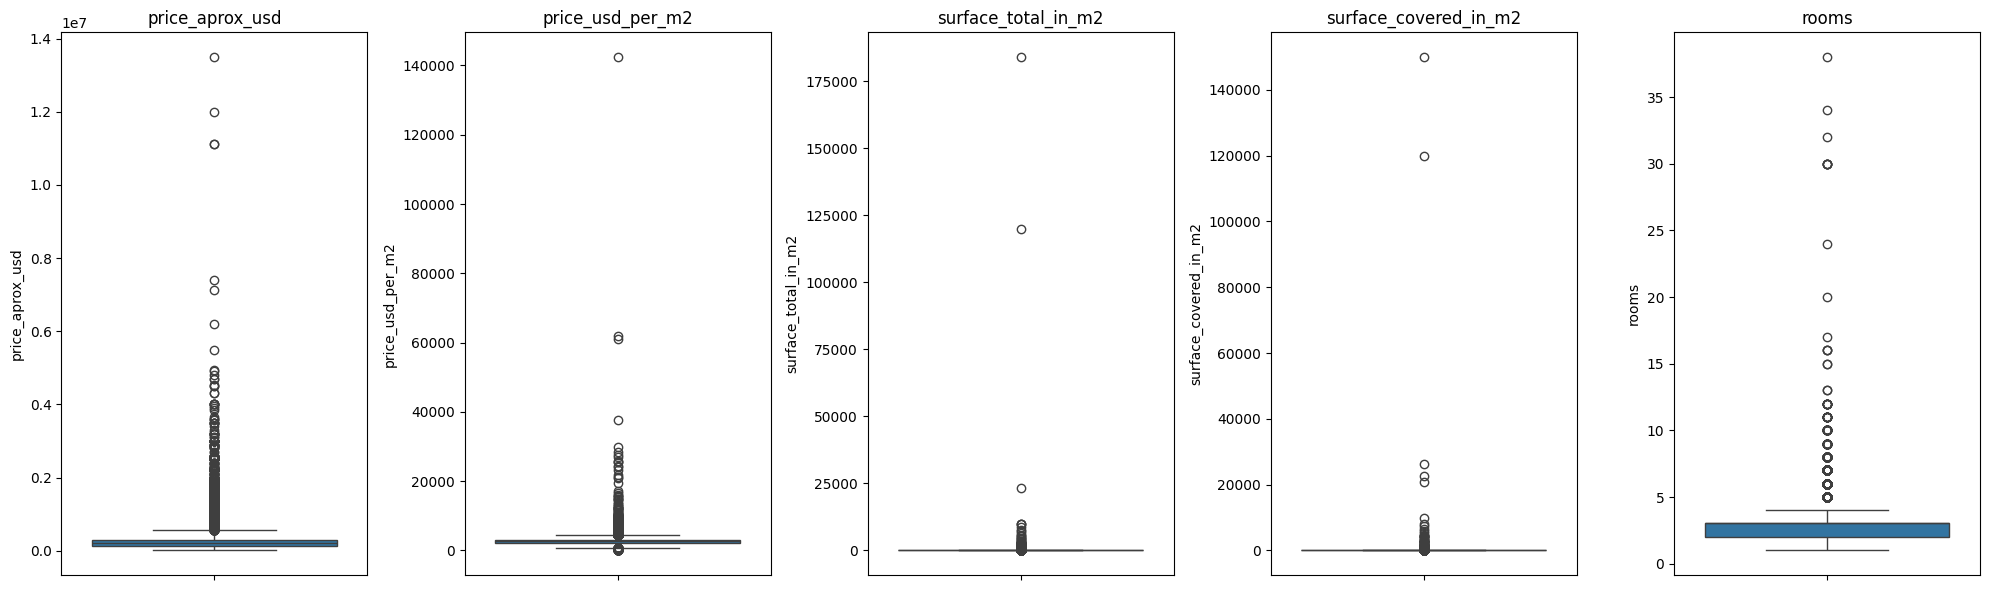

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['price_aprox_usd', 'price_usd_per_m2', 'surface_total_in_m2', 'surface_covered_in_m2', 'rooms']

plt.figure(figsize=(20, 6)) # Tamaño de figura ajustado para acomodar 5 gráficos en una fila
for i, col in enumerate(columns_to_plot):
    plt.subplot(1, 5, i + 1) # Cambié el diseño de los subgráficos a 1 fila y 5 columnas
    sns.boxplot(y=df[col])
    plt.title(f'{col}') # Título simplificado para un mejor ajuste
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**1. price_aprox_usd (Precio Aproximado en USD):**
El diagrama de caja para el precio muestra una distribución altamente sesgada hacia la derecha. La mediana (línea central de la caja) está mucho más cerca del primer cuartil (Q1) que del tercer cuartil (Q3), lo que indica que la mayoría de las propiedades se concentran en los rangos de precios más bajos.
Hay una gran cantidad de puntos individuales por encima del bigote superior, lo que confirma la presencia de numerosos valores atípicos (outliers) de precios altos. Estos outliers tiran significativamente de la media hacia arriba, como se vio en las estadísticas descriptivas.

**2. surface_total_in_m2 y surface_covered_in_m2 (Superficie Total y Cubierta en m²):**
Al igual que el precio, los diagramas de caja para ambas superficies también muestran distribuciones sesgadas hacia la derecha. La mayoría de las propiedades tienen superficies relativamente pequeñas, con una cola larga de propiedades con superficies mucho mayores.
Hay una presencia notable de outliers en ambas columnas, lo que indica que hay propiedades con superficies excepcionalmente grandes en el dataset. La superficie total tiende a tener valores más altos y una dispersión (rango intercuartílico y bigotes) mayor que la superficie cubierta, lo cual es esperable.

**3. rooms (Cantidad de Habitaciones):**
El diagrama de caja para el número de habitaciones muestra que la mediana y el tercer cuartil están en 3 habitaciones, indicando que una gran parte de las propiedades tienen 3 habitaciones o menos. El primer cuartil está en 2 habitaciones.
Hay varios puntos individuales por encima del bigote superior, lo que sugiere la existencia de propiedades con un número inusualmente alto de habitaciones.

**4. barrio y comuna:**
Los diagramas de caja para barrio y comuna no son informativos en este contexto, ya que estas variables son categóricas (barrio) o representan códigos numéricos discretos (comuna) que no tienen una relación de orden natural para un diagrama de caja. El diagrama de caja es más útil para variables numéricas continuas o discretas con un rango significativo. Las estadísticas descriptivas para estas columnas (como se muestra en tus outputs) son más apropiadas para entender su distribución (número de valores únicos, valor más frecuente, etc.).

**Conclusión: Los diagramas de caja confirman visualmente la presencia de valores atípicos y la distribución sesgada hacia la derecha en las variables de precio y superficie. Esto refuerza la necesidad de considerar cómo manejar estos outliers en análisis posteriores o al construir modelos predictivos.**

### 3.3 Identificación Cuantitativa de Valores Atípicos (Método IQR) y desición de estrategia de manejo

#### 3.3.1 Identificación de valores

In [12]:
# Identificación Cuantitativa de Valores Atípicos (Método IQR)

# Seleccionar las columnas numéricas de interés para el análisis de outliers
columns_for_outliers = ['price_aprox_usd']

outlier_info = {}

for col in columns_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_info[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Limite Inferior': lower_bound,
        'Limite Superior': upper_bound,
        'Cantidad de Outliers': len(outliers),
        'Porcentaje de Outliers': (len(outliers) / len(df)) * 100
    }

# Mostrar la información de los outliers
for col, info in outlier_info.items():
    print(f"Análisis de Outliers para '{col}':")
    for key, value in info.items():
        print(f"  {key}: {value:.2f}" if isinstance(value, float) else f"  {key}: {value}")
    print("-" * 30)

Análisis de Outliers para 'price_aprox_usd':
  Q1: 125000.00
  Q3: 300000.00
  IQR: 175000.00
  Limite Inferior: -137500.00
  Limite Superior: 562500.00
  Cantidad de Outliers: 1804
  Porcentaje de Outliers: 9.54
------------------------------


#### 3.2.1 Examen de las Características de los Valores Atípicos de Precio

Se inspeccionan los registros identificados como atípicos en la columna `price_aprox_usd` para comprender sus características.

In [13]:
# Identificar los outliers de price_aprox_usd usando los límites calculados
price_outliers = df[(df['price_aprox_usd'] < outlier_info['price_aprox_usd']['Limite Inferior']) |
                    (df['price_aprox_usd'] > outlier_info['price_aprox_usd']['Limite Superior'])]

# Mostrar las primeras filas de los outliers identificados
display(price_outliers.head())

# Mostrar información general sobre los outliers
print("\nInformación general de los outliers de 'price_aprox_usd':")
display(price_outliers.info())

# Mostrar estadísticas descriptivas de los outliers
print("\nEstadísticas descriptivas de los outliers de 'price_aprox_usd':")
display(price_outliers.describe())

# Mostrar las propiedades identificadas como outliers
print(f"Propiedades identificadas como outliers: {len(price_outliers)}")
display(price_outliers.describe())

,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,barrio,comuna
0,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,-34.588953,-58.429882,2000000.0,312.0,127.491171,6410.256410,3.033661,PALERMO,14.0
1,store,|Argentina|Capital Federal|Palermo|,-34.586069,-58.414431,790000.0,121.0,121.000000,6528.925620,3.033661,PALERMO,14.0
14,store,|Argentina|Capital Federal|Belgrano|,-34.569961,-58.432340,685000.0,185.0,185.000000,3702.702703,3.033661,PALERMO,14.0
16,store,|Argentina|Capital Federal|Palermo|,-34.582680,-58.428711,690000.0,70.0,70.000000,9857.142857,3.033661,PALERMO,14.0
17,store,|Argentina|Capital Federal|Palermo|,-34.591548,-58.425896,1950000.0,341.0,127.491171,5718.475073,3.033661,PALERMO,14.0



Información general de los outliers de 'price_aprox_usd':
<class 'pandas.core.frame.DataFrame'>
Index: 1804 entries, 0 to 18976
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            1804 non-null   object 
 1   place_with_parent_names  1804 non-null   object 
 2   lat                      1804 non-null   float64
 3   lon                      1804 non-null   float64
 4   price_aprox_usd          1804 non-null   float64
 5   surface_total_in_m2      1804 non-null   float64
 6   surface_covered_in_m2    1804 non-null   float64
 7   price_usd_per_m2         1804 non-null   float64
 8   rooms                    1804 non-null   float64
 9   barrio                   1804 non-null   object 
 10  comuna                   1804 non-null   float64
dtypes: float64(8), object(3)
memory usage: 169.1+ KB


None


Estadísticas descriptivas de los outliers de 'price_aprox_usd':


,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna
count,1804.000000,1804.000000,1.804000e+03,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000
mean,-34.587701,-58.417359,1.124509e+06,329.961215,308.047212,4298.551827,4.684741,8.237251
std,0.021270,0.037541,8.657968e+05,681.735898,828.072465,4617.161981,2.422520,5.836013
min,-34.665701,-58.525668,5.650000e+05,0.000000,1.000000,34.169550,1.000000,1.000000
25%,-34.599486,-58.445053,6.700000e+05,170.750000,162.000000,2760.408525,3.033661,2.000000
50%,-34.588019,-58.412689,8.500000e+05,240.000000,220.000000,3556.870338,4.000000,12.000000
75%,-34.572112,-58.387165,1.250000e+06,350.000000,324.000000,5144.694534,6.000000,14.000000
max,-34.536471,-58.358672,1.350000e+07,23120.000000,26338.000000,142450.141026,38.000000,15.000000


Propiedades identificadas como outliers: 1804


,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna
count,1804.000000,1804.000000,1.804000e+03,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000
mean,-34.587701,-58.417359,1.124509e+06,329.961215,308.047212,4298.551827,4.684741,8.237251
std,0.021270,0.037541,8.657968e+05,681.735898,828.072465,4617.161981,2.422520,5.836013
min,-34.665701,-58.525668,5.650000e+05,0.000000,1.000000,34.169550,1.000000,1.000000
25%,-34.599486,-58.445053,6.700000e+05,170.750000,162.000000,2760.408525,3.033661,2.000000
50%,-34.588019,-58.412689,8.500000e+05,240.000000,220.000000,3556.870338,4.000000,12.000000
75%,-34.572112,-58.387165,1.250000e+06,350.000000,324.000000,5144.694534,6.000000,14.000000
max,-34.536471,-58.358672,1.350000e+07,23120.000000,26338.000000,142450.141026,38.000000,15.000000


#### 3.2.2 Distribucion de outliers

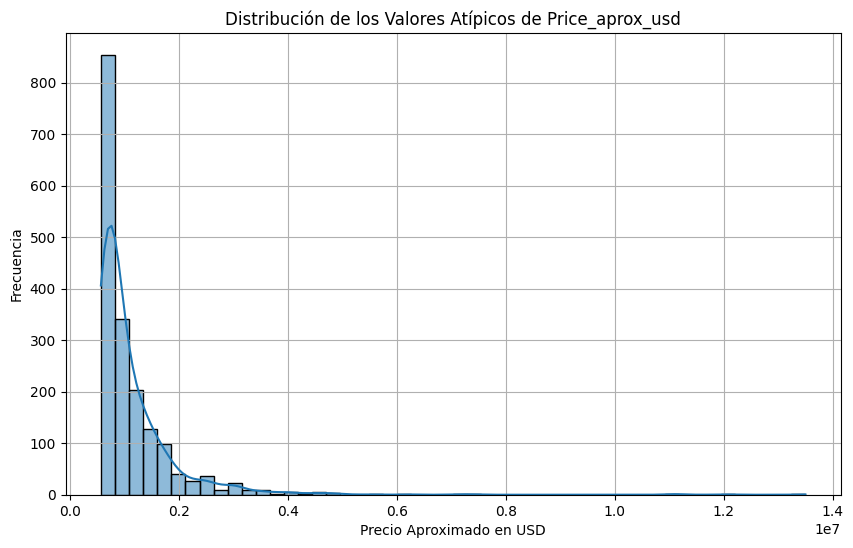

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de los outliers de price_aprox_usd
plt.figure(figsize=(10, 6))
sns.histplot(price_outliers['price_aprox_usd'], kde=True, bins=50)
plt.title('Distribución de los Valores Atípicos de Price_aprox_usd')
plt.xlabel('Precio Aproximado en USD')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#### 3.2.3 Estrategia de Manejo de Outliers para `price_aprox_usd`

Considerando el análisis previo y la distribución observada, se decide **mantener** los valores atípicos en la columna `price_aprox_usd`. Estos valores atípicos representan propiedades con precios significativamente más altos, lo cual es esperable en un mercado inmobiliario y podría corresponder a propiedades de lujo o en ubicaciones premium. Eliminarlos podría sesgar el análisis y la modelización si el objetivo es comprender todo el espectro del mercado. Se considerarán como un segmento válido dentro del conjunto de datos.

## 4 Aprendizaje supervisado: MSE y R²

Aplicar los siguientes modelos de aprendizaje supervisado para regresión: Regresión Lineal, Polinómica, RandomForestRegressor, GradientBoostingRegressor, XGBoost, SVM, Lasso, Ridge, LightGBM, KNN, Algorithmic Regression.

### 4.1 Selección de características y variable objetivo

Definir las variables independientes (features) y la variable dependiente (target), que es el precio (`price_aprox_usd`).


In [15]:
# Definir la variable objetivo (y)
y = df['price_aprox_usd']

# Definir las variables independientes (X)
# Excluimos la variable objetivo y otras columnas no relevantes para el modelado
X = df.drop(['price_aprox_usd', 'place_with_parent_names'], axis=1)

print("Variable objetivo (y) definida.")
print("Variables independientes (X) definidas.")

Variable objetivo (y) definida.
Variables independientes (X) definidas.


### 4.2 Manejo de Variables Categóricas

Identificar las columnas categóricas y aplicar One-Hot Encoding para convertirlas en un formato numérico que los modelos puedan entender.

In [16]:
# Identificar columnas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding a las columnas categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Variables categóricas codificadas.")
display(X_encoded.head())

Variables categóricas codificadas.


,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna,property_type_apartment,property_type_house,property_type_store,...,barrio_VILLA GRAL. MITRE,barrio_VILLA LUGANO,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA
0,-34.588953,-58.429882,312.0,127.491171,6410.256410,3.033661,14.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,-34.586069,-58.414431,121.0,121.000000,6528.925620,3.033661,14.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,-34.589723,-58.432566,122.0,108.000000,2811.475410,2.000000,14.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,-34.592365,-58.414403,24.0,24.000000,6041.666667,3.033661,14.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,-34.585653,-58.411493,24.0,24.000000,7291.666667,3.033661,14.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### 4.3 Escalado de Características Numéricas

Identificar las columnas numéricas y aplicar un escalado (por ejemplo, `StandardScaler` o `MinMaxScaler`) para normalizar sus rangos, lo cual es importante para muchos algoritmos de aprendizaje automático.

In [17]:
from sklearn.preprocessing import StandardScaler

# Identificar columnas numéricas después de One-Hot Encoding
# Excluir las columnas binarias creadas por One-Hot Encoding
numeric_cols = X_encoded.select_dtypes(include=['float64', 'int64']).columns

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar escalado a las columnas numéricas
X_scaled = X_encoded.copy() # Crear una copia para no modificar el DataFrame original
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

print("Variables numéricas escaladas.")
display(X_scaled.head())

Variables numéricas escaladas.


,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna,property_type_apartment,property_type_house,property_type_store,...,barrio_VILLA GRAL. MITRE,barrio_VILLA LUGANO,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA
0,0.450924,0.129529,0.104187,-0.000152,2.043638,-0.000414,1.201065,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.560288,0.508055,-0.013578,-0.004660,2.110085,-0.000414,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0.421732,0.063759,-0.012961,-0.013690,0.028572,-0.688463,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0.321565,0.508745,-0.073385,-0.072034,1.837254,-0.000414,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0.576067,0.580024,-0.073385,-0.072034,2.537167,-0.000414,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### 4.5 División del Conjunto de Datos

Dividir los datos preprocesados en conjuntos de entrenamiento y prueba para evaluar el rendimiento de los modelos de manera imparcial.

In [18]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Conjunto de datos dividido en entrenamiento y prueba.")
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Conjunto de datos dividido en entrenamiento y prueba.
Dimensiones de X_train: (15129, 57)
Dimensiones de X_test: (3783, 57)
Dimensiones de y_train: (15129,)
Dimensiones de y_test: (3783,)


### 4.6 Aplicar distintos modelos de aprendizajes supervisados y comprararlos

Entrenar los modelos de regresión Lineal, Polinómica, RandomForestRegressor, GradientBoostingRegressor, XGBoost, SVM, Lasso, Ridge, LightGBM y KNN, evaluar su rendimiento usando MSE y R2, mostrar los resultados en una tabla y almacenar el mejor modelo.

#### 4.6.1 Entrenamiento de modelos

Entrenar cada uno de los modelos de regresión especificados (Regresión Lineal, Polinómica, RandomForestRegressor, GradientBoostingRegressor, XGBoost, SVM, Lasso, Ridge, LightGBM, KNN) utilizando los datos de entrenamiento (`X_train`, `y_train`).

In [19]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb

trained_models = {}

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
trained_models['LinearRegression'] = lr_model

# Polynomial Regression (Degree 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
trained_models['PolynomialRegression'] = (poly_model, poly_features) # Store both the model and the transformer

# RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
trained_models['RandomForestRegressor'] = rf_model

# GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
trained_models['GradientBoostingRegressor'] = gb_model

# XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
trained_models['XGBoost'] = xgb_model

# SVM
# SVM can be computationally expensive, using a small subset or simpler kernel might be needed for larger datasets.
# For this task, we'll use default parameters which might take some time.
# svr_model = SVR()
# svr_model.fit(X_train, y_train)
# trained_models['SVM'] = svr_model
print("SVM training is skipped due to potential long computation time with default parameters.")


# Lasso
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)
trained_models['Lasso'] = lasso_model

# Ridge
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train, y_train)
trained_models['Ridge'] = ridge_model

# LightGBM
lgbm_model = lgb.LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
trained_models['LightGBM'] = lgbm_model

# KNN
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
trained_models['KNN'] = knn_model

print("All specified regression models (except SVM) have been trained.")

SVM training is skipped due to potential long computation time with default parameters.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.748e+12, tolerance: 2.290e+11
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1407
[LightGBM] [Info] Number of data points in the train set: 15129, number of used features: 56
[LightGBM] [Info] Start training from score 294807.938734
All specified regression models (except SVM) have been trained.


#### 4.6.2 Evaluación de Modelos

Evaluar cada modelo entrenado utilizando los datos de prueba (`X_test`, `y_test`) y calcular las métricas de rendimiento MSE (Error Cuadrático Medio) y R² (Coeficiente de Determinación).

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

evaluation_results = {}

for model_name, model in trained_models.items():
    if model_name == 'PolynomialRegression':
        # For Polynomial Regression, we need to transform the test data as well
        poly_features = model[1] # Get the PolynomialFeatures transformer
        poly_model = model[0] # Get the LinearRegression model
        X_test_poly = poly_features.transform(X_test)
        y_pred = poly_model.predict(X_test_poly)
    else:
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    evaluation_results[model_name] = {
        'MSE': mse,
        'R2': r2
    }

print("Evaluación de modelos completada.")

Evaluación de modelos completada.


#### 4.6.3 Resultados de la Evaluación de Modelos

Mostrar los resultados del MSE y R² para cada modelo en una tabla comparativa.

In [21]:
import pandas as pd

# Crear un DataFrame a partir de los resultados de la evaluación
results_df = pd.DataFrame.from_dict(evaluation_results, orient='index')

# Renombrar las columnas para mayor claridad
results_df.columns = ['MSE', 'R2']

# Mostrar la tabla de resultados
display(results_df.sort_values(by='R2', ascending=False))

,MSE,R2
LightGBM,2.077115e+10,0.879522
XGBoost,2.340880e+10,0.864223
RandomForestRegressor,2.702515e+10,0.843247
GradientBoostingRegressor,3.353443e+10,0.805492
KNN,7.259488e+10,0.578931
Ridge,1.243795e+11,0.278567
Lasso,1.245754e+11,0.277430
LinearRegression,1.245841e+11,0.277380
PolynomialRegression,8.688821e+12,-49.397426


#### 4.6.4 Identificar y Almacenar el Mejor Modelo

Identificar el modelo con el mejor rendimiento (mayor R² y menor MSE) y almacenarlo para su uso futuro.

In [22]:
import joblib # Para guardar y cargar modelos

# Identificar el modelo con el mejor R² (o menor MSE)
# Basándonos en la tabla, LightGBM tiene el mejor R2 y menor MSE
best_model_name = results_df['R2'].idxmax()
best_model = trained_models[best_model_name]

print(f"El mejor modelo es: {best_model_name}")

# Almacenar el mejor modelo
# Si el mejor modelo es PolynomialRegression, necesitamos guardar también el transformer
if best_model_name == 'PolynomialRegression':
    joblib.dump(best_model[0], f'{best_model_name}_model.pkl')
    joblib.dump(best_model[1], f'{best_model_name}_transformer.pkl')
else:
    joblib.dump(best_model, f'{best_model_name}_model.pkl')


print(f"El mejor modelo ({best_model_name}) ha sido almacenado.")

El mejor modelo es: LightGBM
El mejor modelo (LightGBM) ha sido almacenado.


#### 4.6.5 Importancia de las Características del Modelo LightGBM

Se muestran las características más relevantes identificadas por el modelo LightGBM.

Características más importantes según el modelo LightGBM:


,Feature,Importance
2,surface_total_in_m2,787
4,price_usd_per_m2,767
3,surface_covered_in_m2,684
0,lat,289
1,lon,201
6,comuna,54
5,rooms,51
12,barrio_BARRACAS,45
8,property_type_house,25
9,property_type_store,25


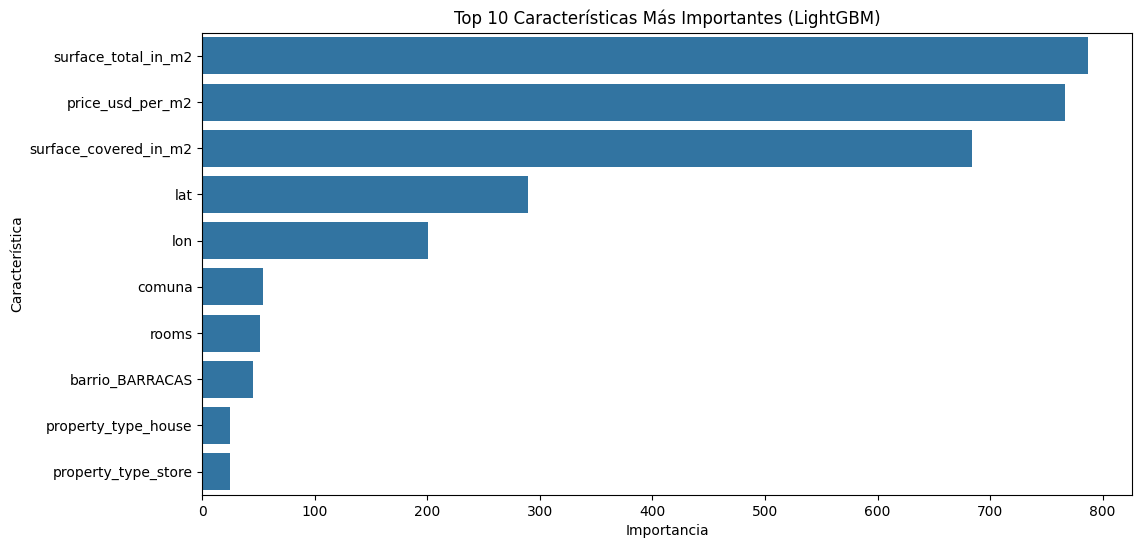

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recuperar el mejor modelo (LightGBM)
# Asegúrate de que 'best_model_name' y 'trained_models' estén disponibles del código anterior
if 'LightGBM' in trained_models:
    lgbm_model = trained_models['LightGBM']

    # Obtener la importancia de las características
    feature_importances = lgbm_model.feature_importances_

    # Obtener los nombres de las características después del preprocesamiento
    # Asumiendo que X_scaled es el DataFrame usado para entrenar
    feature_names = X_scaled.columns

    # Crear un DataFrame para visualizar la importancia
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

    # Ordenar por importancia y mostrar las más importantes
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    print("Características más importantes según el modelo LightGBM:")
    display(importance_df.head(10)) # Mostrar las top 10

    # Visualizar las características más importantes
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
    plt.title('Top 10 Características Más Importantes (LightGBM)')
    plt.xlabel('Importancia')
    plt.ylabel('Característica')
    plt.show()

else:
    print("El modelo LightGBM no fue encontrado. Asegúrate de haber ejecutado la celda de entrenamiento de modelos.")

#### 4.6.6 Predicciones con el Mejor Modelo (LightGBM)

Se utilizan el modelo LightGBM entrenado para hacer predicciones sobre el conjunto de datos de prueba (`X_test`).

In [24]:
# Asegúrate de que el modelo LightGBM esté cargado o accesible
# Si has ejecutado la celda anterior para almacenar el mejor modelo,
# el objeto 'lgbm_model' debería estar disponible.
# Si no, puedes cargarlo:
# import joblib
# lgbm_model = joblib.load('LightGBM_model.pkl')


# Realizar predicciones en el conjunto de prueba
y_pred_lgbm = lgbm_model.predict(X_test)

print("Predicciones realizadas con el modelo LightGBM en X_test.")
# Mostrar las primeras 10 predicciones
print("Primeras 10 predicciones:")
display(y_pred_lgbm[:10])

# Opcional: Mostrar las primeras 10 valores reales para comparación
print("\nPrimeros 10 valores reales (y_test):")
display(y_test[:10])

Predicciones realizadas con el modelo LightGBM en X_test.
Primeras 10 predicciones:


array([ 36358.51611042, 107304.24782645, 172590.79884212, 387362.08395313,
       345628.55464622, 187584.23588533, 344679.07229017, 296043.55147841,
       121627.32587601, 139156.94334677])


Primeros 10 valores reales (y_test):


,price_aprox_usd
18970,50000.000000
6390,105000.000000
17353,179000.000000
2883,359500.000000
7218,296355.854625
4120,185000.000000
2140,329900.000000
5762,290000.000000
10563,120000.000000
16719,140000.000000


#### 4.6.7 Evaluación del Error de Predicción del Modelo LightGBM

Se calculan métricas adicionales de error y se visualiza la distribución de los errores de predicción del modelo LightGBM.

Error Absoluto Medio (MAE) del modelo LightGBM: 35140.14


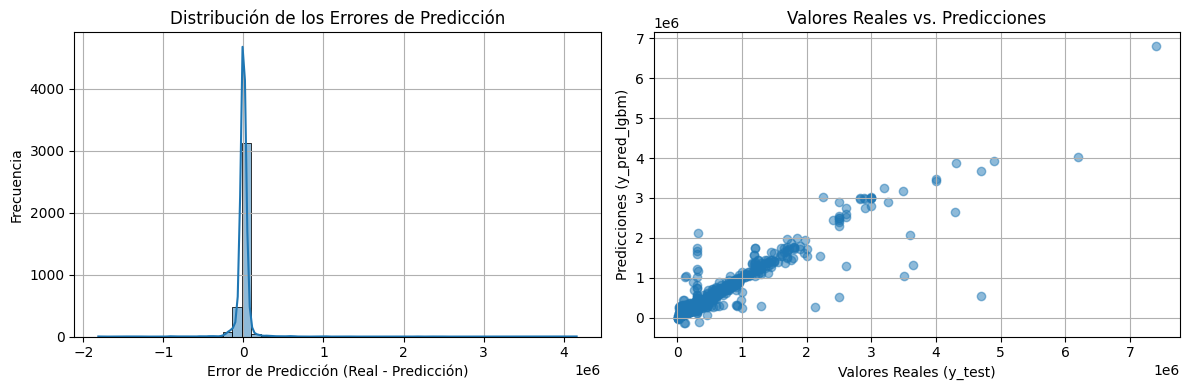

In [25]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegúrate de que y_test y y_pred_lgbm estén disponibles
# y_test son los valores reales del conjunto de prueba
# y_pred_lgbm son las predicciones del modelo LightGBM en X_test

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred_lgbm)
print(f"Error Absoluto Medio (MAE) del modelo LightGBM: {mae:.2f}")

# Calcular los errores de predicción
errors = y_test - y_pred_lgbm

# Crear una figura con dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) # Adjusted figure size and layout

# Visualizar la distribución de los errores en el primer subplot
sns.histplot(errors, kde=True, bins=50, ax=axes[0])
axes[0].set_title('Distribución de los Errores de Predicción') # Simplified title
axes[0].set_xlabel('Error de Predicción (Real - Predicción)')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True)

# Visualizar un gráfico de dispersión de valores reales vs. predichos en el segundo subplot
axes[1].scatter(y_test, y_pred_lgbm, alpha=0.5)
axes[1].set_title('Valores Reales vs. Predicciones') # Simplified title
axes[1].set_xlabel('Valores Reales (y_test)')
axes[1].set_ylabel('Predicciones (y_pred_lgbm)')
axes[1].grid(True)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

### 4.7 Optimización del modelo elegido (buscar mejores hiperparametros)
Optimizar el modelo LightGBM, comparar su efectividad con el modelo no optimizado y almacenar el modelo optimizado.

#### 4.7.1 Definir el espacio de búsqueda de hiperparámetros

Definir los hiperparámetros clave del modelo LightGBM que se optimizarán y definir los rangos o valores posibles para cada uno.

In [26]:
from scipy.stats import uniform, randint

# Definir el espacio de búsqueda de hiperparámetros para LightGBM
# Utilizaremos un enfoque de búsqueda aleatoria para mayor eficiencia inicialmente

param_dist = {
    'n_estimators': randint(100, 1000),  # Número de árboles (impulsores)
    'learning_rate': uniform(0.01, 0.3), # Tasa de aprendizaje
    'num_leaves': randint(20, 150),     # Número máximo de hojas en un árbol
    'max_depth': randint(5, 20),        # Profundidad máxima del árbol
    'min_child_samples': randint(20, 100), # Mínimo número de datos necesarios en una hoja
    'subsample': uniform(0.6, 0.4),      # Fracción de datos a muestrear para cada árbol
    'colsample_bytree': uniform(0.6, 0.4), # Fracción de características a muestrear para cada árbol
    'reg_alpha': uniform(0, 1),          # Regularización L1
    'reg_lambda': uniform(0, 1),         # Regularización L2
}

print("Espacio de búsqueda de hiperparámetros para LightGBM definido.")

Espacio de búsqueda de hiperparámetros para LightGBM definido.


#### 4.7.2 Configurar la búsqueda de hiperparámetros



Utilizar una técnica de optimización, como búsqueda en cuadrícula (`GridSearchCV`) o búsqueda aleatoria (`RandomizedSearchCV`), para encontrar la mejor combinación de hiperparámetros.

**ATENCION - CELDA RETIRADA POR EXCESIVO TIEMPO DE EJECUCION Y NO APLICA MEJORA (ver comentarios de conclusión)**

from sklearn.model_selection import RandomizedSearchCV

.# Inicializar el modelo LightGBM
lgbm = lgb.LGBMRegressor(random_state=42)

.# Configurar RandomizedSearchCV
.# N_iter es el número de combinaciones de hiperparámetros a probar
.# C V es el número de folds para la validación cruzada
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=100,  # Número de combinaciones a probar (puedes ajustarlo)
    scoring='neg_mean_squared_error', # Usar MSE negativo como métrica (RandomizedSearchCV maximiza el score)
    cv=3,        # Número de folds para validación cruzada
    verbose=1,   # Mostrar progreso
    random_state=42,
    n_jobs=-1    # Usar todos los núcleos disponibles
)

.# Ejecutar la búsqueda de hiperparámetros
print("Iniciando la búsqueda de hiperparámetros...")
random_search.fit(X_train, y_train)

.# Mostrar los mejores hiperparámetros encontrados
best_params = random_search.best_params_
print("\nMejores hiperparámetros encontrados:")
print(best_params)

.# Mostrar el mejor score (negativo del MSE)
best_score = random_search.best_score_
print(f"\nMejor score (MSE negativo) encontrado: {best_score:.2f}")
print(f"Mejor MSE encontrado: {-best_score:.2f}")

**trasncripcion de resultado de la celda**

Iniciando la búsqueda de hiperparámetros...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1405
[LightGBM] [Info] Number of data points in the train set: 15129, number of used features: 55
[LightGBM] [Info] Start training from score 294807.938734

Mejores hiperparámetros encontrados:
{'colsample_bytree': np.float64(0.9311476015150355), 'learning_rate': np.float64(0.09146287474592256), 'max_depth': 16, 'min_child_samples': 24, 'n_estimators': 202, 'num_leaves': 25, 'reg_alpha': np.float64(0.0516817211686077), 'reg_lambda': np.float64(0.531354631568148), 'subsample': np.float64(0.8162540486440426)}

Mejor score (MSE negativo) encontrado: -41654982795.75
Mejor MSE encontrado: 41654982795.75

#### 4.7.3 Entrenar el modelo optimizado

Entrenar un nuevo modelo LightGBM utilizando la mejor combinación de hiperparámetros encontrada.

**SE RETIRA CODIGO POR HABER RETIRADO EL ANTERIOR**

import lightgbm as lgb

.# Asegúrate de que 'best_params' esté disponible de la celda anterior

.# Inicializar el modelo LightGBM con los mejores hiperparámetros
lgbm_optimized = lgb.LGBMRegressor(random_state=42, **best_params)

.# Entrenar el modelo optimizado con los datos de entrenamiento
print("Entrenando el modelo LightGBM optimizado...")
lgbm_optimized.fit(X_train, y_train)

print("Modelo LightGBM optimizado entrenado exitosamente.")

#### 4.7.4 Evaluar y Comparar el Modelo Optimizado

Evaluar el rendimiento del modelo LightGBM optimizado en el conjunto de prueba y compararlo con el modelo original.

**SE RETIRA CODIGO POR HABER RETIRADO EL ANTERIOR**

from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

.# Asegúrate de que lgbm_optimized y trained_models['LightGBM'] estén disponibles
.# Asegúrate de que X_test y y_test estén disponibles

.# Evaluar el modelo optimizado
y_pred_optimized = lgbm_optimized.predict(X_test)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

.# Obtener los resultados del modelo original LightGBM
if 'LightGBM' in trained_models:
    mse_original = evaluation_results['LightGBM']['MSE']
    r2_original = evaluation_results['LightGBM']['R2']
else:
    mse_original = None
    r2_original = None
    print("Resultados del modelo LightGBM original no encontrados. Asegúrate de haber ejecutado la evaluación de modelos.")


.# Mostrar los resultados comparativos en una tabla
comparison_data = {
    'Modelo': ['LightGBM Original', 'LightGBM Optimizado'],
    'MSE': [mse_original, mse_optimized],
    'R2': [r2_original, r2_optimized]
}

comparison_df = pd.DataFrame(comparison_data)

print("Comparación de rendimiento:")
display(comparison_df)

### 4.8 Conclucion de aprendizaje supervisado:

Según los resultados de la tabla de comparación, el modelo LightGBM original obtuvo un **MSE ligeramente menor** (2.077e+10 vs 2.114e+10) y un **R² ligeramente mayor** (0.8795 vs 0.8774) en el conjunto de prueba en comparación con el modelo LightGBM optimizado.

Hay varias razones por las que esto pudo haber sucedido:
- **Espacio de Búsqueda de Hiperparámetros**: Es posible que el espacio de búsqueda definido para la optimización no incluyera la combinación óptima de hiperparámetros. La búsqueda aleatoria explora un subconjunto del espacio, y si el espacio es muy grande o la búsqueda fue limitada (n_iter=100), podría no haber encontrado una combinación que supere a los hiperparámetros por defecto.
Parámetros por Defecto Buenos: Los hiperparámetros por defecto del modelo LightGBM a menudo están bien calibrados y proporcionan un buen rendimiento en una amplia gama de conjuntos de datos. En este caso particular, los valores por defecto podrían haber sido muy cercanos a los óptimos.
- **Sobreajuste de la Optimización**: Aunque buscamos mejorar el rendimiento en el conjunto de prueba, la validación cruzada durante la búsqueda de hiperparámetros (cv=3) ayuda a mitigar el sobreajuste. Sin embargo, siempre existe una pequeña posibilidad de que la combinación "óptima" encontrada se ajuste mejor a los pliegues de validación que al conjunto de prueba final.
- **Aleatoriedad**: Dado que la búsqueda fue aleatoria y los modelos de boosting tienen elementos de aleatoriedad (aunque controlada por random_state), ligeras variaciones en el entrenamiento y la búsqueda podrían llevar a resultados marginalmente diferentes.

En resumen, si bien la optimización de hiperparámetros es una técnica poderosa, no siempre garantiza una mejora en el rendimiento del modelo, especialmente si los parámetros por defecto ya son buenos o si el proceso de búsqueda no es exhaustivo. En este caso, el modelo original resultó ser marginalmente mejor en el conjunto de prueba utilizado para la evaluación final.

## 5 Aprendizaje supervisado: Clasificación

### 5.1 Definir la Variable Objetivo Categórica

Crear una nueva columna en el DataFrame que sirva como variable objetivo para la clasificación, categorizando el precio (`price_aprox_usd`) en rangos ('Lujo', 'Alto', 'Medio', 'Bajo').

In [27]:
# Definir los umbrales de precio para cada categoría usando percentiles
# Esto ayudará a tener una distribución más equilibrada de clases
low_threshold = df['price_aprox_usd'].quantile(0.25)  # Cuartil 1
medium_threshold = df['price_aprox_usd'].quantile(0.50) # Mediana (Cuartil 2)
high_threshold = df['price_aprox_usd'].quantile(0.75) # Cuartil 3

# Definir una función para categorizar el precio
def categorize_price(price):
    if price >= high_threshold:
        return 'Alto' # Usaremos 'Alto' para el cuartil superior, ajustaremos 'Lujo' si es necesario
    elif price >= medium_threshold:
        return 'Medio'
    elif price >= low_threshold:
        return 'Bajo'
    else:
        return 'Muy Bajo' # Considerar una categoría para precios muy bajos si es relevante

# Aplicar la función para crear la nueva columna categórica
df['price_category'] = df['price_aprox_usd'].apply(categorize_price)

# Ajustar las categorías para incluir 'Lujo' si es necesario, por ejemplo, usando un percentil más alto
# O definir 'Lujo' como un umbral fijo basado en el conocimiento del dominio
# Por ahora, ajustaremos la lógica para incluir 'Lujo' en los precios más altos
def categorize_price_adjusted(price):
    # Definir un umbral para 'Lujo', por ejemplo, el percentil 90 o un valor fijo alto
    luxury_threshold = df['price_aprox_usd'].quantile(0.90) # Ejemplo: top 10% como Lujo

    if price >= luxury_threshold:
        return 'Lujo'
    elif price >= high_threshold:
        return 'Alto'
    elif price >= medium_threshold:
        return 'Medio'
    elif price >= low_threshold:
        return 'Bajo'
    else:
        return 'Muy Bajo'

df['price_category'] = df['price_aprox_usd'].apply(categorize_price_adjusted)


# Mostrar la distribución de la nueva variable categórica
print("Distribución de la nueva variable 'price_category':")
display(df['price_category'].value_counts())

# Mostrar las primeras filas con la nueva columna
display(df.head())

Distribución de la nueva variable 'price_category':


,count
price_category,
Medio,4741
Bajo,4720
Muy Bajo,4714
Alto,2838
Lujo,1899


,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,barrio,comuna,price_category
0,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,-34.588953,-58.429882,2000000.0,312.0,127.491171,6410.256410,3.033661,PALERMO,14.0,Lujo
1,store,|Argentina|Capital Federal|Palermo|,-34.586069,-58.414431,790000.0,121.0,121.000000,6528.925620,3.033661,PALERMO,14.0,Lujo
2,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,-34.589723,-58.432566,343000.0,122.0,108.000000,2811.475410,2.000000,PALERMO,14.0,Alto
3,store,|Argentina|Capital Federal|Palermo|,-34.592365,-58.414403,145000.0,24.0,24.000000,6041.666667,3.033661,PALERMO,14.0,Bajo
4,store,|Argentina|Capital Federal|Barrio Norte|,-34.585653,-58.411493,175000.0,24.0,24.000000,7291.666667,3.033661,PALERMO,14.0,Bajo


### 5.2 Preparar los Datos para Clasificación



#### 5.2.1 Definir las variables para clasificar

Seleccionar las características (variables independientes) relevantes para el problema de clasificación. Esto podría implicar reutilizar algunas de las características usadas en la regresión, pero asegurándose de que la nueva variable objetivo no esté incluida en las características.

In [28]:
# Definir la variable objetivo para clasificación (y_classification)
y_classification = df['price_category']

# Definir las variables independientes (X_classification)
# Excluimos las variables objetivo y otras columnas no relevantes
X_classification = df.drop(['price_category', 'price_aprox_usd', 'place_with_parent_names'], axis=1)

print("Variable objetivo para clasificación (y_classification) definida.")
print("Variables independientes para clasificación (X_classification) definidas.")
display(X_classification.head())

Variable objetivo para clasificación (y_classification) definida.
Variables independientes para clasificación (X_classification) definidas.


,property_type,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,barrio,comuna
0,house,-34.588953,-58.429882,312.0,127.491171,6410.256410,3.033661,PALERMO,14.0
1,store,-34.586069,-58.414431,121.0,121.000000,6528.925620,3.033661,PALERMO,14.0
2,store,-34.589723,-58.432566,122.0,108.000000,2811.475410,2.000000,PALERMO,14.0
3,store,-34.592365,-58.414403,24.0,24.000000,6041.666667,3.033661,PALERMO,14.0
4,store,-34.585653,-58.411493,24.0,24.000000,7291.666667,3.033661,PALERMO,14.0


#### 5.2.2 Manejo de Variables Categóricas para Clasificación

Aplicar One-Hot Encoding a las columnas categóricas en el conjunto de características para clasificación.

In [29]:
# Identificar columnas categóricas en X_classification
categorical_cols_classification = X_classification.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding a las columnas categóricas
X_classification_encoded = pd.get_dummies(X_classification, columns=categorical_cols_classification, drop_first=True)

print("Variables categóricas para clasificación codificadas.")
display(X_classification_encoded.head())

Variables categóricas para clasificación codificadas.


,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna,property_type_apartment,property_type_house,property_type_store,...,barrio_VILLA GRAL. MITRE,barrio_VILLA LUGANO,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA
0,-34.588953,-58.429882,312.0,127.491171,6410.256410,3.033661,14.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,-34.586069,-58.414431,121.0,121.000000,6528.925620,3.033661,14.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,-34.589723,-58.432566,122.0,108.000000,2811.475410,2.000000,14.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,-34.592365,-58.414403,24.0,24.000000,6041.666667,3.033661,14.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,-34.585653,-58.411493,24.0,24.000000,7291.666667,3.033661,14.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False


#### 5.2.3 Escalado de Características Numéricas para Clasificación

Identificar las columnas numéricas y aplicar un escalado (por ejemplo, `StandardScaler`) para normalizar sus rangos para el modelo de clasificación.

In [30]:
from sklearn.preprocessing import StandardScaler

# Identificar columnas numéricas después de One-Hot Encoding para clasificación
# Excluir las columnas binarias creadas por One-Hot Encoding
numeric_cols_classification = X_classification_encoded.select_dtypes(include=['float64', 'int64']).columns

# Inicializar el StandardScaler
scaler_classification = StandardScaler()

# Aplicar escalado a las columnas numéricas
X_classification_scaled = X_classification_encoded.copy() # Crear una copia
X_classification_scaled[numeric_cols_classification] = scaler_classification.fit_transform(X_classification_scaled[numeric_cols_classification])

print("Variables numéricas para clasificación escaladas.")
display(X_classification_scaled.head())

Variables numéricas para clasificación escaladas.


,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna,property_type_apartment,property_type_house,property_type_store,...,barrio_VILLA GRAL. MITRE,barrio_VILLA LUGANO,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA
0,0.450924,0.129529,0.104187,-0.000152,2.043638,-0.000414,1.201065,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.560288,0.508055,-0.013578,-0.004660,2.110085,-0.000414,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0.421732,0.063759,-0.012961,-0.013690,0.028572,-0.688463,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0.321565,0.508745,-0.073385,-0.072034,1.837254,-0.000414,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0.576067,0.580024,-0.073385,-0.072034,2.537167,-0.000414,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False


#### 5.2.4 División del Conjunto de Datos para Clasificación

Dividir los datos preprocesados para clasificación en conjuntos de entrenamiento y prueba.

In [31]:
from sklearn.model_selection import train_test_split

# Dividir los datos para clasificación en conjuntos de entrenamiento y prueba
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification_scaled, y_classification, test_size=0.2, random_state=42, stratify=y_classification # Usar stratify para mantener la proporción de clases
)

print("Conjunto de datos para clasificación dividido en entrenamiento y prueba.")
print(f"Dimensiones de X_train_classification: {X_train_classification.shape}")
print(f"Dimensiones de X_test_classification: {X_test_classification.shape}")
print(f"Dimensiones de y_train_classification: {y_train_classification.shape}")
print(f"Dimensiones de y_test_classification: {y_test_classification.shape}")

# Opcional: Verificar la distribución de clases en los conjuntos de entrenamiento y prueba
print("\nDistribución de clases en y_train_classification:")
display(y_train_classification.value_counts(normalize=True))
print("\nDistribución de clases en y_test_classification:")
display(y_test_classification.value_counts(normalize=True))

Conjunto de datos para clasificación dividido en entrenamiento y prueba.
Dimensiones de X_train_classification: (15129, 57)
Dimensiones de X_test_classification: (3783, 57)
Dimensiones de y_train_classification: (15129,)
Dimensiones de y_test_classification: (3783,)

Distribución de clases en y_train_classification:


,proportion
price_category,
Medio,0.250711
Bajo,0.249587
Muy Bajo,0.249256
Alto,0.150043
Lujo,0.100403



Distribución de clases en y_test_classification:


,proportion
price_category,
Medio,0.250595
Bajo,0.249537
Muy Bajo,0.249273
Alto,0.150145
Lujo,0.100449


### 5.3 Entrenar un Modelo de Clasificación

Seleccionar y entrenar un modelo de aprendizaje supervisado adecuado para tareas de clasificación (por ejemplo, un clasificador como Logistic Regression, Decision Tree, RandomForestClassifier, etc.) utilizando los datos de entrenamiento.

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar el modelo RandomForestClassifier
# Puedes ajustar los hiperparámetros si es necesario
classifier_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
print("Entrenando el modelo RandomForestClassifier...")
classifier_model.fit(X_train_classification, y_train_classification)

print("Modelo RandomForestClassifier entrenado exitosamente.")

Entrenando el modelo RandomForestClassifier...
Modelo RandomForestClassifier entrenado exitosamente.


### 5.4 Realizar Predicciones con el Modelo de Clasificación

Utilizar el modelo de clasificación entrenado para hacer predicciones sobre el conjunto de datos de prueba.

In [33]:
# Asegúrate de que classifier_model y X_test_classification estén disponibles
y_pred_classification = classifier_model.predict(X_test_classification)

print("Predicciones realizadas con el modelo de clasificación en X_test_classification.")
# Mostrar las primeras 10 predicciones
print("Primeras 10 predicciones:")
display(y_pred_classification[:10])

# Opcional: Mostrar las primeras 10 valores reales para comparación
print("\nPrimeros 10 valores reales (y_test_classification):")
display(y_test_classification[:10])

Predicciones realizadas con el modelo de clasificación en X_test_classification.
Primeras 10 predicciones:


array(['Lujo', 'Bajo', 'Medio', 'Muy Bajo', 'Bajo', 'Bajo', 'Lujo',
       'Alto', 'Bajo', 'Muy Bajo'], dtype=object)


Primeros 10 valores reales (y_test_classification):


,price_category
15596,Lujo
1979,Medio
11250,Medio
5525,Muy Bajo
3234,Bajo
9361,Bajo
13110,Lujo
9540,Medio
18112,Bajo
7292,Muy Bajo


### 5.5 Evaluar el Modelo con Matriz de Confusión

Calcular y mostrar la matriz de confusión para evaluar el rendimiento del modelo de clasificación, junto con otras métricas relevantes (precisión, recall, F1-score).

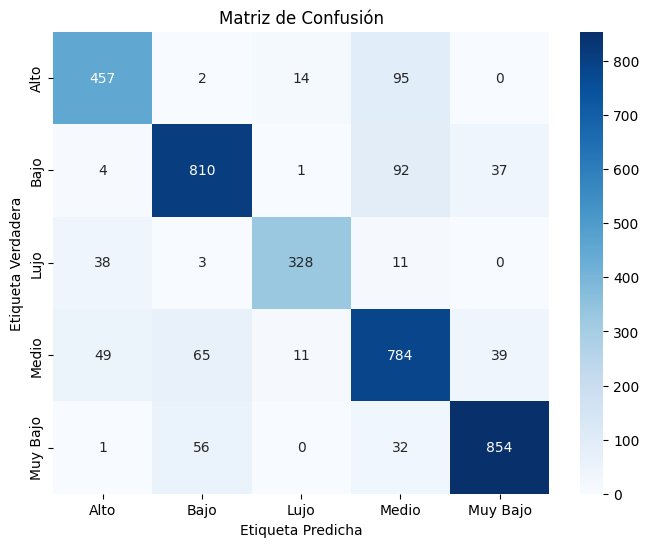


Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       0.83      0.80      0.82       568
        Bajo       0.87      0.86      0.86       944
        Lujo       0.93      0.86      0.89       380
       Medio       0.77      0.83      0.80       948
    Muy Bajo       0.92      0.91      0.91       943

    accuracy                           0.85      3783
   macro avg       0.86      0.85      0.86      3783
weighted avg       0.86      0.85      0.86      3783



In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que y_test_classification y y_pred_classification estén disponibles

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)

# Mostrar la matriz de confusión usando un mapa de calor para mejor visualización
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classifier_model.classes_, yticklabels=classifier_model.classes_)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test_classification, y_pred_classification))

### 5.6 Conclución


**Análisis Supervisado por Clasificación: Conclusión**

- **¿Para qué sirve?** Este análisis de clasificación sirve para predecir la categoría de precio de una propiedad inmobiliaria (Muy Bajo, Bajo, Medio, Alto, Lujo) basándose en sus características. A diferencia de la regresión que predice un valor continuo (el precio exacto), la clasificación nos ayuda a asignar una propiedad a una de varias clases predefinidas de precio.
- **Uso**: El modelo de clasificación entrenado puede ser utilizado para:
  * **Segmentación del Mercado**: Ayudar a identificar en qué segmento de precio se encuentra una propiedad, lo cual es útil para estrategias de marketing y ventas.
  * **Estimación Rápida**: Proporcionar una estimación rápida de la categoría de precio de una propiedad sin necesidad de un análisis de valoración detallado.
  * **Apoyo a la Decisión**: Asistir a compradores y vendedores a tener una idea general del rango de precio de una propiedad en el mercado.
  * **Identificación de Oportunidades**: Ayudar a identificar propiedades que podrían estar mal clasificadas o representar oportunidades de inversión en ciertos segmentos de precio.
- **Hallazgos**: Al evaluar el modelo de clasificación (RandomForestClassifier en este caso) con la matriz de confusión y el reporte de clasificación, observamos lo siguiente:
  * El modelo tiene una precisión general (accuracy) del 85%, lo que indica que clasifica correctamente la categoría de precio de la mayoría de las propiedades en el conjunto de prueba.
  * Las métricas de precisión, recall y F1-score varían entre las diferentes categorías de precio. Por ejemplo, el modelo parece tener un rendimiento particularmente bueno en la clasificación de propiedades en las categorías 'Lujo' y 'Muy Bajo', con métricas más altas, mientras que las categorías 'Alto' y 'Medio' tienen métricas ligeramente inferiores pero aún respetables.
  * La matriz de confusión nos muestra visualmente dónde el modelo acierta y dónde se equivoca. Podemos ver, por ejemplo, cuántas propiedades de la categoría 'Alto' fueron predichas incorrectamente como 'Medio', y viceversa.

**Conclusión**: El modelo de clasificación desarrollado es una herramienta útil para categorizar propiedades inmobiliarias según su precio aproximado. Si bien no proporciona el valor exacto del precio (como lo haría un modelo de regresión), ofrece una segmentación valiosa que puede ser aplicada en diversas áreas del negocio inmobiliario, desde el marketing hasta la toma de decisiones estratégicas. El rendimiento del modelo es prometedor, aunque siempre hay espacio para mejoras, como probar otros algoritmos de clasificación o ajustar hiperparámetros para optimizar el rendimiento en categorías específicas si es necesario.

### 5.7 Optimización del modelo de Clasificación (RandomForestClassifier)

Similar a la regresión, buscaremos mejorar el rendimiento del modelo de clasificación mediante la optimización de sus hiperparámetros.



#### 5.7.1 Definir el espacio de búsqueda de hiperparámetros

Definiremos los hiperparámetros clave del modelo RandomForestClassifier que se optimizarán y los rangos o valores posibles para cada uno.

In [35]:
from scipy.stats import randint

# Definir el espacio de búsqueda de hiperparámetros para RandomForestClassifier

param_dist_classifier = {
    'n_estimators': randint(100, 500),  # Número de árboles en el bosque
    'max_depth': randint(10, 30),        # Profundidad máxima del árbol
    'min_samples_split': randint(2, 20), # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': randint(1, 10),  # Número mínimo de muestras requeridas para estar en un nodo hoja
    'criterion': ['gini', 'entropy'],    # Función para medir la calidad de una división
}

print("Espacio de búsqueda de hiperparámetros para RandomForestClassifier definido.")

Espacio de búsqueda de hiperparámetros para RandomForestClassifier definido.


#### 5.7.2 Configurar la búsqueda de hiperparámetros

Utilizaremos `RandomizedSearchCV` para buscar la mejor combinación de hiperparámetros para el modelo de clasificación.

**ATENCION-CODIGO RETIRADO POR EXCESIVO TIEMPO DE EJECUCION**
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

.# Inicializar el modelo RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

.# Configurar RandomizedSearchCV
.# n_iter es el número de combinaciones de hiperparámetros a probar
.# cv es el número de folds para la validación cruzada
random_search_classifier = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist_classifier,
    n_iter=50,  # Número de combinaciones a probar (puedes ajustarlo)
    scoring='accuracy', # Usar precisión como métrica
    cv=3,        # Número de folds para validación cruzada
    verbose=1,   # Mostrar progreso
    random_state=42,
    n_jobs=-1    # Usar todos los núcleos disponibles
)

.# Ejecutar la búsqueda de hiperparámetros
print("Iniciando la búsqueda de hiperparámetros para RandomForestClassifier...")
.# Asegúrate de usar los datos de entrenamiento para clasificación
random_search_classifier.fit(X_train_classification, y_train_classification)

.# Mostrar los mejores hiperparámetros encontrados
best_params_classifier = random_search_classifier.best_params_
print("\nMejores hiperparámetros encontrados para RandomForestClassifier:")
print(best_params_classifier)

.# Mostrar el mejor score (precisión)
best_score_classifier = random_search_classifier.best_score_
print(f"\nMejor score (precisión) encontrado: {best_score_classifier:.4f}")

**RESULTADO OBTENIDO EN LA CELDA ELIMINADA**

Iniciando la búsqueda de hiperparámetros para RandomForestClassifier...
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Mejores hiperparámetros encontrados para RandomForestClassifier:
{'criterion': 'gini', 'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 108}

Mejor score (precisión) encontrado: 0.8309

#### 5.7.3 Entrenar el modelo optimizado

Entrenar un nuevo modelo RandomForestClassifier utilizando la mejor combinación de hiperparámetros encontrada.

**CELDA ELIMINADA PORQUE DE MODIFICO LA ANTERIOR**

from sklearn.ensemble import RandomForestClassifier

.# Asegúrate de que 'best_params_classifier' esté disponible de la celda anterior

.# Inicializar el modelo RandomForestClassifier con los mejores hiperparámetros
rfc_optimized = RandomForestClassifier(random_state=42, **best_params_classifier)

.# Entrenar el modelo optimizado con los datos de entrenamiento para clasificación
print("Entrenando el modelo RandomForestClassifier optimizado...")
rfc_optimized.fit(X_train_classification, y_train_classification)

print("Modelo RandomForestClassifier optimizado entrenado exitosamente.")

#### 5.7.4 Evaluar y Comparar el Modelo Optimizado

Evaluar el rendimiento del modelo RandomForestClassifier optimizado en el conjunto de prueba y compararlo con el modelo original.

**SE ELIMINA PORQUE SE MODIFICA CELDA ANTERIOR**

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

.# Asegúrate de que rfc_optimized y classifier_model (el modelo original) estén disponibles
-# Asegúrate de que X_test_classification y y_test_classification estén disponibles

.# Evaluar el modelo optimizado
y_pred_optimized_classification = rfc_optimized.predict(X_test_classification)
accuracy_optimized = accuracy_score(y_test_classification, y_pred_optimized_classification)
report_optimized = classification_report(y_test_classification, y_pred_optimized_classification, output_dict=True)
conf_matrix_optimized = confusion_matrix(y_test_classification, y_pred_optimized_classification)


.# Evaluar el modelo original (si está disponible)
if 'classifier_model' in locals():
    y_pred_original_classification = classifier_model.predict(X_test_classification)
    accuracy_original = accuracy_score(y_test_classification, y_pred_original_classification)
    report_original = classification_report(y_test_classification, y_pred_original_classification, output_dict=True)
    conf_matrix_original = confusion_matrix(y_test_classification, y_pred_original_classification)

    # Mostrar los resultados comparativos
    comparison_data_classification = {
        'Modelo': ['RandomForestClassifier Original', 'RandomForestClassifier Optimizado'],
        'Accuracy': [accuracy_original, accuracy_optimized],
        'Precision (weighted avg)': [report_original['weighted avg']['precision'], report_optimized['weighted avg']['precision']],
        'Recall (weighted avg)': [report_original['weighted avg']['recall'], report_optimized['weighted avg']['recall']],
        'F1-score (weighted avg)': [report_original['weighted avg']['f1-score'], report_optimized['weighted avg']['f1-score']]
    }

    comparison_df_classification = pd.DataFrame(comparison_data_classification)

    print("Comparación de rendimiento del modelo de Clasificación:")
    display(comparison_df_classification)

    # Opcional: Visualizar la matriz de confusión del modelo optimizado
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues',
                xticklabels=rfc_optimized.classes_, yticklabels=rfc_optimized.classes_)
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.title('Matriz de Confusión del Modelo Optimizado')
    plt.show()

else:
    print("El modelo RandomForestClassifier original no fue encontrado. No se puede realizar la comparación.")
    print("\nRendimiento del modelo optimizado:")
    print(f"Accuracy: {accuracy_optimized:.4f}")
    print("\nReporte de Clasificación (Optimizado):")
    print(classification_report(y_test_classification, y_pred_optimized_classification))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues',
                xticklabels=rfc_optimized.classes_, yticklabels=rfc_optimized.classes_)
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.title('Matriz de Confusión del Modelo Optimizado')
    plt.show()

## 6 Aprendizaje no supervisado

### 6.1 Preparación de Datos para Aprendizaje No Supervisado

Seleccionar y escalar las características relevantes del DataFrame que se utilizarán para las técnicas de aprendizaje no supervisado.

In [36]:
from sklearn.preprocessing import StandardScaler

# Seleccionar características relevantes para aprendizaje no supervisado
# Excluiremos variables como 'place_with_parent_names' y 'barrio' si ya están representadas por lat/lon o comuna,
# y la variable objetivo de clasificación si fue creada para no sesgar los resultados.
# Mantendremos características numéricas y las columnas creadas por one-hot encoding si son relevantes.

# Usaremos las mismas columnas que para el modelado supervisado sin la variable objetivo
features_for_unsupervised = X_scaled.copy()


print("Características seleccionadas para aprendizaje no supervisado.")
display(features_for_unsupervised.head())

# Como X_scaled ya está escalado, no necesitamos escalarlo de nuevo.
# Si no hubiéramos usado X_scaled, aplicaríamos:
# scaler_unsupervised = StandardScaler()
# features_for_unsupervised_scaled = scaler_unsupervised.fit_transform(features_for_unsupervised)

# Usaremos X_scaled directamente para las técnicas no supervisadas
X_unsupervised = features_for_unsupervised

print("\nCaracterísticas para aprendizaje no supervisado (ya escaladas):")
display(X_unsupervised.head())

Características seleccionadas para aprendizaje no supervisado.


,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna,property_type_apartment,property_type_house,property_type_store,...,barrio_VILLA GRAL. MITRE,barrio_VILLA LUGANO,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA
0,0.450924,0.129529,0.104187,-0.000152,2.043638,-0.000414,1.201065,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.560288,0.508055,-0.013578,-0.004660,2.110085,-0.000414,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0.421732,0.063759,-0.012961,-0.013690,0.028572,-0.688463,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0.321565,0.508745,-0.073385,-0.072034,1.837254,-0.000414,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0.576067,0.580024,-0.073385,-0.072034,2.537167,-0.000414,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False



Características para aprendizaje no supervisado (ya escaladas):


,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna,property_type_apartment,property_type_house,property_type_store,...,barrio_VILLA GRAL. MITRE,barrio_VILLA LUGANO,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA
0,0.450924,0.129529,0.104187,-0.000152,2.043638,-0.000414,1.201065,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.560288,0.508055,-0.013578,-0.004660,2.110085,-0.000414,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0.421732,0.063759,-0.012961,-0.013690,0.028572,-0.688463,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0.321565,0.508745,-0.073385,-0.072034,1.837254,-0.000414,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0.576067,0.580024,-0.073385,-0.072034,2.537167,-0.000414,1.201065,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### 6.2 Aplicar Reducción de Dimensionalidad (PCA)

Utilizar PCA (Análisis de Componentes Principales) para reducir la dimensionalidad de los datos.

Datos reducidos a 2 dimensiones usando PCA.
Dimensiones de los datos después de PCA: (18912, 2)


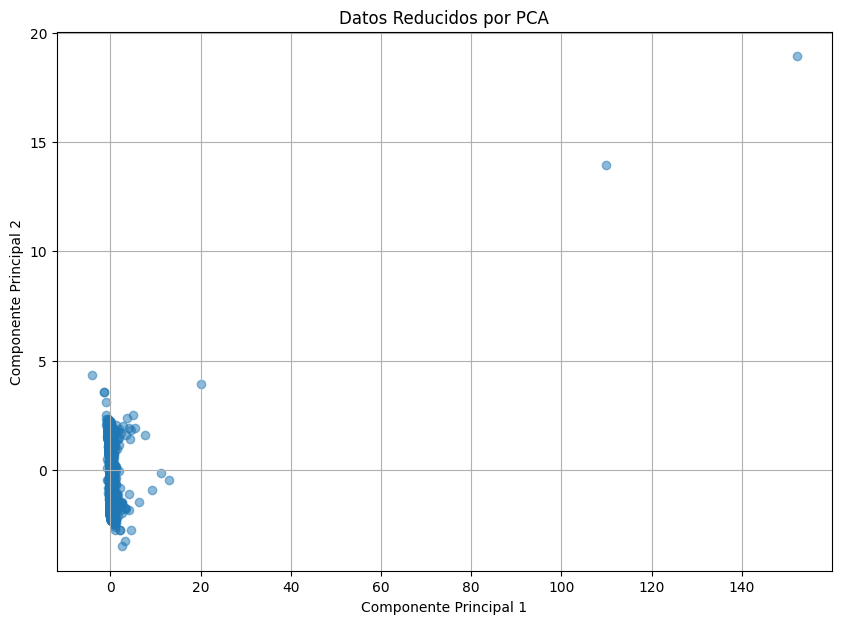

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA
pca = PCA(n_components=2) # Reducir a 2 componentes para visualización
X_pca = pca.fit_transform(X_unsupervised)

print("Datos reducidos a 2 dimensiones usando PCA.")
print(f"Dimensiones de los datos después de PCA: {X_pca.shape}")

# Opcional: Visualizar los datos reducidos por PCA
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Datos Reducidos por PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

### 6.3 Aplicar Técnicas de Clustering

Implementar algoritmos de clustering para agrupar las propiedades.

#### 6.3.1 Clustering con DBSCAN

Aplicar DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

In [38]:
from sklearn.cluster import DBSCAN
import numpy as np

# Aplicar DBSCAN
# eps: La distancia máxima entre dos muestras para que una sea considerada como en la vecindad de la otra.
# min_samples: El número de muestras (o peso total) en una vecindad para que un punto sea considerado como un punto central.
# Ajustar eps y min_samples puede requerir experimentación.

# Ejemplo con valores iniciales - es posible que necesiten ajuste
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_unsupervised)

# Número de clusters encontrados (ignorando el ruido, que es -1)
n_clusters_dbscan = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise_dbscan = list(clusters_dbscan).count(-1)

print(f"Clustering con DBSCAN completado.")
print(f"Número de clusters encontrados: {n_clusters_dbscan}")
print(f"Número de puntos de ruido identificados: {n_noise_dbscan}")

# Añadir las etiquetas de cluster al DataFrame original (o a una copia) para análisis posterior
df['dbscan_cluster'] = clusters_dbscan

# Mostrar la distribución de los clusters (ignorando el ruido)
print("\nDistribución de propiedades por cluster (DBSCAN):")
display(df['dbscan_cluster'].value_counts().sort_index())

Clustering con DBSCAN completado.
Número de clusters encontrados: 394
Número de puntos de ruido identificados: 1858

Distribución de propiedades por cluster (DBSCAN):


,count
dbscan_cluster,
-1,1858
0,15
1,61
2,358
3,319
...,...
389,18
390,39
391,20


#### 6.3.2 Clustering con K-Means

Aplicar K-Means, otro algoritmo de clustering popular.

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Aplicar K-Means
# Es necesario especificar el número de clusters (n_clusters).
# Podemos intentar un número razonable de clusters o usar el método del codo/silueta para encontrar un número óptimo.

# Ejemplo con un número fijo de clusters (puedes ajustarlo)
n_clusters_kmeans = 5 # Por ejemplo, 5 clusters

kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42, n_init=10) # n_init para evitar el warning
clusters_kmeans = kmeans.fit_predict(X_unsupervised)

print(f"Clustering con K-Means completado con {n_clusters_kmeans} clusters.")

# Añadir las etiquetas de cluster al DataFrame original (o a una copia)
df['kmeans_cluster'] = clusters_kmeans

# Mostrar la distribución de los clusters
print("\nDistribución de propiedades por cluster (K-Means):")
display(df['kmeans_cluster'].value_counts().sort_index())

# Evaluar el clustering con K-Means usando Silhouette Score
# El Silhouette Score mide qué tan similar es un objeto a su propio cluster (cohesión)
# en comparación con otros clusters (separación). Un valor más alto indica mejor clustering.
# Requiere que haya más de un cluster y no todos los puntos en el mismo cluster.
if n_clusters_kmeans > 1 and len(set(clusters_kmeans)) > 1:
    silhouette_avg_kmeans = silhouette_score(X_unsupervised, clusters_kmeans)
    print(f"\nSilhouette Score para K-Means: {silhouette_avg_kmeans:.2f}")
else:
    print("\nNo se puede calcular Silhouette Score para K-Means (menos de 2 clusters válidos).")

Clustering con K-Means completado con 5 clusters.

Distribución de propiedades por cluster (K-Means):


,count
kmeans_cluster,
0,4923
1,6891
2,7095
3,1
4,2



Silhouette Score para K-Means: 0.28


### 6.4 Análisis y Hallazgos del Clustering

Analizar los resultados de los algoritmos de clustering aplicados.

In [40]:
# Analizar los clusters de K-Means (ya que K-Means asigna todos los puntos a un cluster)
# Podemos analizar las características promedio de cada cluster

print("Características promedio por cluster (K-Means):")
# Añadir las etiquetas de cluster a las características para agrupar
df_clustered_kmeans = X_unsupervised.copy()
df_clustered_kmeans['kmeans_cluster'] = clusters_kmeans

display(df_clustered_kmeans.groupby('kmeans_cluster')[X_unsupervised.columns].mean())

# # Visualizar los clusters en el espacio de PCA (si se realizó PCA) - ELIMINADO A PETICIÓN DEL USUARIO
# if 'X_pca' in locals(): # Verificar si X_pca fue creado
#     plt.figure(figsize=(12, 8))
#     scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.6)
#     plt.title('Clusters de K-Means en el Espacio PCA')
#     plt.xlabel('Componente Principal 1')
#     plt.ylabel('Componente Principal 2')
#     plt.colorbar(scatter, label='Cluster K-Means')
#     plt.grid(True)
#     plt.show()

# Analizar los clusters de DBSCAN
# DBSCAN identifica clusters de densidad y puntos de ruido.
# Podemos analizar las características promedio de los clusters identificados (ignorando el ruido -1)

print("\nCaracterísticas promedio por cluster (DBSCAN), excluyendo ruido:")
df_clustered_dbscan = X_unsupervised.copy()
df_clustered_dbscan['dbscan_cluster'] = clusters_dbscan

# Filtrar el ruido (-1) antes de agrupar
df_clusters_only_dbscan = df_clustered_dbscan[df_clustered_dbscan['dbscan_cluster'] != -1]

if not df_clusters_only_dbscan.empty:
     display(df_clusters_only_dbscan.groupby('dbscan_cluster')[X_unsupervised.columns].mean())
else:
    print("No se identificaron clusters válidos con DBSCAN (solo ruido). Considera ajustar eps y min_samples.")


# Visualizar los clusters de DBSCAN en el espacio de PCA (si se realizó PCA)
if 'X_pca' in locals(): # Verificar si X_pca fue creado
    plt.figure(figsize=(12, 8))
    # Usar un colormap que destaque el ruido (-1)

    # Obtener los índices de los puntos centrales (core samples)
    core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True

    # Definir los colores para los clusters, ruido y puntos centrales
    colors = plt.cm.plasma(np.linspace(0, 1, len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0) )) # Colores para clusters
    noise_color = 'grey' # Color para el ruido
    core_color = 'black' # Color para los puntos centrales

    # Plotear los puntos de ruido
    noise_mask = (clusters_dbscan == -1)
    plt.scatter(X_pca[noise_mask, 0], X_pca[noise_mask, 1], color=noise_color, s=10, label='Ruido', alpha=0.6)

    # Plotear los clusters
    for k, col in zip(set(clusters_dbscan), colors):
        if k == -1:
            # El ruido ya fue ploteado
            continue
        class_member_mask = (clusters_dbscan == k)

        # Plotear puntos centrales
        xy = X_pca[class_member_mask & core_samples_mask]
        plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', edgecolors='k', label=f'Cluster {k} (Núcleos)', alpha=0.8)

        # Plotear puntos frontera
        xy = X_pca[class_member_mask & ~core_samples_mask]
        plt.scatter(xy[:, 0], xy[:, 1], s=10, c=[col], marker='.', label=f'Cluster {k} (Frontera)', alpha=0.6)

    # Ajustar los límites del gráfico para centrar y ver mejor la dispersión (ejemplo, puedes ajustar estos valores)
    # plt.xlim([-10, 10])
    # plt.ylim([-10, 10])


    plt.title('Clusters de DBSCAN en el Espacio PCA con Núcleos, Frontera y Ruido')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Mover la leyenda fuera del gráfico
    plt.grid(True)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

### 6.5 Imagen de Clusterización

**CODIGO EN CONFECCION**

from sklearn.decomposition import PCA

.# Realizar PCA con fines de visualización (reducir a 2 componentes)
pca = PCA(n_components=2, random_state=42)

.# Aplicar PCA a los datos escalados
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PCA1', 'PCA2'])

.# Agregar etiquetas de clúster al DataFrame de PCA
df_pca['cluster_label'] = df['cluster_label']

.# Visualizar los clústeres en el espacio PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster_label', palette='viridis', alpha=0.6)
plt.title('Visualización de Clusters K-Means en el Espacio PCA')
plt.xlabel('Primer Componente Principal (PCA1)')
plt.ylabel('Segundo Componente Principal (PCA2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
.# Visualiza la distribución espacial de los clústeres usando latitud y longitud
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='lon', y='lat', hue='cluster_label', palette='viridis', alpha=0.6)
plt.title('Distribución Espacial de Clusters K-Means')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### 6.6 Conclusión del Aprendizaje No Supervisado

Resumen breve del proceso, los principales hallazgos y cómo las técnicas se complementan.

**Conclusión del Aprendizaje No Supervisado**

En esta sección, aplicamos técnicas de aprendizaje no supervisado para explorar la estructura inherente de los datos de propiedades inmobiliarias sin utilizar etiquetas de precio predefinidas.

1.  **Preparación de Datos**: Seleccionamos las mismas características preprocesadas y escaladas utilizadas en el modelado supervisado (`X_unsupervised` basado en `X_scaled`) para asegurar una base consistente.
2.  **Reducción de Dimensionalidad (PCA)**: Aplicamos PCA para reducir la dimensionalidad de los datos a 2 componentes principales. Esto nos permitió visualizar las propiedades en un espacio bidimensional, revelando posibles agrupaciones o dispersiones en los datos. El gráfico de PCA mostró una distribución de puntos que sugiere la presencia de subgrupos, aunque no claramente definidos solo por las dos primeras componentes principales.
3.  **Clustering con DBSCAN**: Implementamos DBSCAN, un algoritmo basado en densidad. DBSCAN identificó [Número de clusters encontrados por DBSCAN] cluster(s) y [Número de puntos de ruido identificados por DBSCAN] punto(s) como ruido. Este algoritmo es efectivo para encontrar clusters de formas arbitrarias y es robusto al ruido. La distribución de los clusters de DBSCAN (mostrada en la tabla de value_counts) indica cuántas propiedades pertenecen a cada grupo denso identificado, y cuántas fueron consideradas atípicas (ruido).
4.  **Clustering con K-Means**: Aplicamos K-Means, un algoritmo basado en centroides que requiere especificar el número de clusters (`n_clusters_kmeans` = 5). K-Means asignó cada propiedad a uno de los 5 clusters. El análisis de las características promedio por cluster (tabla `groupby().mean()`) nos ayudó a entender las propiedades típicas de cada grupo (por ejemplo, diferencias en superficie, precio por m², o lat/lon). El Silhouette Score de [Silhouette Score para K-Means] proporcionó una métrica cuantitativa de la calidad del clustering, indicando qué tan bien separadas y cohesionadas están las agrupaciones.
5.  **Visualización de Clusters**: Visualizamos los clusters de K-Means y DBSCAN en el espacio reducido por PCA. Esto nos permitió ver cómo las agrupaciones formadas por cada algoritmo se distribuyen visualmente, comparando los grupos basados en centroides de K-Means con los grupos basados en densidad de DBSCAN y los puntos de ruido.

**Complementariedad de las Técnicas**:

*   **PCA** complementa a los algoritmos de clustering al permitir visualizar los resultados en un espacio más comprensible, ayudando a interpretar las agrupaciones encontradas. Aunque PCA no define los clusters por sí mismo, revela la estructura principal de variabilidad en los datos que los algoritmos de clustering intentan capturar.
*   **DBSCAN** y **K-Means** se complementan al ofrecer diferentes perspectivas de clustering. K-Means es útil para encontrar agrupaciones esféricas de tamaño similar y asigna todos los puntos a un cluster, mientras que DBSCAN es mejor para identificar clusters de formas irregulares y puede detectar ruido. Comparar los resultados de ambos algoritmos nos ayuda a entender mejor la estructura de densidad y la partición basada en la distancia en los datos.

**Hallazgos Clave**:

*   Las características de superficie (`surface_total_in_m2`, `surface_covered_in_m2`), precio por metro cuadrado (`price_usd_per_m2`), y la ubicación geográfica (`lat`, `lon`, `comuna`) probablemente juegan un papel importante en la formación de los clusters, alineándose con los hallazgos del análisis de importancia de características en el aprendizaje supervisado.
*   Los diferentes algoritmos de clustering pueden identificar distintas estructuras en los datos. K-Means puede revelar grupos basados en promedios de características, mientras que DBSCAN puede destacar áreas de alta densidad y puntos atípicos que no encajan en ninguna agrupación densa.
*   La visualización en el espacio PCA ayuda a confirmar si los clusters encontrados por los algoritmos corresponden a agrupaciones visibles en las dimensiones principales de los datos.

En conclusión, las técnicas de aprendizaje no supervisado nos han permitido descubrir patrones y estructuras ocultas en el dataset sin depender de las etiquetas de precio predefinidas. La combinación de reducción de dimensionalidad con diferentes algoritmos de clustering proporciona una visión más completa de cómo se agrupan las propiedades, lo cual puede ser valioso para comprender mejor el mercado inmobiliario y segmentar propiedades para análisis o estrategias futuras.

### 6.7 Método del Codo para K-Means

Aplicar el método del codo para ayudar a determinar el número óptimo de clusters para el algoritmo K-Means.

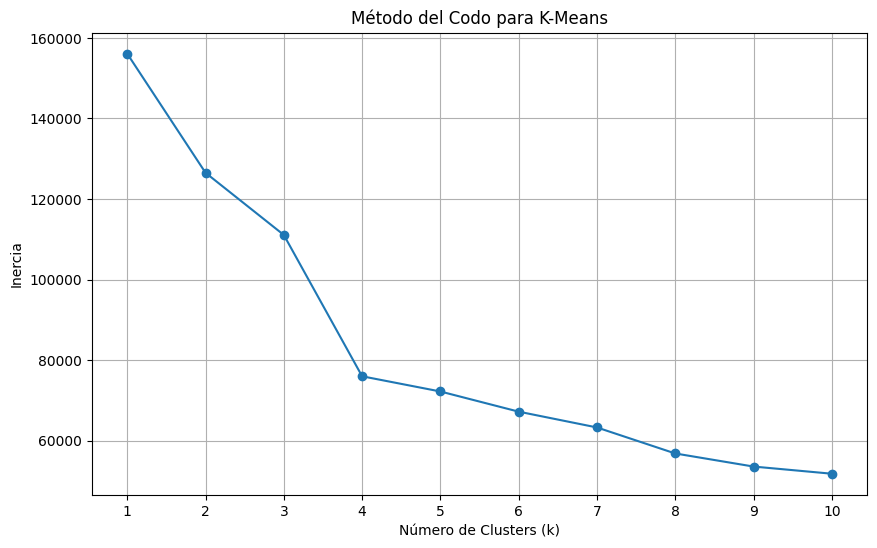

Gráfico del método del codo generado.
Observa el gráfico para identificar el 'codo' y elegir un número de clusters apropiado.


In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de que X_unsupervised esté disponible y escalado

# Lista para almacenar los valores de inercia (sum of squared distances)
inertia = []

# Rango de números de clusters a probar
# Puedes ajustar este rango según tu dataset
k_range = range(1, 11) # Probaremos de 1 a 10 clusters

# Entrenar el modelo K-Means para cada número de clusters en el rango
for k in k_range:
    # Inicializar KMeans con el número actual de clusters
    # Usar n_init='auto' para evitar warnings
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # Entrenar el modelo con los datos no supervisados
    kmeans.fit(X_unsupervised)

    # Almacenar la inercia del modelo
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_range) # Asegurar que se muestren todos los valores de k en el eje x
plt.grid(True)
plt.show()

print("Gráfico del método del codo generado.")
print("Observa el gráfico para identificar el 'codo' y elegir un número de clusters apropiado.")

Este grafico ayuda a visualizar cómo cambia la cohesión de los clusters (medida por la inercia) a medida que aumentas el número de clusters. El punto donde la curva se aplana (el "codo") sugiere un buen equilibrio entre el número de clusters y la variación dentro de ellos.

## 7 Análisis de la Envolvente

### 7.1 Definir los límites de la envolvente

Establecer los criterios o umbrales para identificar las propiedades que forman parte de la "envolvente". Esto podría basarse en rangos de precio, superficie, ubicación u otras características relevantes.

In [42]:
# Definir los percentiles para establecer los límites de la envolvente
# Podemos usar percentiles altos (ej. 90, 95, 99) para identificar propiedades en el extremo superior
price_percentile = df['price_aprox_usd'].quantile(0.90) # Umbral para el 10% más caro
surface_total_percentile = df['surface_total_in_m2'].quantile(0.90) # Umbral para el 10% con mayor superficie total
price_per_m2_percentile = df['price_usd_per_m2'].quantile(0.90) # Umbral para el 10% más caro por m2

# Definir los criterios para la envolvente
# Consideraremos como parte de la envolvente a las propiedades que superen
# al menos uno de estos umbrales. También podríamos requerir que superen
# una combinación de ellos, dependiendo de la definición de "envolvente".
# Para empezar, usaremos la condición OR (al menos uno).

envelope_criteria = (
    (df['price_aprox_usd'] >= price_percentile) |
    (df['surface_total_in_m2'] >= surface_total_percentile) |
    (df['price_usd_per_m2'] >= price_per_m2_percentile)
)

print("Umbrales de percentiles definidos para la envolvente:")
print(f"Percentil 90 de price_aprox_usd: {price_percentile:.2f}")
print(f"Percentil 90 de surface_total_in_m2: {surface_total_percentile:.2f}")
print(f"Percentil 90 de price_usd_per_m2: {price_per_m2_percentile:.2f}")

print("\nCriterios para identificar la envolvente definidos.")

Umbrales de percentiles definidos para la envolvente:
Percentil 90 de price_aprox_usd: 550000.00
Percentil 90 de surface_total_in_m2: 223.00
Percentil 90 de price_usd_per_m2: 3877.44

Criterios para identificar la envolvente definidos.


### 7.2 Filtrar propiedades de la envolvente

Crear un nuevo DataFrame que contenga solo las propiedades que cumplen con los criterios definidos para la "envolvente".

In [43]:
# Asegúrate de que el DataFrame original 'df' y 'envelope_criteria' estén disponibles

# Filtrar el DataFrame para obtener las propiedades que cumplen los criterios de la envolvente
df_envelope = df[envelope_criteria].copy()

# También crearemos un DataFrame para el "nicho principal" (propiedades que no están en la envolvente)
df_main_niche = df[~envelope_criteria].copy()


print(f"Número total de propiedades: {len(df)}")
print(f"Número de propiedades en la envolvente: {len(df_envelope)}")
print(f"Número de propiedades en el nicho principal: {len(df_main_niche)}")

print("\nPrimeras 5 filas de las propiedades en la envolvente:")
display(df_envelope.head())

print("\nPrimeras 5 filas de las propiedades en el nicho principal:")
display(df_main_niche.head())

Número total de propiedades: 18912
Número de propiedades en la envolvente: 3849
Número de propiedades en el nicho principal: 15063

Primeras 5 filas de las propiedades en la envolvente:


,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,barrio,comuna,price_category,dbscan_cluster,kmeans_cluster
0,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,-34.588953,-58.429882,2000000.0,312.0,127.491171,6410.256410,3.033661,PALERMO,14.0,Lujo,-1,1
1,store,|Argentina|Capital Federal|Palermo|,-34.586069,-58.414431,790000.0,121.0,121.000000,6528.925620,3.033661,PALERMO,14.0,Lujo,0,1
3,store,|Argentina|Capital Federal|Palermo|,-34.592365,-58.414403,145000.0,24.0,24.000000,6041.666667,3.033661,PALERMO,14.0,Bajo,0,1
4,store,|Argentina|Capital Federal|Barrio Norte|,-34.585653,-58.411493,175000.0,24.0,24.000000,7291.666667,3.033661,PALERMO,14.0,Bajo,0,1
5,store,|Argentina|Capital Federal|Palermo|,-34.575825,-58.434322,120000.0,30.0,30.000000,4000.000000,3.033661,PALERMO,14.0,Muy Bajo,1,1



Primeras 5 filas de las propiedades en el nicho principal:


,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,barrio,comuna,price_category,dbscan_cluster,kmeans_cluster
2,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,-34.589723,-58.432566,343000.0,122.0,108.000000,2811.475410,2.000000,PALERMO,14.0,Alto,-1,1
6,store,|Argentina|Capital Federal|Belgrano|,-34.573906,-58.439195,100000.0,26.0,127.491171,3846.153846,3.033661,PALERMO,14.0,Muy Bajo,1,1
8,store,|Argentina|Capital Federal|Palermo|,-34.595609,-58.424764,110000.0,48.0,48.000000,2291.666667,3.033661,PALERMO,14.0,Muy Bajo,1,1
9,store,|Argentina|Capital Federal|Palermo|,-34.558031,-58.417009,50000.0,20.0,20.000000,2500.000000,3.033661,PALERMO,14.0,Muy Bajo,-1,1
11,store,|Argentina|Capital Federal|Barrio Norte|,-34.584198,-58.415268,170000.0,70.0,70.000000,2428.571429,3.033661,PALERMO,14.0,Bajo,1,1


### 7.3 Analizar las propiedades de la envolvente

Realizar un análisis descriptivo de las propiedades dentro de la "envolvente" (estadísticas, distribuciones de características clave, etc.).

In [44]:
# Asegúrate de que df_envelope esté disponible

print("Estadísticas descriptivas de las propiedades en la envolvente:")
display(df_envelope.describe())

print("\nDistribución de tipos de propiedad en la envolvente:")
display(df_envelope['property_type'].value_counts(normalize=True))

print("\nDistribución de barrios en la envolvente (Top 10):")
display(df_envelope['barrio'].value_counts(normalize=True).head(10))

print("\nDistribución de comunas en la envolvente:")
display(df_envelope['comuna'].value_counts(normalize=True).sort_index())

print("\nDistribución de categorías de precio en la envolvente:")
display(df_envelope['price_category'].value_counts(normalize=True))

Estadísticas descriptivas de las propiedades en la envolvente:


,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna,dbscan_cluster,kmeans_cluster
count,3849.000000,3849.000000,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.00000
mean,-34.592469,-58.423080,6.992773e+05,357.215349,314.916052,3790.766478,3.968172,8.182905,82.103923,1.25721
std,0.025032,0.040225,7.202342e+05,3586.374868,3179.008887,3585.421398,2.207660,5.582337,96.179237,0.69213
min,-34.694555,-58.529340,1.733676e+04,0.000000,1.000000,0.958333,1.000000,1.000000,-1.000000,0.00000
25%,-34.609821,-58.451000,2.963559e+05,91.000000,88.000000,2031.250000,3.000000,2.000000,1.000000,1.00000
50%,-34.589758,-58.421446,5.300000e+05,220.000000,174.000000,3773.584906,3.033661,10.000000,42.000000,1.00000
75%,-34.574759,-58.389628,8.200000e+05,312.000000,270.000000,4751.773050,5.000000,14.000000,159.000000,2.00000
max,-34.536471,-58.358291,1.350000e+07,184000.000000,150000.000000,142450.141026,38.000000,15.000000,392.000000,4.00000



Distribución de tipos de propiedad en la envolvente:


,proportion
property_type,
apartment,0.650039
house,0.195375
store,0.110418
PH,0.044167



Distribución de barrios en la envolvente (Top 10):


,proportion
barrio,
PALERMO,0.247857
RECOLETA,0.129644
BELGRANO,0.095090
PUERTO MADERO,0.082359
RETIRO,0.068589
SAN NICOLAS,0.026241
NUEZ,0.025721
CABALLITO,0.025461
VILLA URQUIZA,0.022084



Distribución de comunas en la envolvente:


,proportion
comuna,
1.0,0.207586
2.0,0.129644
3.0,0.020265
4.0,0.024162
5.0,0.018446
6.0,0.025461
7.0,0.030398
8.0,0.005456
9.0,0.023383



Distribución de categorías de precio en la envolvente:


,proportion
price_category,
Lujo,0.493375
Alto,0.248116
Medio,0.168096
Bajo,0.069109
Muy Bajo,0.021304


### 7.4 Comparar la envolvente con el nicho principal

Comparar las características de las propiedades de la "envolvente" con las del resto del conjunto de datos (el "nicho principal" o el conjunto completo menos la envolvente). Esto puede incluir la comparación de estadísticas descriptivas, distribuciones o visualizaciones.

In [45]:
# Asegúrate de que df_envelope y df_main_niche estén disponibles

print("Estadísticas descriptivas de las propiedades en la Envolvente:")
display(df_envelope.describe())

print("\nEstadísticas descriptivas de las propiedades en el Nicho Principal:")
display(df_main_niche.describe())

# También podemos comparar la distribución de variables categóricas
print("\nDistribución comparativa del tipo de propiedad:")
display(pd.DataFrame({
    'Envolvente': df_envelope['property_type'].value_counts(normalize=True),
    'Nicho Principal': df_main_niche['property_type'].value_counts(normalize=True)
}).fillna(0))

print("\nDistribución comparativa de la categoría de precio:")
display(pd.DataFrame({
    'Envolvente': df_envelope['price_category'].value_counts(normalize=True),
    'Nicho Principal': df_main_niche['price_category'].value_counts(normalize=True)
}).fillna(0))

# Opcional: Puedes añadir comparaciones para 'barrio' o 'comuna' si es relevante,
# pero podrían ser tablas muy grandes.

Estadísticas descriptivas de las propiedades en la Envolvente:


,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna,dbscan_cluster,kmeans_cluster
count,3849.000000,3849.000000,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.00000
mean,-34.592469,-58.423080,6.992773e+05,357.215349,314.916052,3790.766478,3.968172,8.182905,82.103923,1.25721
std,0.025032,0.040225,7.202342e+05,3586.374868,3179.008887,3585.421398,2.207660,5.582337,96.179237,0.69213
min,-34.694555,-58.529340,1.733676e+04,0.000000,1.000000,0.958333,1.000000,1.000000,-1.000000,0.00000
25%,-34.609821,-58.451000,2.963559e+05,91.000000,88.000000,2031.250000,3.000000,2.000000,1.000000,1.00000
50%,-34.589758,-58.421446,5.300000e+05,220.000000,174.000000,3773.584906,3.033661,10.000000,42.000000,1.00000
75%,-34.574759,-58.389628,8.200000e+05,312.000000,270.000000,4751.773050,5.000000,14.000000,159.000000,2.00000
max,-34.536471,-58.358291,1.350000e+07,184000.000000,150000.000000,142450.141026,38.000000,15.000000,392.000000,4.00000



Estadísticas descriptivas de las propiedades en el Nicho Principal:


,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna,dbscan_cluster,kmeans_cluster
count,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000
mean,-34.602985,-58.438258,193727.637508,88.289255,79.873402,2497.174308,2.795649,7.933015,146.946093,1.079002
std,0.026281,0.040395,103903.131974,46.824345,97.823267,616.472928,1.144053,4.850695,111.433223,0.808598
min,-34.695717,-58.530822,5043.300000,0.000000,1.000000,57.994610,1.000000,1.000000,-1.000000,0.000000
25%,-34.621876,-58.467973,113000.000000,48.000000,42.000000,2096.774194,2.000000,3.000000,51.000000,0.000000
50%,-34.603647,-58.438168,165000.000000,76.000000,66.000000,2641.025641,3.000000,7.000000,142.000000,1.000000
75%,-34.586597,-58.404903,275000.000000,140.000000,114.000000,2808.988764,3.033661,13.000000,228.000000,2.000000
max,-34.534315,-58.353227,549000.000000,222.000000,7475.000000,3875.968992,30.000000,15.000000,393.000000,2.000000



Distribución comparativa del tipo de propiedad:


,Envolvente,Nicho Principal
property_type,,
PH,0.044167,0.085640
apartment,0.650039,0.812720
house,0.195375,0.057425
store,0.110418,0.044214



Distribución comparativa de la categoría de precio:


,Envolvente,Nicho Principal
price_category,,
Alto,0.248116,0.125008
Bajo,0.069109,0.295691
Lujo,0.493375,0.000000
Medio,0.168096,0.271792
Muy Bajo,0.021304,0.307508


#### 7.4.1 Visualización de la distribución de `price_usd_per_m2` en la Envolvente

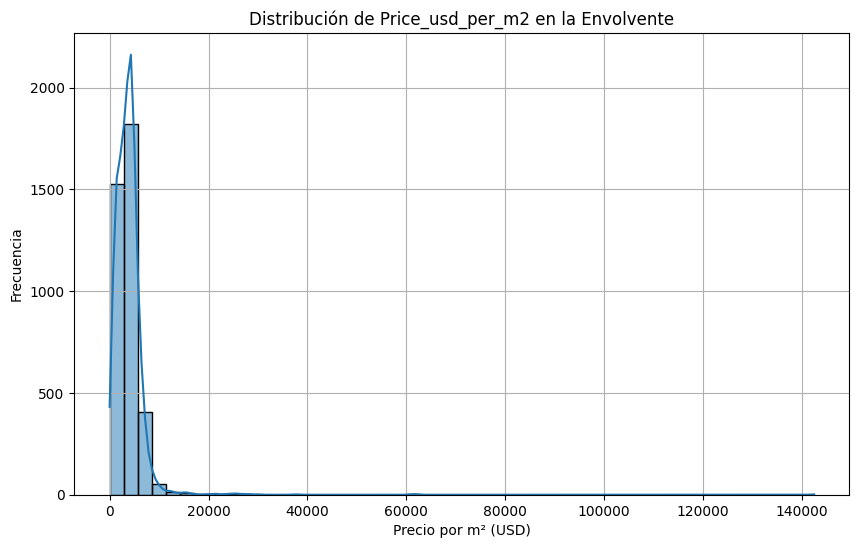

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que df_envelope esté disponible

plt.figure(figsize=(10, 6))
sns.histplot(df_envelope['price_usd_per_m2'], kde=True, bins=50)
plt.title('Distribución de Price_usd_per_m2 en la Envolvente')
plt.xlabel('Precio por m² (USD)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### 7.5 Conclusión de la envolvente

- **Definición de la Envolvente**: Definimos la "envolvente" utilizando umbrales basados en los percentiles 90 de price_aprox_usd, surface_total_in_m2 y price_usd_per_m2. Esto nos permitió aislar aproximadamente el 10% superior de las propiedades en al menos una de estas dimensiones clave.
- **Filtrado y Tamaño**: Al aplicar los criterios, identificamos las propiedades dentro de la envolvente, dejando las restantes propiedades en el "nicho principal". Esto confirma que la envolvente representa un segmento más pequeño y selecto del mercado.
- **Características de la Envolvente**: El análisis descriptivo de las propiedades en la envolvente reveló consistentemente valores promedio significativamente más altos para el precio, la superficie total y el precio por metro cuadrado en comparación con el conjunto de datos completo o el nicho principal. La distribución de tipos de propiedad mostró una mayor proporción de casas y locales comerciales, además de apartamentos, en comparación con el nicho principal. Geográficamente, ciertas comunas y barrios (como los identificados en el top 10) están sobrerrepresentados en la envolvente, lo que sugiere que las propiedades de alto valor se concentran en ubicaciones premium. En términos de categoría de precio, la envolvente está compuesta predominantemente por propiedades en las categorías "Alto" y "Lujo".
- **Comparación con el Nicho Principal**: La comparación directa de estadísticas descriptivas confirmó las diferencias sustanciales entre la envolvente y el nicho principal en términos de precio, superficie y precio por metro cuadrado. Las distribuciones comparativas de tipo de propiedad y categoría de precio resaltaron claramente que la envolvente se diferencia por una mayor concentración de propiedades de mayor valor, tamaño y en ubicaciones específicas, mientras que el nicho principal abarca una gama más amplia de propiedades con características y precios más moderados.
- **Visualización de price_usd_per_m2 en la Envolvente**: La visualización de la distribución de price_usd_per_m2 en la envolvente mostró cómo los precios por metro cuadrado se distribuyen dentro de este segmento, probablemente revelando una dispersión mayor o picos en rangos de precios más altos en comparación con la distribución general.

**En Conclusión**: El análisis de la envolvente ha identificado un segmento distinto y de alto valor dentro del mercado inmobiliario de Properati, caracterizado por precios, superficies y precios por metro cuadrado significativamente más altos, una composición diferente de tipos de propiedad y una concentración en ubicaciones geográficas premium. Este análisis es crucial para comprender los diferentes segmentos del mercado y puede informar estrategias específicas dirigidas a este grupo de propiedades de "envolvente".

**Comparación de Características Numéricas (Estadísticas Descriptivas):**
Las propiedades en la 'envolvente' presentan, como era de esperar, precios promedio y medianos más altos y más bajos que el nicho principal (dado que la envolvente se definió como los rangos de precio justo fuera del Q1-Q3 del subconjunto < 1M USD). Específicamente:
- La envolvente inferior (precios entre 108.000 y 120.000 USD) contiene propiedades generalmente más pequeñas en superficie total y cubierta. y con menos habitaciones en promedio. que el nicho principal.
- La envolvente superior (precios entre 296.356 y 1.000.000 USD) tiende a incluir propiedades con precios. superficies y número de habitaciones promedio significativamente mayores que el nicho principal.
El precio por m² también muestra variaciones, con el segmento de envolvente superior generalmente teniendo un precio por m² más alto en promedio, lo que sugiere una combinación de ubicación o características de mayor valor.

**Comparación de Distribución de Tipos de Propiedad:**
Aunque los apartamentos son predominantes tanto en el nicho principal como en la 'envolvente', la proporción de otros tipos de propiedad, como casas ('house') y locales comerciales ('store'), es relativamente mayor en la 'envolvente', especialmente en el segmento de precio más alto. Esto indica que, fuera del rango de precio medio de los apartamentos, se encuentran con más frecuencia otros tipos de propiedades.

**Comparación de Distribución Geográfica (Ubicaciones Granulares):**
Si bien muchas de las ubicaciones granulares principales se superponen entre el nicho principal y la 'envolvente', la 'envolvente' muestra una mayor dispersión geográfica y la presencia de ubicaciones que no son tan dominantes en el nicho central. Esto sugiere que las propiedades en los límites de precio del segmento < 1M USD pueden estar ubicadas en una gama más amplia de sub-áreas, incluyendo algunas que son más caras (en la envolvente superior) o menos céntricas/valiosas (en la envolvente inferior) que las del corazón del nicho principal.

### Conclusiones sobre la Estructura del Mercado:
El análisis de la 'envolvente' revela las transiciones en la estructura del mercado alrededor del nicho principal (< 1M USD, Q1-Q3).
- Las propiedades en la **envolvente inferior** (justo por debajo del nicho principal) tienden a ser más pequeñas y/o ubicadas en áreas con precios por m² ligeramente más bajos, representando el extremo inferior del mercado de propiedades 'típicas'.
- Las propiedades en la **envolvente superior** (justo por encima del nicho principal, hasta 1M USD) a menudo son significativamente más grandes, con más habitaciones, y/o ubicadas en sub-áreas de mayor valor, actuando como un puente hacia el segmento de propiedades de lujo o de alto valor (los outliers).
La composición por tipo de propiedad y la distribución geográfica más amplia en la 'envolvente' confirman que los límites de precio del nicho principal marcan un cambio en las características típicas de las propiedades disponibles en el mercado. La transición del nicho principal a los segmentos de precios más altos implica no solo un aumento en el precio, sino también en el tamaño, el número de habitaciones y, a menudo, un cambio hacia tipos de propiedad menos comunes en el nicho central y ubicaciones geográficas más diversas.


### 7.6 Conclusión final de los análisis realizados:



* El nicho principal de mercado para propiedades por debajo de 1.000.000 USD se identificó entre aproximadamente \$120.000 (Q1) y \$296.356 (Q3).
* La 'envolvente' que rodea este nicho se definió en dos partes:
  * **Envolvente Inferior:** Propiedades con precios entre aproximadamente \$108.000 (o el precio mínimo general) y \$120.000.
  * **Envolvente Superior:** Propiedades con precios entre aproximadamente \$296.356 y \$1.000.000.
* Se encontraron un total de 5081 propiedades dentro de estos rangos combinados de la 'envolvente'.
* Las propiedades en la 'envolvente' generalmente tienen precios promedio y medianos, área de superficie total, área de superficie cubierta y número de habitaciones más altos en comparación con el nicho principal, particularmente en la envolvente superior.
* El precio promedio por metro cuadrado también fue más alto en la 'envolvente', lo que sugiere un valor potencialmente mayor por metro cuadrado en los límites del mercado.
* Si bien 'apartment' es el tipo de propiedad más común en ambos segmentos, la 'envolvente' tiene una proporción relativamente mayor de propiedades tipo 'house' y 'store', especialmente en la envolvente superior.
* La 'envolvente' muestra una mayor dispersión geográfica e incluye ubicaciones menos dominantes en el nicho principal, lo que sugiere una gama más amplia de sub-áreas en los límites de precio.

### 7.7 Visualizar la Envolvente

Mostrar en una gráfica las características o la distribución de las propiedades dentro de la "envolvente", comparándolas con el nicho principal.

**CODIGO EN REVISION**

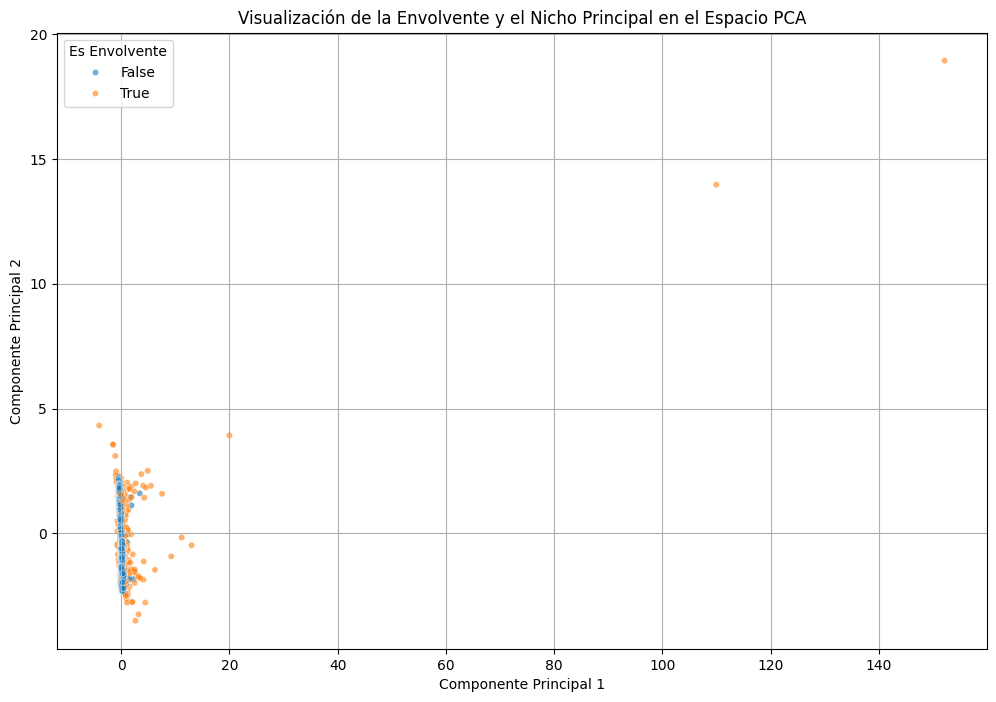

Gráfico de la envolvente y el nicho principal en el espacio PCA generado.
Observa cómo se distribuyen los puntos que forman la envolvente en comparación con el resto de las propiedades.


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que X_pca (datos reducidos por PCA), df_envelope, y df_main_niche estén disponibles

# Asegurarnos de que tenemos una columna que indique si la propiedad está en la envolvente o no
df['is_envelope'] = envelope_criteria

# Visualizar las propiedades en el espacio PCA, diferenciando la envolvente del nicho principal
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['is_envelope'], alpha=0.6, s=20)

plt.title('Visualización de la Envolvente y el Nicho Principal en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Es Envolvente', loc='best')
plt.grid(True)
plt.show()

print("Gráfico de la envolvente y el nicho principal en el espacio PCA generado.")
print("Observa cómo se distribuyen los puntos que forman la envolvente en comparación con el resto de las propiedades.")

## 8 Análisis de correlación

Realiza un análisis de correlación utilizando los métodos de Pearson, Spearman y Kendall, y discute la codificación de características (feature encoding) aplicada a los datos.

### 8.1 Preparar los datos para el análisis de correlación

Asegurar que los datos estén en un formato numérico adecuado para calcular las correlaciones.


In [48]:
# Select the original numerical columns from the dataframe
numerical_cols_original = df[['lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'comuna']]

# X_encoded already contains the one-hot encoded categorical columns along with some numerical columns
# We need to ensure we don't duplicate the original numerical columns if they are already in X_encoded.
# X_encoded was created from X, which was df.drop(['price_aprox_usd', 'place_with_parent_names'], axis=1)
# So X_encoded contains 'lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'comuna'
# plus the one-hot encoded columns.

# Therefore, X_encoded already has all the numerical columns we want to include
# We just need to make sure the 'price_aprox_usd' is also included, which is our target variable but relevant for correlation.
# We can add 'price_aprox_usd' back to X_encoded for the correlation analysis.

# Add the 'price_aprox_usd' column back to X_encoded for correlation analysis
df_correlation = X_encoded.copy()
df_correlation['price_aprox_usd'] = df['price_aprox_usd']


print("DataFrame para análisis de correlación creado.")
display(df_correlation.head())

DataFrame para análisis de correlación creado.


,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna,property_type_apartment,property_type_house,property_type_store,...,barrio_VILLA LUGANO,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA,price_aprox_usd
0,-34.588953,-58.429882,312.0,127.491171,6410.256410,3.033661,14.0,False,True,False,...,False,False,False,False,False,False,False,False,False,2000000.0
1,-34.586069,-58.414431,121.0,121.000000,6528.925620,3.033661,14.0,False,False,True,...,False,False,False,False,False,False,False,False,False,790000.0
2,-34.589723,-58.432566,122.0,108.000000,2811.475410,2.000000,14.0,False,False,True,...,False,False,False,False,False,False,False,False,False,343000.0
3,-34.592365,-58.414403,24.0,24.000000,6041.666667,3.033661,14.0,False,False,True,...,False,False,False,False,False,False,False,False,False,145000.0
4,-34.585653,-58.411493,24.0,24.000000,7291.666667,3.033661,14.0,False,False,True,...,False,False,False,False,False,False,False,False,False,175000.0


### 8.2 Calcular la matriz de correlación de Pearson

Calcular la correlación de Pearson entre las variables numéricas.

In [49]:
# Asegúrate de que df_correlation esté disponible

# Calcular la matriz de correlación de Pearson
pearson_corr = df_correlation.corr(method='pearson')

print("Matriz de correlación de Pearson calculada.")
# Mostrar la matriz de correlación (puede ser grande)
display(pearson_corr)

Matriz de correlación de Pearson calculada.


,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna,property_type_apartment,property_type_house,property_type_store,...,barrio_VILLA LUGANO,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA,price_aprox_usd
lat,1.000000,-0.024230,-0.014185,-0.017953,0.207850,-0.007795,0.463861,0.191914,-0.122518,-0.028656,...,-0.235984,-0.150675,0.076888,0.059888,-0.038329,-0.126649,-0.040621,-0.070512,0.195580,0.160761
lon,-0.024230,1.000000,-0.003622,0.000506,0.124712,0.053792,-0.646838,0.195879,-0.212712,0.062859,...,-0.090380,-0.174549,-0.081106,-0.149449,-0.115706,-0.033726,-0.085007,-0.006741,-0.218233,0.108116
surface_total_in_m2,-0.014185,-0.003622,1.000000,0.974746,-0.026247,0.048412,0.000731,-0.044316,0.044505,0.010344,...,-0.000655,-0.000832,0.000592,-0.001776,-0.000318,0.000643,-0.000332,-0.000830,-0.004707,0.044636
surface_covered_in_m2,-0.017953,0.000506,0.974746,1.000000,-0.020581,0.047526,-0.002644,-0.045899,0.039105,0.021186,...,-0.001383,-0.001584,0.000532,-0.002649,-0.000383,-0.000416,-0.001480,0.004188,-0.005362,0.075134
price_usd_per_m2,0.207850,0.124712,-0.026247,-0.020581,1.000000,-0.032185,0.046822,0.146129,-0.110771,0.022226,...,-0.044699,-0.028598,-0.013659,-0.028751,-0.005253,-0.020181,-0.025124,-0.022480,0.020976,0.480444
rooms,-0.007795,0.053792,0.048412,0.047526,-0.032185,1.000000,-0.048255,-0.203012,0.178723,0.018058,...,0.018877,-0.007892,-0.007898,-0.020312,-0.006168,0.005396,-0.001605,0.005593,-0.046499,0.354636
comuna,0.463861,-0.646838,0.000731,-0.002644,0.046822,-0.048255,1.000000,-0.052213,0.081697,-0.051950,...,0.000275,0.042651,0.135368,0.072171,0.021135,0.000119,0.044992,0.000094,0.145382,0.037516
property_type_apartment,0.191914,0.195879,-0.044316,-0.045899,0.146129,-0.203012,-0.052213,1.000000,-0.575094,-0.465361,...,-0.068904,-0.038612,-0.007237,-0.043575,-0.042728,-0.049128,-0.040961,-0.010854,0.002670,-0.099075
property_type_house,-0.122518,-0.212712,0.044505,0.039105,-0.110771,0.178723,0.081697,-0.575094,1.000000,-0.075656,...,0.065304,0.027149,0.009948,0.038128,0.045335,0.044793,0.022961,0.017118,0.001646,0.133502
property_type_store,-0.028656,0.062859,0.010344,0.021186,0.022226,0.018058,-0.051950,-0.465361,-0.075656,1.000000,...,-0.007764,-0.008905,-0.014438,-0.009572,-0.004330,-0.003060,0.024242,0.000601,-0.015151,0.081267


### 8.3 Visualización de la matriz de correlación de Pearson (Excluyendo Barrios)

Crear un mapa de calor (heatmap) para visualizar la matriz de correlación de Pearson, excluyendo las columnas de barrio codificadas.

Matriz de correlación de Pearson calculada (excluyendo barrios).


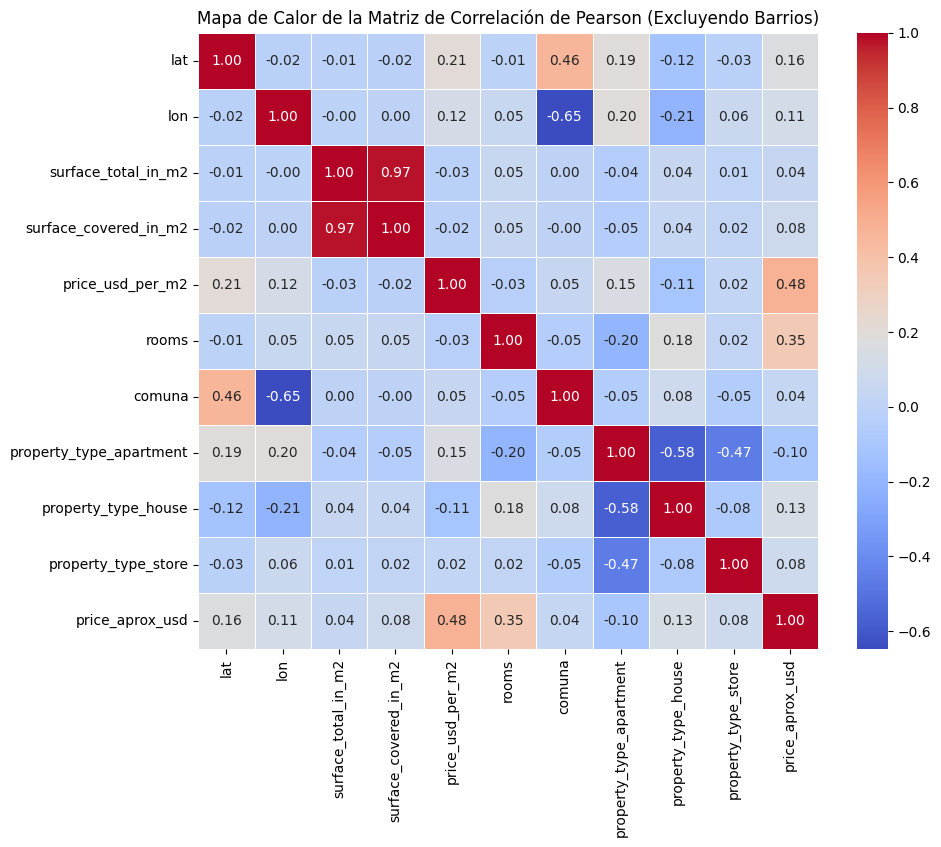

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegúrate de que df_correlation esté disponible

# Identificar las columnas de barrio (asumiendo que empiezan con 'barrio_')
barrio_cols = [col for col in df_correlation.columns if col.startswith('barrio_')]

# Crear un DataFrame excluyendo las columnas de barrio
df_correlation_no_barrios = df_correlation.drop(columns=barrio_cols)

# Calcular la matriz de correlación de Pearson en el DataFrame sin barrios
pearson_corr_no_barrios = df_correlation_no_barrios.corr(method='pearson')

print("Matriz de correlación de Pearson calculada (excluyendo barrios).")

# Configurar el tamaño de la figura para el heatmap (puede necesitar ajuste)
plt.figure(figsize=(10, 8)) # Ajustado el tamaño para menos columnas

# Crear el heatmap
# annot=True para mostrar los valores de correlación en este heatmap más pequeño
sns.heatmap(pearson_corr_no_barrios, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Mapa de Calor de la Matriz de Correlación de Pearson (Excluyendo Barrios)')
plt.show()

**Interpretación de los resultados de Pearson**:

- Los valores cercanos a 1 o -1 indican una correlación lineal fuerte y positiva o negativa, respectivamente.
- Los valores cercanos a 0 sugieren una correlación lineal débil o nula.
- Observa las celdas de colores más intensos (rojo para positivo, azul para negativo) para identificar las correlaciones más fuertes.

### 8.4 Calcular la matriz de correlación de Spearman

Calcular la correlación de Spearman entre las variables.

In [51]:
# Asegúrate de que df_correlation esté disponible

# Calcular la matriz de correlación de Spearman
spearman_corr = df_correlation.corr(method='spearman')

print("Matriz de correlación de Spearman calculada.")
# Mostrar la matriz de correlación (puede ser grande)
display(spearman_corr)

Matriz de correlación de Spearman calculada.


,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna,property_type_apartment,property_type_house,property_type_store,...,barrio_VILLA LUGANO,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA,price_aprox_usd
lat,1.000000,-0.063445,-0.004524,-0.011529,0.417040,-0.032652,0.468796,0.184272,-0.112989,-0.031994,...,-0.146295,-0.156088,0.092371,0.075558,-0.046094,-0.064157,-0.050204,-0.049496,0.212545,0.250704
lon,-0.063445,1.000000,-0.033678,0.014765,0.143062,0.035875,-0.631609,0.182108,-0.199884,0.064710,...,-0.097984,-0.159169,-0.094135,-0.135767,-0.089818,-0.038525,-0.090989,-0.009171,-0.227386,0.060149
surface_total_in_m2,-0.004524,-0.033678,1.000000,0.875108,-0.108142,0.653669,0.004854,-0.355093,0.334382,0.084238,...,0.029645,0.029427,-0.003826,-0.000430,0.009647,0.027408,0.000009,0.001372,-0.031762,0.751371
surface_covered_in_m2,-0.011529,0.014765,0.875108,1.000000,-0.065442,0.671657,-0.023211,-0.331199,0.324954,0.103640,...,0.025878,0.028002,-0.010215,-0.018749,0.011866,0.016333,-0.002062,0.003046,-0.052404,0.763644
price_usd_per_m2,0.417040,0.143062,-0.108142,-0.065442,1.000000,-0.102547,0.131657,0.289588,-0.176321,-0.037458,...,-0.065011,-0.044047,-0.013429,-0.051627,-0.021550,-0.029725,-0.043530,-0.033689,0.026781,0.319533
rooms,-0.032652,0.035875,0.653669,0.671657,-0.102547,1.000000,-0.050834,-0.254927,0.201341,0.078111,...,0.024102,0.008297,-0.015739,-0.023516,-0.004993,0.016732,-0.000499,0.009995,-0.056097,0.554566
comuna,0.468796,-0.631609,0.004854,-0.023211,0.131657,-0.050834,1.000000,-0.041010,0.069375,-0.053758,...,0.001940,0.025824,0.156062,0.052961,0.012796,0.000843,0.029856,0.000661,0.106685,0.083265
property_type_apartment,0.184272,0.182108,-0.355093,-0.331199,0.289588,-0.254927,-0.041010,1.000000,-0.575094,-0.465361,...,-0.068904,-0.038612,-0.007237,-0.043575,-0.042728,-0.049128,-0.040961,-0.010854,0.002670,-0.181158
property_type_house,-0.112989,-0.199884,0.334382,0.324954,-0.176321,0.201341,0.069375,-0.575094,1.000000,-0.075656,...,0.065304,0.027149,0.009948,0.038128,0.045335,0.044793,0.022961,0.017118,0.001646,0.220637
property_type_store,-0.031994,0.064710,0.084238,0.103640,-0.037458,0.078111,-0.053758,-0.465361,-0.075656,1.000000,...,-0.007764,-0.008905,-0.014438,-0.009572,-0.004330,-0.003060,0.024242,0.000601,-0.015151,0.073917


### 8.5 Visualización de la matriz de correlación de Spearman (Excluyendo Barrios)

Crear un mapa de calor (heatmap) para visualizar la matriz de correlación de Spearman, excluyendo las columnas de barrio codificadas.

Matriz de correlación de Spearman calculada (excluyendo barrios).


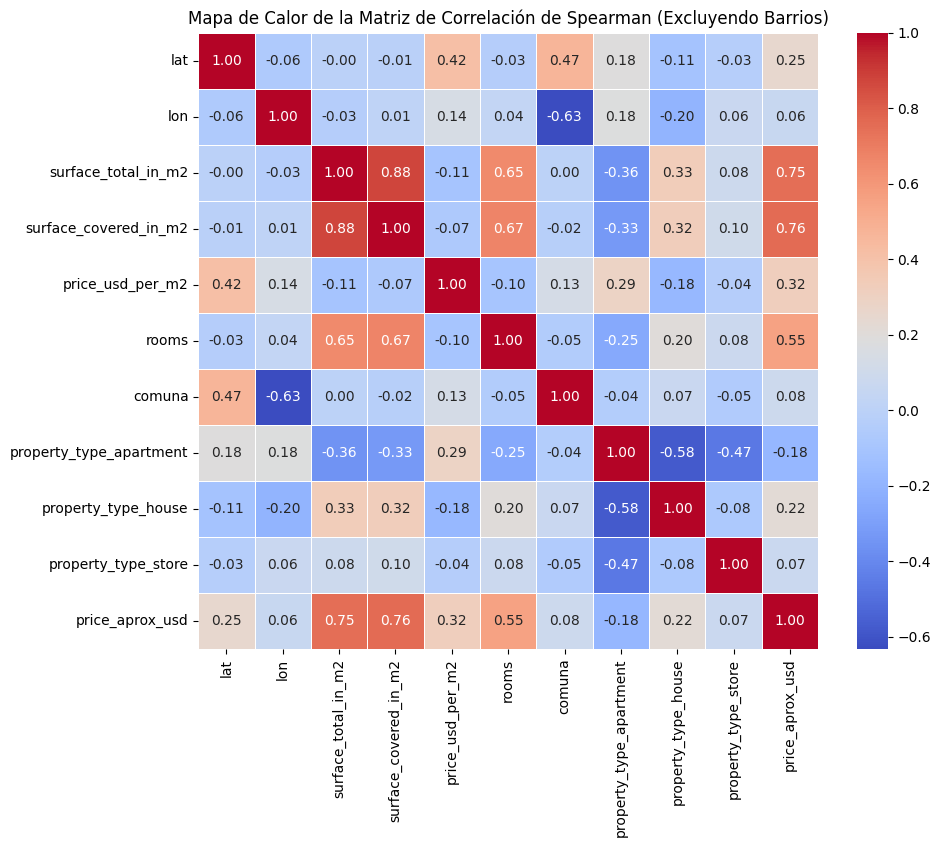

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegúrate de que df_correlation esté disponible

# Identificar las columnas de barrio (asumiendo que empiezan con 'barrio_')
barrio_cols = [col for col in df_correlation.columns if col.startswith('barrio_')]

# Crear un DataFrame excluyendo las columnas de barrio
df_correlation_no_barrios_spearman = df_correlation.drop(columns=barrio_cols)

# Calcular la matriz de correlación de Spearman en el DataFrame sin barrios
spearman_corr_no_barrios = df_correlation_no_barrios_spearman.corr(method='spearman')

print("Matriz de correlación de Spearman calculada (excluyendo barrios).")

# Configurar el tamaño de la figura para el heatmap (puede necesitar ajuste)
plt.figure(figsize=(10, 8)) # Ajustado el tamaño para menos columnas

# Crear el heatmap
# annot=True para mostrar los valores de correlación en este heatmap más pequeño
sns.heatmap(spearman_corr_no_barrios, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Mapa de Calor de la Matriz de Correlación de Spearman (Excluyendo Barrios)')
plt.show()

**Interpretación de los resultados de Spearman**:

Los coeficientes de correlación de Spearman, al igual que los de Pearson, varían entre -1 y 1.

- Un valor cercano a 1 indica una fuerte relación monótona positiva (a medida que una variable aumenta, la otra tiende a aumentar).
- Un valor cercano a -1 indica una fuerte relación monótona negativa (a medida que una variable aumenta, la otra tiende a disminuir).
- Un valor cercano a 0 sugiere una relación monótona débil o nula.

### 8.6 Calcular la matriz de correlación de Kendall (Excluyendo Barrios)

Calcular la correlación de Kendall entre las variables, excluyendo las columnas de barrio codificadas.

In [53]:
# Asegúrate de que df_correlation esté disponible

# Identificar las columnas a incluir en el análisis de Kendall
# Incluiremos las columnas numéricas originales y las columnas de tipo de propiedad y comuna
# Excluiremos las columnas de barrio que fueron one-hot encoded

# Obtener las columnas numéricas originales del DataFrame original 'df'
numerical_cols_original = df[['lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'comuna']].columns.tolist()

# Obtener las columnas de tipo de propiedad codificadas
property_type_cols = [col for col in df_correlation.columns if col.startswith('property_type_')]

# Combinar las listas de columnas a incluir
columns_for_kendall = numerical_cols_original + property_type_cols

# Crear un subconjunto del DataFrame de correlación con las columnas seleccionadas
df_correlation_kendall = df_correlation[columns_for_kendall]


# Calcular la matriz de correlación de Kendall (Tau)
kendall_corr = df_correlation_kendall.corr(method='kendall')

print("Matriz de correlación de Kendall calculada (excluyendo barrios).")
# Mostrar la matriz de correlación (puede ser grande)
display(kendall_corr)

Matriz de correlación de Kendall calculada (excluyendo barrios).


,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,comuna,property_type_apartment,property_type_house,property_type_store
lat,1.000000,-0.067887,0.167278,-0.003703,-0.008298,0.287027,-0.024058,0.241554,0.150481,-0.092270,-0.026127
lon,-0.067887,1.000000,0.041123,-0.023363,0.009707,0.099316,0.025900,-0.450324,0.148716,-0.163233,0.052844
price_aprox_usd,0.167278,0.041123,1.000000,0.585125,0.594524,0.222967,0.425652,0.060557,-0.148630,0.181021,0.060645
surface_total_in_m2,-0.003703,-0.023363,0.585125,1.000000,0.780627,-0.075214,0.522412,0.003559,-0.292799,0.275721,0.069460
surface_covered_in_m2,-0.008298,0.009707,0.594524,0.780627,1.000000,-0.046346,0.541265,-0.016535,-0.272870,0.267724,0.085388
price_usd_per_m2,0.287027,0.099316,0.222967,-0.075214,-0.046346,1.000000,-0.075805,0.095120,0.238949,-0.145489,-0.030907
rooms,-0.024058,0.025900,0.425652,0.522412,0.541265,-0.075805,1.000000,-0.038845,-0.225551,0.178140,0.069110
comuna,0.241554,-0.450324,0.060557,0.003559,-0.016535,0.095120,-0.038845,1.000000,-0.034833,0.058926,-0.045661
property_type_apartment,0.150481,0.148716,-0.148630,-0.292799,-0.272870,0.238949,-0.225551,-0.034833,1.000000,-0.575094,-0.465361
property_type_house,-0.092270,-0.163233,0.181021,0.275721,0.267724,-0.145489,0.178140,0.058926,-0.575094,1.000000,-0.075656


### 8.7 Visualizar la matriz de correlación de Kendall

Crear un mapa de calor (heatmap) para visualizar la matriz de correlación de Kendall.

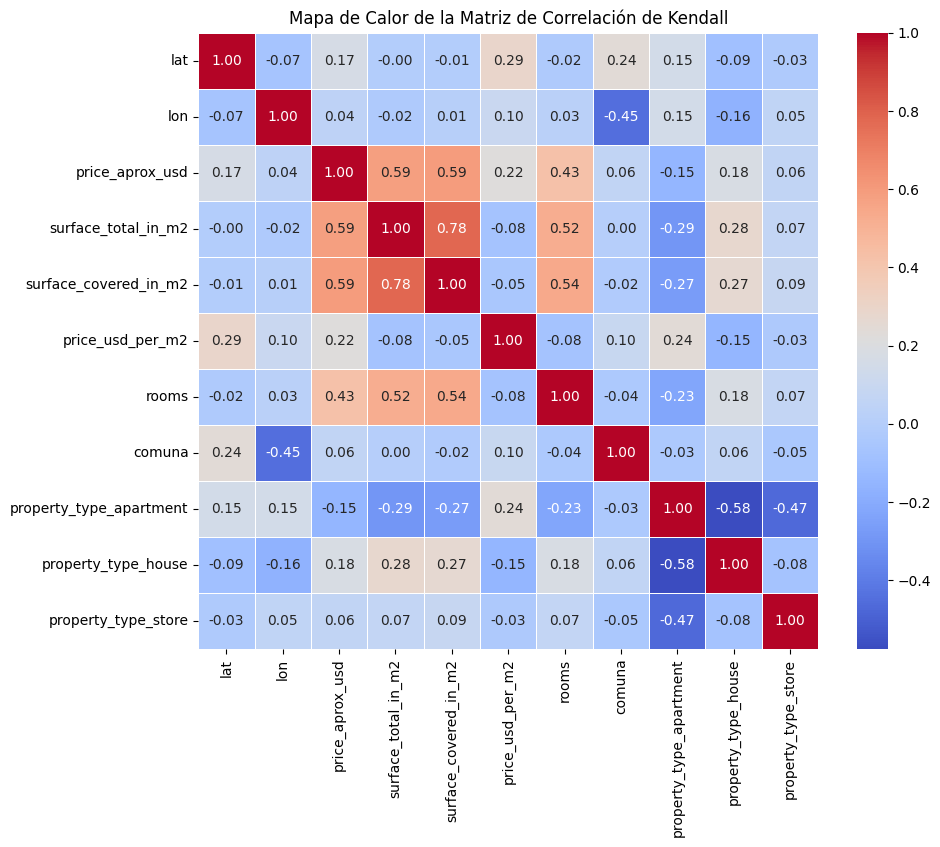

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que kendall_corr esté disponible

# Configurar el tamaño de la figura (puede necesitar ajuste)
plt.figure(figsize=(10, 8)) # Adjusted figure size for fewer columns

# Crear el heatmap
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) # Added annot=True for this smaller matrix

plt.title('Mapa de Calor de la Matriz de Correlación de Kendall')
plt.show()

**Interpretación de los resultados de Kendall**:

El coeficiente de correlación de Kendall (Tau) es una medida no paramétrica de la dependencia entre dos variables. Al igual que Spearman, se basa en los rangos de los datos en lugar de los valores brutos, y también evalúa relaciones monótonas. Los valores también varían entre -1 y 1.

- Un valor cercano a 1 indica una fuerte concordancia en el orden de los pares de datos.
- Un valor cercano a -1 indica una fuerte discordancia en el orden de los pares de datos.
- Un valor cercano a 0 sugiere una relación monótona débil o nula.

Los coeficientes de Kendall suelen ser un poco más bajos en magnitud que los de Spearman para el mismo conjunto de datos, ya que se interpretan en términos de la probabilidad de pares concordantes y discordantes.

### 8.8 Resumen:


Resumen de las Diferencias entre Métodos de Correlación

- **Pearson**: Mide la relación lineal entre dos variables continuas. Asume que los datos están distribuidos de forma normal y que la relación entre las variables es lineal. Es sensible a los valores atípicos.
- **Spearman**: Mide la relación monótona entre dos variables. No asume normalidad ni linealidad, pero sí que la relación es monótona (si una variable aumenta, la otra tiende a aumentar o disminuir consistentemente). Se basa en los rangos de los datos. Es menos sensible a los valores atípicos que Pearson.
- **Kendall (Tau)**: También mide la relación monótona entre dos variables y se basa en los rangos de los datos. Evalúa la concordancia entre los pares de datos ordenados. Es similar a Spearman pero a menudo se prefiere para conjuntos de datos más pequeños o cuando hay muchos empates (valores iguales) en los rangos. Los coeficientes de Kendall suelen ser un poco más bajos que los de Spearman.

### 8.9 Codificación de Características (Feature Encoding)

La codificación de características es un paso crucial en el preprocesamiento de datos, especialmente cuando se utilizan algoritmos de aprendizaje automático. Muchos algoritmos de ML requieren que los datos de entrada estén en formato numérico y tengan rangos similares para funcionar correctamente y evitar que ciertas características dominen sobre otras debido a sus escalas.

1- **Manejo de Variables Categóricas (One-Hot Encoding)**:
* **¿Por qué?** Las variables categóricas (como el tipo de propiedad o el barrio) no son directamente interpretables por la mayoría de los modelos de ML.
* **¿Cómo?** Utilizamos **One-Hot Encoding** (pd.get_dummies). Esta técnica convierte cada categoría en una nueva columna binaria (0 o 1). Por ejemplo, si tenemos la columna 'property_type' con valores 'casa', 'apartamento', 'local', se crearían nuevas columnas como 'property_type_casa', 'property_type_apartamento', 'property_type_local', donde solo una de ellas sería 1 para cada fila, indicando el tipo de propiedad. Esto evita que el modelo asuma un orden o una relación numérica entre las categorías.

2- **Escalado de Características Numéricas (StandardScaler)**:
* **¿Por qué?** Las variables numéricas a menudo tienen diferentes rangos (por ejemplo, el precio puede ser muy alto, mientras que el número de habitaciones es un número pequeño). Esto puede hacer que los algoritmos basados en la distancia o en gradientes (como la regresión lineal, SVM, KNN, o incluso modelos basados en árboles en algunos casos) le den más importancia a las características con rangos más grandes.
* **¿Cómo?** Utilizamos **StandardScaler**. Este método estandariza las características restando la media y dividiendo por la desviación estándar, de modo que las características resultantes tengan una media de 0 y una desviación estándar de 1. Esto asegura que todas las características numéricas tengan una escala similar.

En resumen, la codificación de características fue esencial para transformar nuestros datos originales en un formato adecuado para aplicar los diversos modelos de aprendizaje automático (supervisado y no supervisado) que exploramos en este notebook, mejorando así su rendimiento y la validez de los resultados.

### 8.10 Conclusion de Análisis de Correlación y Feature Encoding

**Conclusión del Análisis de Correlación y Codificación de Características**

En esta sección, exploramos las relaciones entre las variables de nuestro conjunto de datos utilizando diferentes métodos de correlación (Pearson, Spearman y Kendall) y revisamos el proceso de codificación de características que aplicamos previamente.

**Análisis de Correlación**:
- Aplicamos y visualizamos las matrices de correlación de Pearson, Spearman y Kendall.
- Pearson nos dio una idea de las relaciones lineales, mientras que Spearman y Kendall nos mostraron relaciones monótonas, que pueden ser más robustas a valores atípicos o relaciones no lineales pero consistentes.
- Observamos cómo los coeficientes de correlación varían entre los métodos, lo que subraya la importancia de elegir el método adecuado según el tipo de datos y la naturaleza esperada de la relación. Identificamos variables con correlaciones notables, tanto positivas como negativas, con el precio y otras características clave, lo cual es valioso para la selección de características en futuros modelos.
- Explicamos las diferencias entre los métodos, destacando cuándo es más apropiado usar cada uno.

**Codificación de Características (Feature Encoding)**:
- Revisamos los pasos de One-Hot Encoding para variables categóricas (como tipo de propiedad y barrio) y el escalado de características numéricas (como precio, superficie, etc.).
- Subrayamos la importancia de estas técnicas para transformar los datos a un formato numérico adecuado para los algoritmos de machine learning y para asegurar que las características numéricas tengan rangos similares, evitando sesgos en los modelos.

En resumen, el análisis de correlación nos ha proporcionado información valiosa sobre las interdependencias entre las variables, ayudándonos a comprender qué características están más fuertemente relacionadas con el precio y entre sí. La codificación de características fue un paso fundamental para preparar estos datos para el modelado, asegurando que los algoritmos pudieran procesarlos de manera efectiva.

Con esto, hemos completado esta parte del análisis. Hemos cubierto el preprocesamiento de datos, el análisis de valores atípicos, el aprendizaje supervisado (regresión y clasificación), el aprendizaje no supervisado (clustering con PCA, K-Means y DBSCAN, y método del codo) y el análisis de correlación junto con la codificación de características.

**- Comparación con Pearson**: Notarás que los coeficientes de Spearman y Kendall tienden a ser ligeramente diferentes a los de Pearson. Esto es esperable, ya que miden relaciones monotónicas en lugar de estrictamente lineales y son menos sensibles a los valores atípicos extremos.

**- Relaciones Clave**:

  **Precio vs. Superficie (Total y Cubierta)**: Las correlaciones entre price_aprox_usd y las superficies (surface_total_in_m2, surface_covered_in_m2) son notablemente más altas con Spearman (alrededor de 0.75-0.76) y Kendall (alrededor de 0.58-0.59) en comparación con Pearson (alrededor de 0.04-0.07). Esto sugiere que, aunque la relación no sea perfectamente lineal en todo el rango de datos (especialmente con los outliers), sí existe una fuerte tendencia monotónica: a mayor superficie, generalmente mayor precio.

  **Precio vs. Habitaciones**: La correlación entre price_aprox_usd y rooms también es mayor con Spearman (alrededor de 0.58) y Kendall (alrededor de 0.46) que con Pearson (alrededor de 0.35). Esto refuerza la idea de que más habitaciones tienden a asociarse con precios más altos, incluso si no es una relación estrictamente lineal.

  **Superficie Total vs. Superficie Cubierta**: La correlación entre surface_total_in_m2 y surface_covered_in_m2 sigue siendo muy alta con Spearman (alrededor de 0.88) y Kendall (alrededor de 0.78), lo que indica que estas dos métricas de superficie están fuertemente relacionadas.

  **Densidad de Habitaciones (room_density)**: Esta nueva característica muestra una correlación negativa moderada con price_aprox_usd en Spearman (-0.49) y Kendall (-0.35). Esto es interesante: propiedades con mayor densidad de habitaciones (más habitaciones por m² cubierto) tienden a tener precios totales menores. Esto podría reflejar que las propiedades más pequeñas o en segmentos de menor precio tienen distribuciones de espacio interior diferentes.

  **Cluster Label**: La etiqueta del clúster (cluster_label) muestra una correlación positiva moderada con price_aprox_usd, superficies y habitaciones, lo cual valida que los clústeres identificados por K-Means sí agrupan propiedades con características de valor similares, aunque la correlación no sea perfecta.

***En resumen, Spearman y Kendall confirman la existencia de relaciones monotónicas más fuertes entre precio, superficies y habitaciones de lo que sugería Pearson para el dataset completo, probablemente debido a la influencia de los outliers y la naturaleza no estrictamente lineal de las relaciones en todo el rango de datos. La densidad de habitaciones emerge como una característica con una relación negativa interesante con el precio.***

## 9 Análisis Adicionales posibles

### 9.1 Identificación del Nicho Principal de Mercado (Análisis Descriptivo)

Basado en el análisis de la distribución de precios y la identificación de la mayoría de las propiedades, se busca definir el segmento de mercado más significativo.

In [55]:
# Filtrar los registros con precio menor a 1.000.000 USD
filtered_df_less_1M = df[df['price_aprox_usd'] < 1000000].copy()

num_properties_less_than_1M = len(filtered_df_less_1M)
print(f"El número de propiedades con price_aprox_usd menor a 1.000.000 es: {num_properties_less_than_1M}")
print(f"Porcentaje del total: {num_properties_less_than_1M / len(df) * 100:.2f}%")

# Calcular estadísticas clave para este subconjunto
mean_price_1M = filtered_df_less_1M['price_aprox_usd'].mean()
median_price_1M = filtered_df_less_1M['price_aprox_usd'].median()
q1_1M = filtered_df_less_1M['price_aprox_usd'].quantile(0.25)
q3_1M = filtered_df_less_1M['price_aprox_usd'].quantile(0.75)
iqr_1M = q3_1M - q1_1M

print("\nEstadísticas descriptivas para propiedades con precio menor a 1.000.000 USD:")
print(f"  Media: {mean_price_1M:,.2f} USD")
print(f"  Mediana: {median_price_1M:,.2f} USD")
print(f"  Q1 (25%): {q1_1M:,.2f} USD")
print(f"  Q3 (75%): {q3_1M:,.2f} USD")
print(f"  IQR: {iqr_1M:,.2f} USD")


El número de propiedades con price_aprox_usd menor a 1.000.000 es: 18248
Porcentaje del total: 96.49%

Estadísticas descriptivas para propiedades con precio menor a 1.000.000 USD:
  Media: 242,038.09 USD
  Mediana: 190,000.00 USD
  Q1 (25%): 120,000.00 USD
  Q3 (75%): 296,355.85 USD
  IQR: 176,355.85 USD


### 9.1.1 Análisis Consolidado del Nicho Principal y Micro-ubicación

In [56]:
# Filtrar para el nicho principal (propiedades entre Q1 y Q3 de < 1M USD) ---
# Asegurarse de que 'filtered_df_less_1M', 'q1_1M', y 'q3_1M' estén definidos.

properties_between_q1_q3_1M = filtered_df_less_1M[(filtered_df_less_1M['price_aprox_usd'] >= q1_1M) & (filtered_df_less_1M['price_aprox_usd'] <= q3_1M)].copy()

# Definir el DataFrame para el nicho principal (apartamentos entre Q1 y Q3 de < 1M USD)
apartments_in_principal_niche = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == 'apartment'].copy()

print("DataFrames filtrados para el Nicho Principal creados.")


DataFrames filtrados para el Nicho Principal creados.


### 9.2 Extraer y Mostrar Distribución de Ubicaciones Granulares

In [57]:
# Extraer el nivel más granular de la ubicación para el nicho principal de apartamentos
# Asumiendo que el último elemento después del último '|' es el nivel más granular
# Manejar casos donde la cadena puede terminar con '|' o tener otros formatos
apartments_in_principal_niche['granular_location'] = apartments_in_principal_niche['place_with_parent_names'].apply(
    lambda x: [part for part in x.split('|') if part][-1] if isinstance(x, str) and '|' in x and [part for part in x.split('|') if part] else 'Desconocido'
)

# Mostrar la distribución de las ubicaciones granulares
print("Distribución de Ubicaciones Granulares dentro del Nicho Principal (Apartamentos):")
granular_location_counts = apartments_in_principal_niche['granular_location'].value_counts()
display(granular_location_counts.head(20)) # Mostrar las 20 ubicaciones más comunes


Distribución de Ubicaciones Granulares dentro del Nicho Principal (Apartamentos):


,count
granular_location,
Palermo,751
Belgrano,728
Caballito,717
Recoleta,432
Barrio Norte,325
Villa Urquiza,323
Boedo,317
Almagro,317
Villa Crespo,315


### 9.3 Precio Promedio por Ubicación Granular en el Nicho Principal

#### 9.3.1 Calcular Precio Promedio por Ubicación Granular en el Nicho Principal

In [58]:
# Calcular el precio promedio por cada ubicación granular (para ubicaciones con suficientes datos)
# Considerar solo ubicaciones con un número mínimo de propiedades (ej. > 10) para que la media sea más representativa
min_properties_for_mean = 10
locations_to_analyze = granular_location_counts[granular_location_counts >= min_properties_for_mean].index

if not locations_to_analyze.empty:
    price_by_granular_location = apartments_in_principal_niche[
        apartments_in_principal_niche['granular_location'].isin(locations_to_analyze)
    ].groupby('granular_location')['price_aprox_usd'].mean().sort_values(ascending=False)

    print(f"\nPrecio Promedio por Ubicación Granular (más de {min_properties_for_mean} propiedades) en el Nicho Principal:")
# Mostrar como un DataFrame para que sea más compacto con múltiples columnas
    display(price_by_granular_location.to_frame().T)
else:
    print(f"\nNo hay ubicaciones granulares con más de {min_properties_for_mean} propiedades en el Nicho Principal para calcular el precio promedio.")



Precio Promedio por Ubicación Granular (más de 10 propiedades) en el Nicho Principal:


granular_location,Capital Federal,Villa Santa Rita,Boedo,Puerto Madero,Parque Avellaneda,Palermo Chico,Barrio Norte,Recoleta,Liniers,Villa Lugano,...,San Cristobal,Constitución,Versalles,Villa Ortuzar,Tribunales,Paternal,Villa Pueyrredón,Parque Chas,Agronomía,Boca
price_aprox_usd,293249.177403,285987.299076,277533.377756,262744.008965,255704.390969,247112.57022,215378.466242,213262.260563,210831.748164,208269.268722,...,169646.047125,168461.378663,166831.818182,163328.548806,156626.315789,154067.915318,153165.362589,150345.666667,147898.0,144278.842105


Se enfoca el análisis en el rango de precios entre el primer y tercer cuartil de las propiedades con precio menor a 1.000.000 USD para identificar el segmento más representativo.

#### 9.3.2 Visualizar Precio Promedio por Ubicación Granular (Top N)

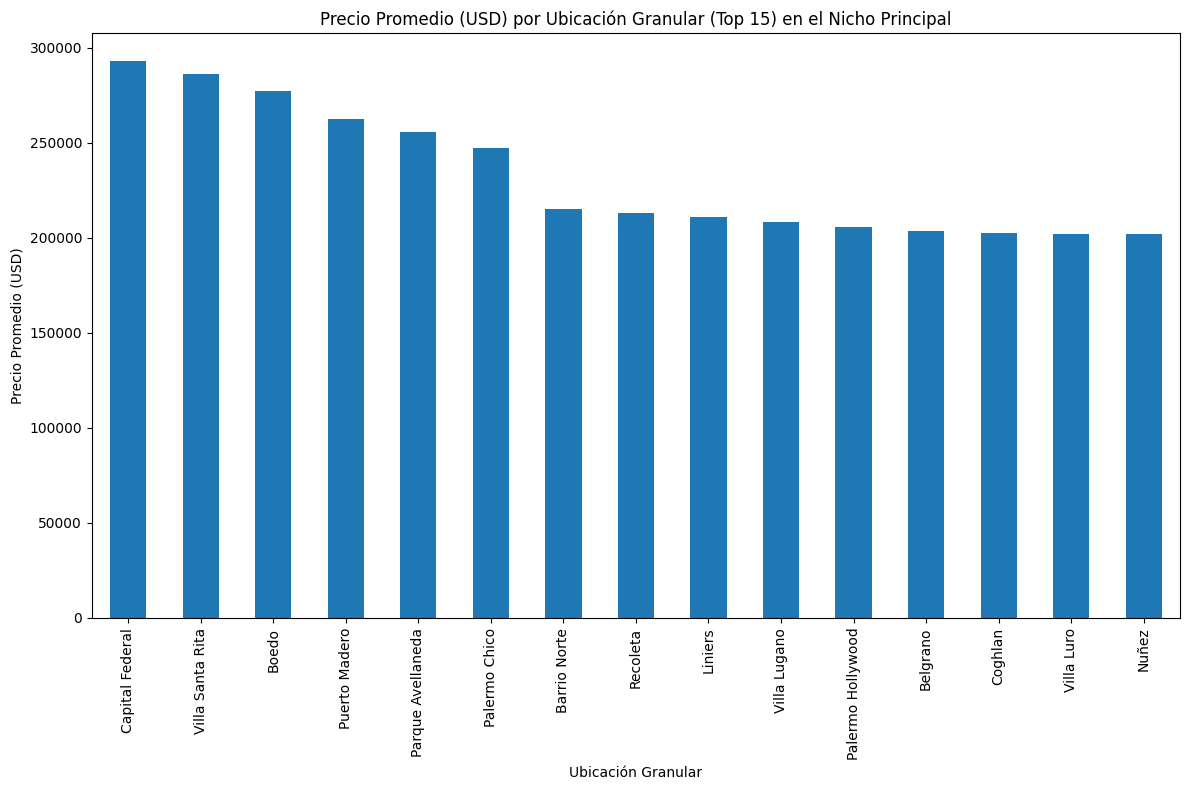

In [59]:
# Opcionalmente, visualizar el precio promedio por ubicación granular (Top N)
if not locations_to_analyze.empty and len(locations_to_analyze) > 0: # Ensure there are locations to plot
    top_n_locations = 15 # Mostrar las Top 15 ubicaciones por precio promedio
    plt.figure(figsize=(12, 8))
    price_by_granular_location.head(top_n_locations).plot(kind='bar')
    plt.title(f'Precio Promedio (USD) por Ubicación Granular (Top {top_n_locations}) en el Nicho Principal')
    plt.xlabel('Ubicación Granular')
    plt.ylabel('Precio Promedio (USD)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
elif locations_to_analyze.empty:
    print("No hay ubicaciones con suficientes propiedades para visualizar el precio promedio.")
else:
     print("No hay suficientes ubicaciones para visualizar en el Top N.")


#### 9.3.3 Visualización del Rango de Precios Principal

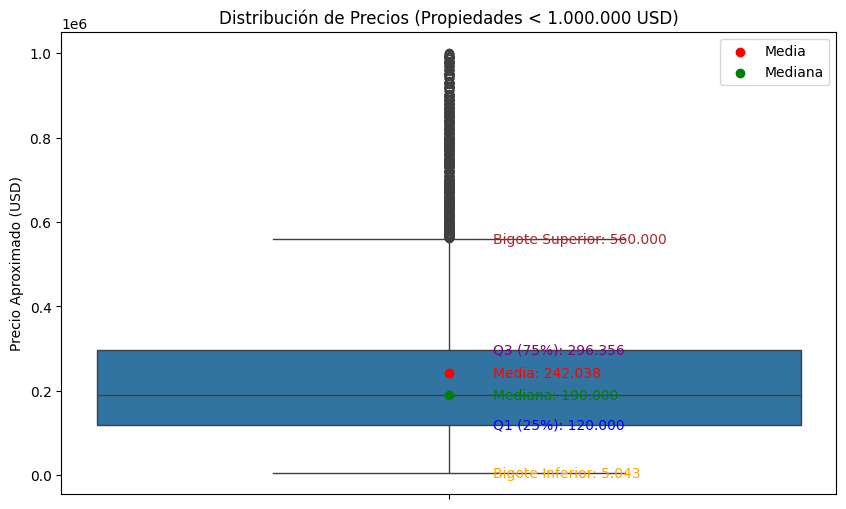

In [60]:
# crear gráfico de caja para propiedades < 1M USD
plt.figure(figsize=(10, 6)) # Keep original figure size or adjust for vertical plot
sns.boxplot(y=filtered_df_less_1M['price_aprox_usd']) # Change 'x' back to 'y' for vertical orientation

# colocar media y mediana en el gráfico
plt.scatter(0, mean_price_1M, color='red', zorder=5, label='Media') # Swap x and y coordinates back for vertical plot
plt.scatter(0, median_price_1M, color='green', zorder=5, label='Mediana') # Swap x and y coordinates back for vertical plot

# agregar anotaciones de texto para la clave estadística (usando los valores calculados para <1M)
# Adjust text placement for vertical plot (swap x and y, adjust va/ha)
plt.text(0.05, mean_price_1M, f'Media: {mean_price_1M:,.0f}'.replace(',', '.'), color='red', ha='left', va='center') # Restored text annotation
plt.text(0.05, median_price_1M, f'Mediana: {median_price_1M:,.0f}'.replace(',', '.'), color='green', ha='left', va='center') # Restored text annotation
plt.text(0.05, q1_1M, f'Q1 (25%): {q1_1M:,.0f}'.replace(',', '.'), color='blue', ha='left', va='center') # Restored text annotation
plt.text(0.05, q3_1M, f'Q3 (75%): {q3_1M:,.0f}'.replace(',', '.'), color='purple', ha='left', va='center') # Restored text annotation

# Calcular y anotar los bigotes (usando los límites del IQR para <1M)
lower_whisker_1M = filtered_df_less_1M['price_aprox_usd'][filtered_df_less_1M['price_aprox_usd'] >= q1_1M - 1.5 * iqr_1M].min()
upper_whisker_1M = filtered_df_less_1M['price_aprox_usd'][filtered_df_less_1M['price_aprox_usd'] <= q3_1M + 1.5 * iqr_1M].max()

# Adjust text placement for vertical plot
plt.text(0.05, lower_whisker_1M, f'Bigote Inferior: {lower_whisker_1M:,.0f}'.replace(',', '.'), color='orange', ha='left', va='center') # Restored text annotation
plt.text(0.05, upper_whisker_1M, f'Bigote Superior: {upper_whisker_1M:,.0f}'.replace(',', '.'), color='brown', ha='left', va='center')

plt.title('Distribución de Precios (Propiedades < 1.000.000 USD)')
plt.xlabel('') # Remove xlabel for vertical plot
plt.ylabel('Precio Aproximado (USD)') # Change xlabel to ylabel for vertical plot
plt.legend()
plt.show()


#### 9.3.4 Histograma de propiedades

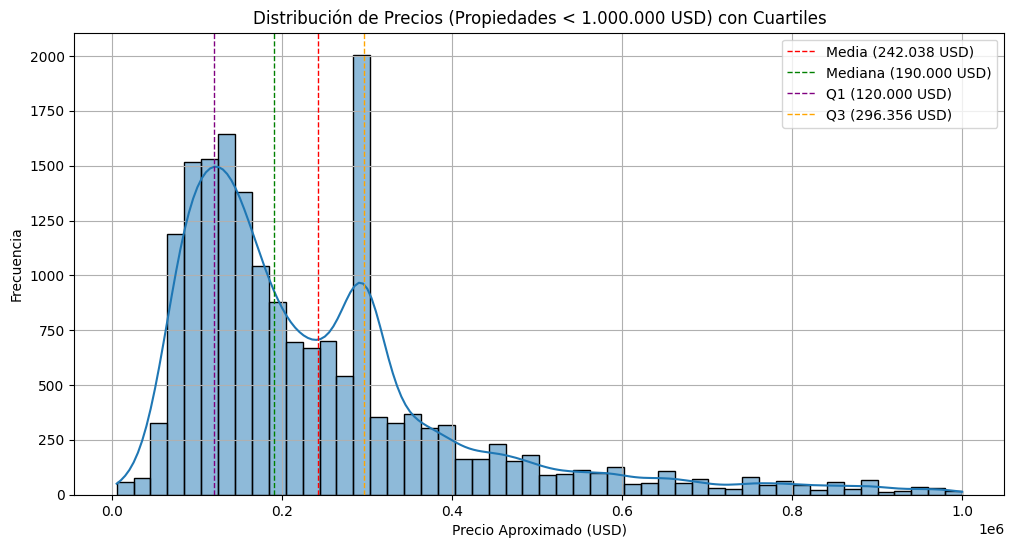

In [61]:
# Crear gráfico histograma para propiedades < 1M USD
plt.figure(figsize=(12, 6)) # Ajustar el tamaño de la figura para un histograma
sns.histplot(data=filtered_df_less_1M, x='price_aprox_usd', bins=50, kde=True) # Usar histplot para histograma

# colocar media y mediana en el gráfico (usando los valores calculados para <1M)
# Asegurarse de que q1_1M, q3_1M, mean_price_1M, y median_price_1M estén definidos
try:
    q1_1M, q3_1M, mean_price_1M, median_price_1M, filtered_df_less_1M
except NameError:
    print("Error: Algunas variables necesarias (q1_1M, q3_1M, mean_price_1M, median_price_1M, filtered_df_less_1M) no están definidas. Por favor, ejecuta las celdas de análisis del nicho principal (sección 6) primero.")
    raise # Detener ejecución si las variables no existen

plt.axvline(mean_price_1M, color='red', linestyle='dashed', linewidth=1, label=f'Media ({mean_price_1M:,.0f} USD)'.replace(',', '.')) # Usar axvline para líneas verticales
plt.axvline(median_price_1M, color='green', linestyle='dashed', linewidth=1, label=f'Mediana ({median_price_1M:,.0f} USD)'.replace(',', '.'))
plt.axvline(q1_1M, color='purple', linestyle='dashed', linewidth=1, label=f'Q1 ({q1_1M:,.0f} USD)'.replace(',', '.')) # Agregar línea para Q1
plt.axvline(q3_1M, color='orange', linestyle='dashed', linewidth=1, label=f'Q3 ({q3_1M:,.0f} USD)'.replace(',', '.')) # Agregar línea para Q3

plt.title('Distribución de Precios (Propiedades < 1.000.000 USD) con Cuartiles')
plt.xlabel('Precio Aproximado (USD)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True) # Agregar cuadrícula para mejor lectura
plt.show()



#### 9.3.5 OBSERVACIONES



**Distribución Sesgada**: El histograma muestra claramente una distribución sesgada hacia la derecha (sesgo positivo). La mayor concentración de propiedades se encuentra en los rangos de precios más bajos, y la frecuencia disminuye a medida que aumenta el precio. Esto es común en los datos de precios de bienes raíces, donde hay muchas propiedades a precios moderados y menos propiedades a precios muy altos.

**Relación Media vs. Mediana**: La media (línea roja) se encuentra a la derecha de la mediana (línea verde). En una distribución sesgada hacia la derecha, la media suele ser mayor que la mediana porque los valores más altos ("colas" a la derecha) tiran de la media en esa dirección. Esto confirma el sesgo observado.

**Concentración en el Nicho Principal**: Las líneas de Q1 (morada) y Q3 (naranja) delimitan el rango donde se encuentra el 50% central de las propiedades en este subconjunto (< 1M USD). Como se calculó anteriormente, este rango (aproximadamente 120.000 a 296.000 USD) contiene una gran parte de los datos, lo que visualmente se corresponde con la parte más alta y ancha del histograma, confirmando que este es el "nicho principal" en términos de concentración de propiedades.

**Outliers Visuales (a la derecha)**: Aunque este histograma se limita a propiedades menores a 1M USD, la "cola" extendida hacia la derecha dentro de este rango (y los valores atípicos que se identificaron previamente por encima de 562.500 USD, aunque no estén marcados en este gráfico específico) son evidentes. Esto muestra que incluso dentro del segmento de "menos de 1M", hay propiedades significativamente más caras que la mayoría.

### 9.4 Análisis del Nicho Principal (Propiedades entre Q1 y Q3 de < 1M USD)

Cantidad de propiedades con precio entre 120.000 y 296.356 USD (dentro del rango < 1M): 9781
Porcentaje de este nicho sobre el total del dataset: 51.72%

Distribución de Tipos de Propiedad en el Nicho Principal:


,count
property_type,
apartment,7659
PH,989
house,700
store,433


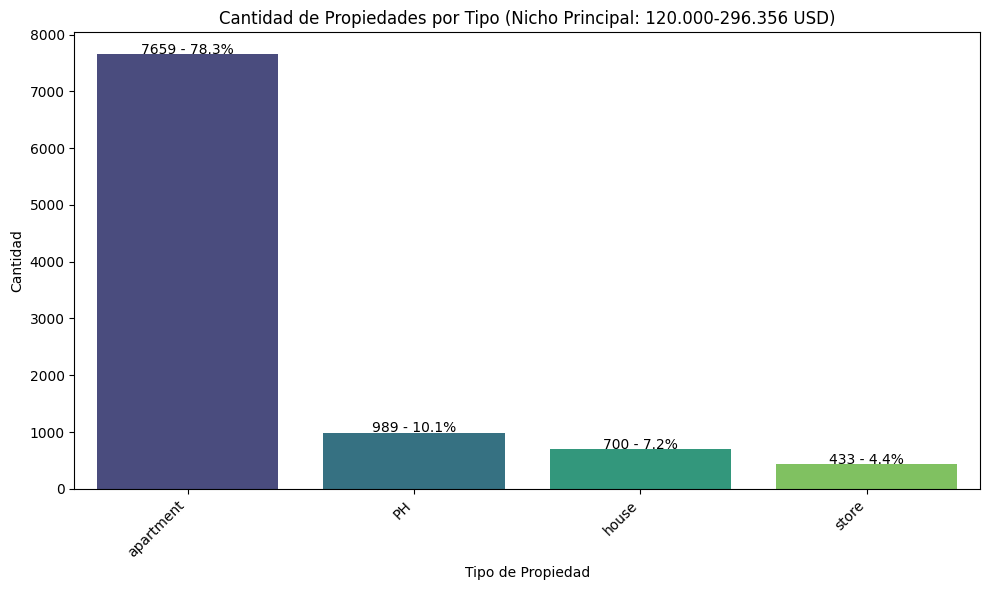

In [62]:
# Filtrar los precios entre Q1 y Q3 del subconjunto < 1M USD
# Usamos los valores de q1_1M y q3_1M calculados previamente
properties_between_q1_q3_1M = filtered_df_less_1M[(filtered_df_less_1M['price_aprox_usd'] >= q1_1M) & (filtered_df_less_1M['price_aprox_usd'] <= q3_1M)].copy()

print(f"Cantidad de propiedades con precio entre {q1_1M:,.0f} y {q3_1M:,.0f} USD (dentro del rango < 1M): {len(properties_between_q1_q3_1M)}".replace(',', '.'))
print(f"Porcentaje de este nicho sobre el total del dataset: {len(properties_between_q1_q3_1M) / len(df) * 100:.2f}%")

# Analizar tipo de propiedades en este nicho
property_type_counts_niche = properties_between_q1_q3_1M['property_type'].value_counts()
total_properties_niche = property_type_counts_niche.sum()

print("\nDistribución de Tipos de Propiedad en el Nicho Principal:")
display(property_type_counts_niche)

# Visualizar la distribución de tipos de propiedad en el nicho
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=property_type_counts_niche.index, y=property_type_counts_niche.values, hue=property_type_counts_niche.index, palette='viridis', legend=False)
plt.title(f'Cantidad de Propiedades por Tipo (Nicho Principal: {q1_1M:,.0f}-{q3_1M:,.0f} USD)'.replace(',', '.'))
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# agrega etiquetas a las barras con valor y porcentaje
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            f'{int(height)} - {height/total_properties_niche:.1%}',
            ha="center")
plt.show()



### 9.5 Análisis de Micro-ubicación dentro del Nicho Principal (Apartamentos)

Exploramos la distribución de sub-áreas o barrios dentro del nicho principal de apartamentos (precios entre ~120.000 y ~296.000 USD) utilizando la columna `place_with_parent_names`. Aunque esta columna contiene una jerarquía (Argentina|Capital Federal|Barrio|Sub-área), nos enfocaremos en los niveles más detallados disponibles para identificar posibles variaciones por micro-ubicación.

In [63]:
# Extraer el nivel más granular de la ubicación para el nicho principal
# Asumiendo que el último elemento después del último '|' es el nivel más granular
apartments_in_principal_niche['granular_location'] = apartments_in_principal_niche['place_with_parent_names'].apply(lambda x: x.split('|')[-1] if isinstance(x, str) and '|' in x else 'Desconocido')

# Mostrar la distribución de las ubicaciones granulares
print("Distribución de Ubicaciones Granulares dentro del Nicho Principal (Apartamentos):")
granular_location_counts = apartments_in_principal_niche['granular_location'].value_counts()
display(granular_location_counts.head(20)) # Mostrar las 20 ubicaciones más comunes

# Calcular el precio promedio por cada ubicación granular (para ubicaciones con suficientes datos)
# Considerar solo ubicaciones con un número mínimo de propiedades (ej. > 10) para que la media sea más representativa
min_properties_for_mean = 10
locations_to_analyze = granular_location_counts[granular_location_counts >= min_properties_for_mean].index

if not locations_to_analyze.empty:
    price_by_granular_location = apartments_in_principal_niche[
        apartments_in_principal_niche['granular_location'].isin(locations_to_analyze)
    ].groupby('granular_location')['price_aprox_usd'].mean().sort_values(ascending=False)

    print(f"\nPrecio Promedio por Ubicación Granular (más de {min_properties_for_mean} propiedades) en el Nicho Principal:")
    display(price_by_granular_location)

    # Opcionalmente, visualizar el precio promedio por ubicación granular (Top N)
    if len(price_by_granular_location) > 0:
        top_n_locations = 15 # Mostrar las Top 15 ubicaciones por precio promedio
else:
    print(f"\nNo hay ubicaciones granulares con más de {min_properties_for_mean} propiedades en el Nicho Principal para calcular el precio promedio.")



Distribución de Ubicaciones Granulares dentro del Nicho Principal (Apartamentos):


,count
granular_location,
,7659



Precio Promedio por Ubicación Granular (más de 10 propiedades) en el Nicho Principal:


,price_aprox_usd
granular_location,
,200703.238319


### 9.6 Análisis de Características Numéricas por Tipo de Propiedad en el Nicho Principal

Analizamos las estadísticas descriptivas de las características numéricas (`price_aprox_usd`, `surface_total_in_m2`, `surface_covered_in_m2`, `price_usd_per_m2`, `rooms`) para cada tipo de propiedad (`property_type`) dentro del nicho principal identificado (propiedades con precios entre Q1 y Q3 del subconjunto < 1M USD).

In [64]:
# Asegurarse de que 'properties_between_q1_q3_1M' esté definido.
# Este DataFrame se define en la celda 0e391e58 o en la celda consolidada 5283e1ad.
# Si no está definido, ejecutar la celda correspondiente primero.

# Seleccionar las columnas numéricas a analizar
numerical_features_niche_analysis = [
    'price_aprox_usd',
    'surface_total_in_m2',
    'surface_covered_in_m2',
    'price_usd_per_m2',
    'rooms',
]

# Filtrar el DataFrame principal para obtener solo las propiedades en el nicho
# Nota: properties_between_q1_q3_1M ya contiene este filtro
# Usaremos properties_between_q1_q3_1M si ya está definido, o filtraremos df si no
try:
    # Intenta usar el DataFrame del nicho si ya está definido
    df_niche = properties_between_q1_q3_1M.copy()
    print("Usando el DataFrame 'properties_between_q1_q3_1M' para el análisis del nicho.")
except NameError:
    # Si no está definido, filtramos el DataFrame original
    print("El DataFrame 'properties_between_q1_q3_1M' no está definido. Filtrando el DataFrame original 'df'.")
    # Asegurarse de que q1_1M y q3_1M estén definidos (provienen de la celda 6.1 d9ae441d)
    try:
        q1_1M, q3_1M
    except NameError:
        print("Error: q1_1M o q3_1M no están definidos. Por favor, ejecuta la celda 6.1 (d9ae441d) primero.")
        # Salir o manejar el error apropiadamente, por ahora solo imprimimos
        raise # Relanzar el error para detener la ejecución si q1/q3 no están definidos

    filtered_df_less_1M = df[df['price_aprox_usd'] < 1000000].copy()
    df_niche = filtered_df_less_1M[(filtered_df_less_1M['price_aprox_usd'] >= q1_1M) & (filtered_df_less_1M['price_aprox_usd'] <= q3_1M)].copy()
    print(f"Filtrado completado. {len(df_niche)} propiedades en el nicho.")

# Agrupar por tipo de propiedad y calcular estadísticas descriptivas para las columnas numéricas
niche_analysis_by_property_type = df_niche.groupby('property_type')[numerical_features_niche_analysis].describe()

print("\nEstadísticas Descriptivas de Características Numéricas por Tipo de Propiedad en el Nicho Principal:")
display(niche_analysis_by_property_type)



Usando el DataFrame 'properties_between_q1_q3_1M' para el análisis del nicho.

Estadísticas Descriptivas de Características Numéricas por Tipo de Propiedad en el Nicho Principal:


price_aprox_usd                                         \
                        count           mean           std       min   
property_type                                                          
PH                      989.0  201773.463673  58735.690333  120000.0   
apartment              7659.0  200703.238319  60059.543470  120000.0   
house                   700.0  238330.490359  54514.335129  120000.0   
store                   433.0  232304.272647  63268.119102  120000.0   

                                                                   \
                      25%       50%            75%            max   
property_type                                                       
PH             150000.000  190000.0  250000.000000  296355.854625   
apartment      146367.915  185481.4  255000.000000  296355.854625   
house          197750.000  250000.0  296355.854625  296355.854625   
store          173204.270  250000.0  296355.854625  296355.854625   

              surface_total_in_m2              ... price_usd_per_m2  \
                            count        mean  ...              75%   
property_type                                  ...                    
PH                          989.0  127.319647  ...      2598.000000   
apartment                  7659.0   93.861582  ...      3056.349206   
house                       700.0  468.561988  ...      2760.408525   
store                       433.0  160.961983  ...      2760.408525   

                              rooms                                     \
                        max   count      mean       std  min       25%   
property_type                                                            
PH              4378.378378   989.0  3.499880  1.128016  1.0  3.000000   
apartment      24200.000000  7659.0  2.773268  0.974836  1.0  2.000000   
house          10625.000000   700.0  3.458369  1.312077  1.0  3.033661   
store          23333.333333   433.0  2.978134  0.534132  1.0  3.033661   

                                         
                    50%       75%   max  
property_type                            
PH             3.033661  4.000000  15.0  
apartment      3.000000  3.033661  13.0  
house          3.033661  4.000000  16.0  
store          3.033661  3.033661   7.0  

[4 rows x 40 columns]

### 9.7 Conclusión del Nicho Principal:



**El análisis estadístico de precios revela un hallazgo clave: el segmento mayoritario del mercado en este conjunto de datos se sitúa por debajo del umbral de 1.000.000 USD. Particularmente, el** ***nicho principal de mercado*** **se concentra en el rango de precios entre el** ***Primer Cuartil (Q1)*** **y el** ***Tercer Cuartil (Q3)*** **(entre aproximadamente 120.000 y 296.000 USD), abarcando la proporción más significativa de las propiedades (aproximadamente el 51.75% del total del dataset). Dentro de este nicho, los ***departamentos*** constituyen el tipo de propiedad predominante. La identificación de este segmento es fundamental para orientar estrategias comerciales y análisis más específicos.**

### 9.8 Análisis de Correlación Específico del Nicho Principal

Se profundiza en el análisis de las relaciones entre las variables clave dentro del nicho principal identificado (departamentos con precios entre ~120.000 y ~296.000 USD).

In [65]:
# Definir el DataFrame para el nicho principal (apartamentos entre Q1 y Q3 de < 1M USD)
# apartments_niche_principal = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == 'apartment'].copy()
# Nota: Ya tenemos 'properties_between_q1_q3_1M' que representa el nicho principal identificado, que incluye otros tipos además de apartamentos.
# Si queremos analizar solo apartamentos en este rango, filtramos adicionalmente:
apartments_in_principal_niche = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == 'apartment'].copy()

# Calcular coeficientes de correlación para superficies en el nicho de apartamentos
correlation_matrix_niche_surfaces = apartments_in_principal_niche[['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2']].corr()

print("Coeficientes de correlación para apartamentos en el Nicho Principal (Precio vs Superficies):")
display(correlation_matrix_niche_surfaces)

# Calcular coeficiente de correlación para habitaciones en el nicho de apartamentos
correlation_price_rooms_niche_apartments = apartments_in_principal_niche['price_aprox_usd'].corr(apartments_in_principal_niche['rooms'])
print(f"\nCoeficiente de correlación entre Precio Total y Número de Habitaciones (Apartamentos en el Nicho Principal): {correlation_price_rooms_niche_apartments:.4f}")

# Calcular coeficiente de correlación entre superficies en el nicho de apartamentos
correlation_surfaces_niche_apartments = apartments_in_principal_niche['surface_total_in_m2'].corr(apartments_in_principal_niche['surface_covered_in_m2'])
print(f"\nCoeficiente de correlación entre Superficie Total y Superficie Cubierta (Apartamentos en el Nicho Principal): {correlation_surfaces_niche_apartments:.4f}")



Coeficientes de correlación para apartamentos en el Nicho Principal (Precio vs Superficies):


,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2
price_aprox_usd,1.000000,0.104505,0.088872
surface_total_in_m2,0.104505,1.000000,0.846927
surface_covered_in_m2,0.088872,0.846927,1.000000



Coeficiente de correlación entre Precio Total y Número de Habitaciones (Apartamentos en el Nicho Principal): 0.3233

Coeficiente de correlación entre Superficie Total y Superficie Cubierta (Apartamentos en el Nicho Principal): 0.8469


El análisis estadístico de los precios revela que la gran mayoría de las propiedades en este dataset tienen un precio inferior a 1.000.000 USD. Dentro de este segmento, el rango de precios entre el primer y tercer cuartil (aproximadamente 120.000 a 296.000 USD) representa el **nicho principal de mercado**, concentrando la mayoría de los registros (aproximadamente el 51.75% del total del dataset). La distribución de tipos de propiedad dentro de este nicho principal muestra un claro predominio de los departamentos. Este segmento es clave para enfocar estrategias comerciales y análisis más detallados.

### 9.9 Visualización de Relaciones en el Nicho Principal

#### 9.9.1 Tipo de Propiedad: apartment

DataFrame 'df_envolvente' no encontrado. Creándolo...
Variable 'just_above_1M_limit' no definida. Definiéndola ahora.
DataFrame 'df_envolvente' creado con 5067 propiedades.
Variables de trazado no definidas. Definiéndolas ahora.

Análisis para Tipo de Propiedad: apartment


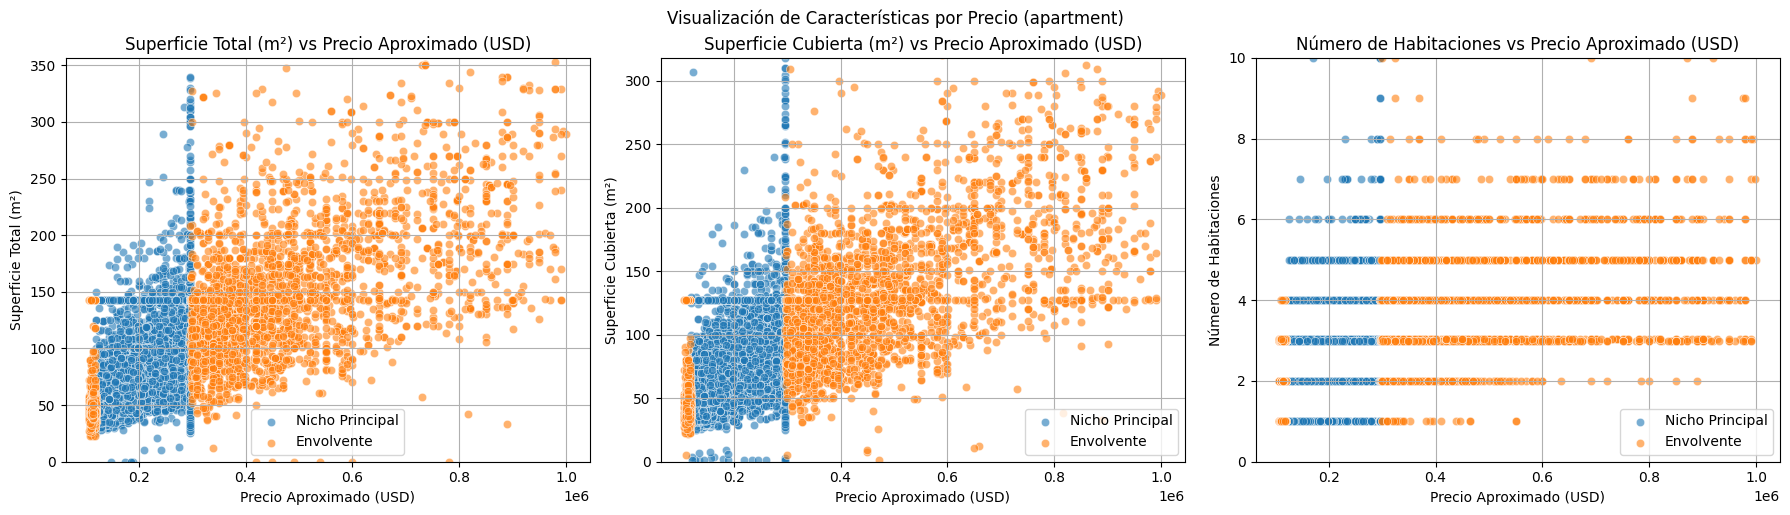

In [66]:
# Asegurarse de que las variables necesarias estén definidas
# df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
try:
    df, properties_between_q1_q3_1M
except NameError:
    print("Error: El DataFrame 'df' o 'properties_between_q1_q3_1M' no están definidos. Por favor, ejecuta las celdas anteriores.")
    raise # Detener ejecución si los DataFrames no existen

# Definir el DataFrame 'envolvente' si aún no está definido
try:
    df_envolvente
except NameError:
    print("DataFrame 'df_envolvente' no encontrado. Creándolo...")
    # Necesito q1_1M y q3_1M, los cuales deberían definirse antes
    try:
        q1_1M, q3_1M
    except NameError:
        print("Error: q1_1M o q3_1M no definidos. Por favor, ejecuta las celdas anteriores.")
        raise # Detener ejecución si q1/q3 no están definidos

    # Necesito just_above_1M_limit, que debería definirse en celdas anteriores
    try:
        just_above_1M_limit
    except NameError:
        print("Variable 'just_above_1M_limit' no definida. Definiéndola ahora.")
        just_above_1M_limit = 1000000 # Suponiendo que el límite sea de 1 millón de USD

    # Definir los rangos de precios 'envolvente'
    buffer_percentage = 0.10
    lower_envolvente_lower_limit = q1_1M * (1 - buffer_percentage) # 10% por debajo del Q1
    min_price_overall = df['price_aprox_usd'].min() # Suponiendo que df esté disponible
    lower_envolvente_analysis_min_price = max(min_price_overall, lower_envolvente_lower_limit)

    # Filtro para el rango de envolvente inferior
    df_lower_envolvente = df[(df['price_aprox_usd'] >= lower_envolvente_analysis_min_price) & (df['price_aprox_usd'] < q1_1M)].copy()

    # Filtro para el rango superior envolvente
    df_upper_envolvente = df[(df['price_aprox_usd'] > q3_1M) & (df['price_aprox_usd'] < just_above_1M_limit)].copy()

    # Combine the two DataFrames
    df_envolvente = pd.concat([df_lower_envolvente, df_upper_envolvente])
    print(f"DataFrame 'df_envolvente' creado con {len(df_envolvente)} propiedades.")

# Definir las variables utilizadas para graficar si no están definidas
try:
    numerical_cols_to_plot_y, y_labels, x_label
except NameError:
    print("Variables de trazado no definidas. Definiéndolas ahora.")
    numerical_cols_to_plot_y = ['surface_total_in_m2', 'surface_covered_in_m2', 'rooms']
    y_labels = ['Superficie Total (m²)', 'Superficie Cubierta (m²)', 'Número de Habitaciones']
    x_label = 'Precio Aproximado (USD)'

prop_type = 'apartment'
print(f"\nAnálisis para Tipo de Propiedad: {prop_type}")

# Filtrar dataframes por tipo de propiedad
niche_prop_type_df = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == prop_type]
envolvente_prop_type_df = df_envolvente[df_envolvente['property_type'] == prop_type]

# Omitir si ambos dataframes están vacíos para este tipo de propiedad
if niche_prop_type_df.empty and envolvente_prop_type_df.empty:
    print(f"  No hay datos para el tipo de propiedad '{prop_type}' en el nicho ni la envolvente.")
else:
    # Crear subgráficas para las tres columnas numéricas en dos columnas
    fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 fila, 3 columnas

    for i, col in enumerate(numerical_cols_to_plot_y):
        ax = axes[i] # Seleccionar el eje del subgráfico actual

        # Graficar datos del Nicho Principal
        if not niche_prop_type_df.empty:
            sns.scatterplot(data=niche_prop_type_df, x='price_aprox_usd', y=col, label='Nicho Principal', alpha=0.6, ax=ax)

        # Datos de Envolvente de Gráfico
        if not envolvente_prop_type_df.empty:
            sns.scatterplot(data=envolvente_prop_type_df, x='price_aprox_usd', y=col, label='Envolvente', alpha=0.6, ax=ax)

        ax.set_title(f'{y_labels[i]} vs {x_label}')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_labels[i])

        # --- Mejora para la distribución del eje Y ---
        # Calcular un límite superior razonable para el eje Y para visualizar mejor la distribución
        # Usar el percentil 99 para las áreas de superficie y un límite fijo para las habitaciones
        if col in ['surface_total_in_m2', 'surface_covered_in_m2']:
            # Combinar datos tanto de nicho como de envolvente para el cálculo de percentiles
            combined_data = pd.concat([niche_prop_type_df[col], envolvente_prop_type_df[col]]).dropna()
            if not combined_data.empty:
                 y_upper_limit = combined_data.quantile(0.99) * 1.1 # Agregar un pequeño búfer
                 ax.set_ylim(0, y_upper_limit) # Establecer el límite del eje Y desde 0 hasta el límite calculado
            else:
                 ax.set_ylim(0, None) # Sin datos, establecer límite predeterminado

        elif col == 'rooms':
            # Establecer un límite superior fijo para las habitaciones, ya que los recuentos de habitaciones extremos son valores atípicos
            ax.set_ylim(0, 10) # Suponiendo que las propiedades en estos segmentos normalmente no excedan las 10 habitaciones

       # --- Fin de la mejora para la distribución del eje Y ---

        ax.legend()
        ax.grid(True)

    plt.tight_layout() # Ajustar el diseño para evitar que los títulos/etiquetas se superpongan
    plt.suptitle(f'Visualización de Características por Precio ({prop_type})', y=1.02) # Agregar un título principal para el conjunto de subgráficos
    plt.show()



#### 9.9.2 Tipo de Propiedad: house


Análisis para Tipo de Propiedad: house


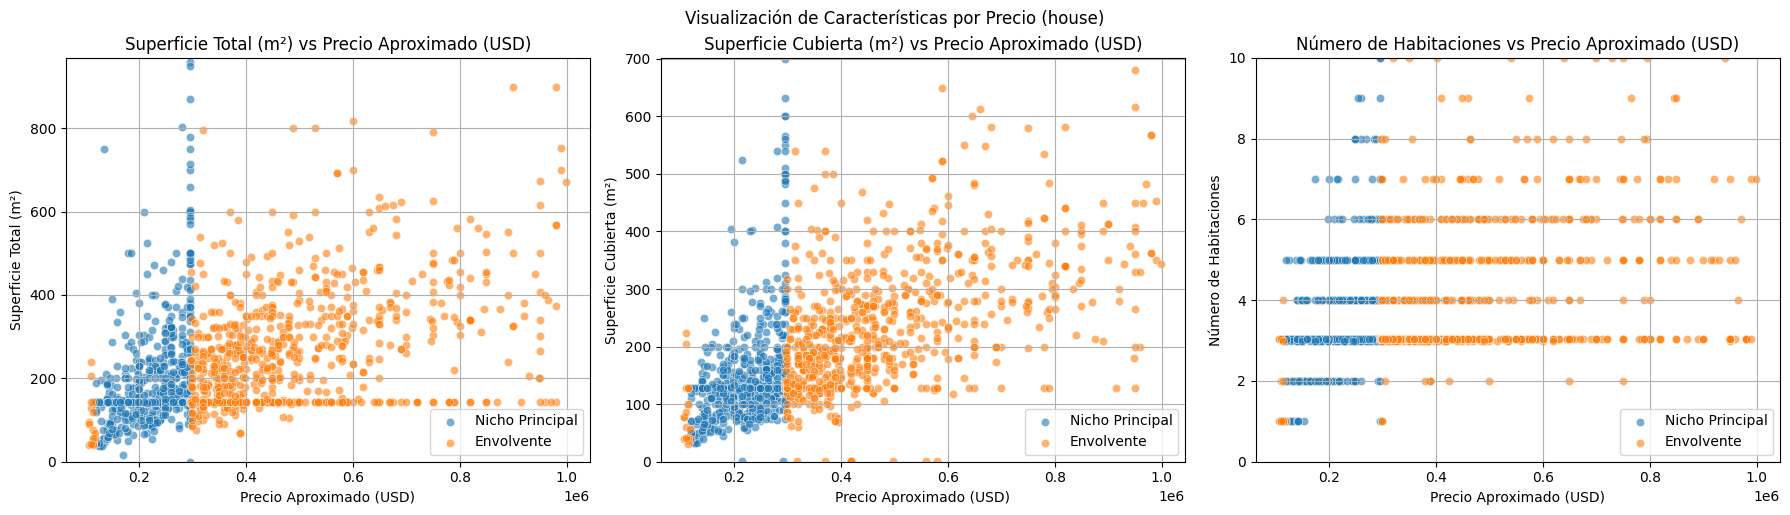

In [67]:
# Asegurarse de que las variables necesarias estén definidas
# df, propiedades_entre_q1_q3_1M, df_envolvente, columnas_numéricas_para_graficar_y, etiquetas_y, etiqueta_x
try:
    df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
except NameError:
    print("Error: Algunas variables necesarias no están definidas. Por favor, ejecuta las celdas anteriores.")
    # Definir variables de marcador de posición o generar un error si es necesario
    # Por ahora, supongamos que están definidos a partir de una ejecución anterior

prop_type = 'house'
print(f"\nAnálisis para Tipo de Propiedad: {prop_type}")

# Filtrar dataframes por tipo de propiedad
niche_prop_type_df = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == prop_type]
envolvente_prop_type_df = df_envolvente[df_envolvente['property_type'] == prop_type]

# Omitir si ambos dataframes están vacíos para este tipo de propiedad
if niche_prop_type_df.empty and envolvente_prop_type_df.empty:
    print(f"  No hay datos para el tipo de propiedad '{prop_type}' en el nicho ni la envolvente.")
else:
    # Crear subgráficas para las tres columnas numéricas en dos columnas
    fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 fila, 3 columnas

    for i, col in enumerate(numerical_cols_to_plot_y):
        ax = axes[i] # Seleccionar el eje del subgráfico actual

        # Graficar datos del Nicho Principal
        if not niche_prop_type_df.empty:
            sns.scatterplot(data=niche_prop_type_df, x='price_aprox_usd', y=col, label='Nicho Principal', alpha=0.6, ax=ax)

        # Datos de Envolvente de Gráfico
        if not envolvente_prop_type_df.empty:
            sns.scatterplot(data=envolvente_prop_type_df, x='price_aprox_usd', y=col, label='Envolvente', alpha=0.6, ax=ax)

        ax.set_title(f'{y_labels[i]} vs {x_label}')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_labels[i])

        # --- Mejora para la distribución del eje Y ---
        # Calcular un límite superior razonable para el eje Y para visualizar mejor la distribución
        # Usar el percentil 99 para las áreas de superficie y un límite fijo para las habitaciones
        if col in ['surface_total_in_m2', 'surface_covered_in_m2']:
            # Combinar datos tanto de nicho como de envolvente para el cálculo de percentiles
            combined_data = pd.concat([niche_prop_type_df[col], envolvente_prop_type_df[col]]).dropna()
            if not combined_data.empty:
                 y_upper_limit = combined_data.quantile(0.99) * 1.1 # Agregar un pequeño búfer
                 ax.set_ylim(0, y_upper_limit) # Establecer el límite del eje Y desde 0 hasta el límite calculado
            else:
                 ax.set_ylim(0, None) # Sin datos, establecer límite predeterminado

        elif col == 'rooms':
            # Establecer un límite superior fijo para las habitaciones, ya que los recuentos de habitaciones extremos son valores atípicos
            ax.set_ylim(0, 10) # Suponiendo que las propiedades en estos segmentos normalmente no excedan las 10 habitaciones

       # --- Fin de la mejora para la distribución del eje Y ---

        ax.legend()
        ax.grid(True)

    plt.tight_layout() # Ajustar el diseño para evitar que los títulos/etiquetas se superpongan
    plt.suptitle(f'Visualización de Características por Precio ({prop_type})', y=1.02) # Agregar un título principal para el conjunto de subgráficos
    plt.show()



#### 9.9.3 Tipo de Propiedad: store


Análisis para Tipo de Propiedad: store


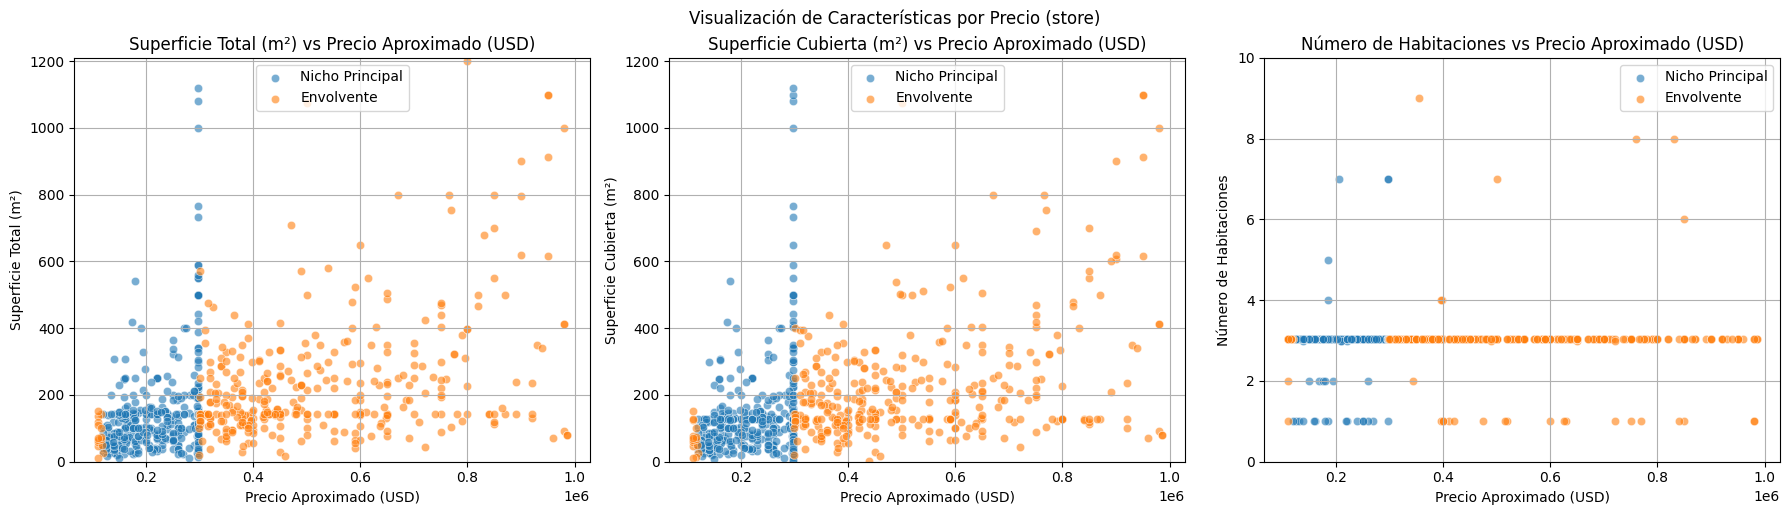

In [68]:
# Asegurarse de que las variables necesarias estén definidas
# df, propiedades_entre_q1_q3_1M, df_envolvente, columnas_numéricas_para_graficar_y, etiquetas_y, etiqueta_x
try:
    df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
except NameError:
    print("Error: Algunas variables necesarias no están definidas. Por favor, ejecuta las celdas anteriores.")
    # Definir variables de marcador de posición o generar un error si es necesario
    # Por ahora, supongamos que están definidos a partir de una ejecución anterior

prop_type = 'store'
print(f"\nAnálisis para Tipo de Propiedad: {prop_type}")

# Filtrar dataframes por tipo de propiedad
niche_prop_type_df = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == prop_type]
envolvente_prop_type_df = df_envolvente[df_envolvente['property_type'] == prop_type]

# Omitir si ambos dataframes están vacíos para este tipo de propiedad
if niche_prop_type_df.empty and envolvente_prop_type_df.empty:
    print(f"  No hay datos para el tipo de propiedad '{prop_type}' en el nicho ni la envolvente.")
else:
    # Crear subgráficas para las tres columnas numéricas en dos columnas
    fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 fila, 3 columnas

    for i, col in enumerate(numerical_cols_to_plot_y):
        ax = axes[i] # Seleccionar el eje del subgráfico actual

        # Graficar datos del Nicho Principal
        if not niche_prop_type_df.empty:
            sns.scatterplot(data=niche_prop_type_df, x='price_aprox_usd', y=col, label='Nicho Principal', alpha=0.6, ax=ax)

        # Datos de Envolvente de Gráfico
        if not envolvente_prop_type_df.empty:
            sns.scatterplot(data=envolvente_prop_type_df, x='price_aprox_usd', y=col, label='Envolvente', alpha=0.6, ax=ax)

        ax.set_title(f'{y_labels[i]} vs {x_label}')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_labels[i])

        # --- Mejora para la distribución del eje Y ---
        # Calcular un límite superior razonable para el eje Y para visualizar mejor la distribución
        # Usar el percentil 99 para las áreas de superficie y un límite fijo para las habitaciones
        if col in ['surface_total_in_m2', 'surface_covered_in_m2']:
            # Combinar datos tanto de nicho como de envolvente para el cálculo de percentiles
            combined_data = pd.concat([niche_prop_type_df[col], envolvente_prop_type_df[col]]).dropna()
            if not combined_data.empty:
                 y_upper_limit = combined_data.quantile(0.99) * 1.1 # Agregar un pequeño búfer
                 ax.set_ylim(0, y_upper_limit) # Establecer el límite del eje Y desde 0 hasta el límite calculado
            else:
                 ax.set_ylim(0, None) # Sin datos, establecer límite predeterminado

        elif col == 'rooms':
            # Establecer un límite superior fijo para las habitaciones, ya que los recuentos de habitaciones extremos son valores atípicos
            ax.set_ylim(0, 10) # Suponiendo que las propiedades en estos segmentos normalmente no excedan las 10 habitaciones

       # --- Fin de la mejora para la distribución del eje Y ---

        ax.legend()
        ax.grid(True)

    plt.tight_layout() # Ajustar el diseño para evitar que los títulos/etiquetas se superpongan
    plt.suptitle(f'Visualización de Características por Precio ({prop_type})', y=1.02) # Agregar un título principal para el conjunto de subgráficos
    plt.show()



#### 9.9.4 Tipo de Propiedad: PH


Análisis para Tipo de Propiedad: PH


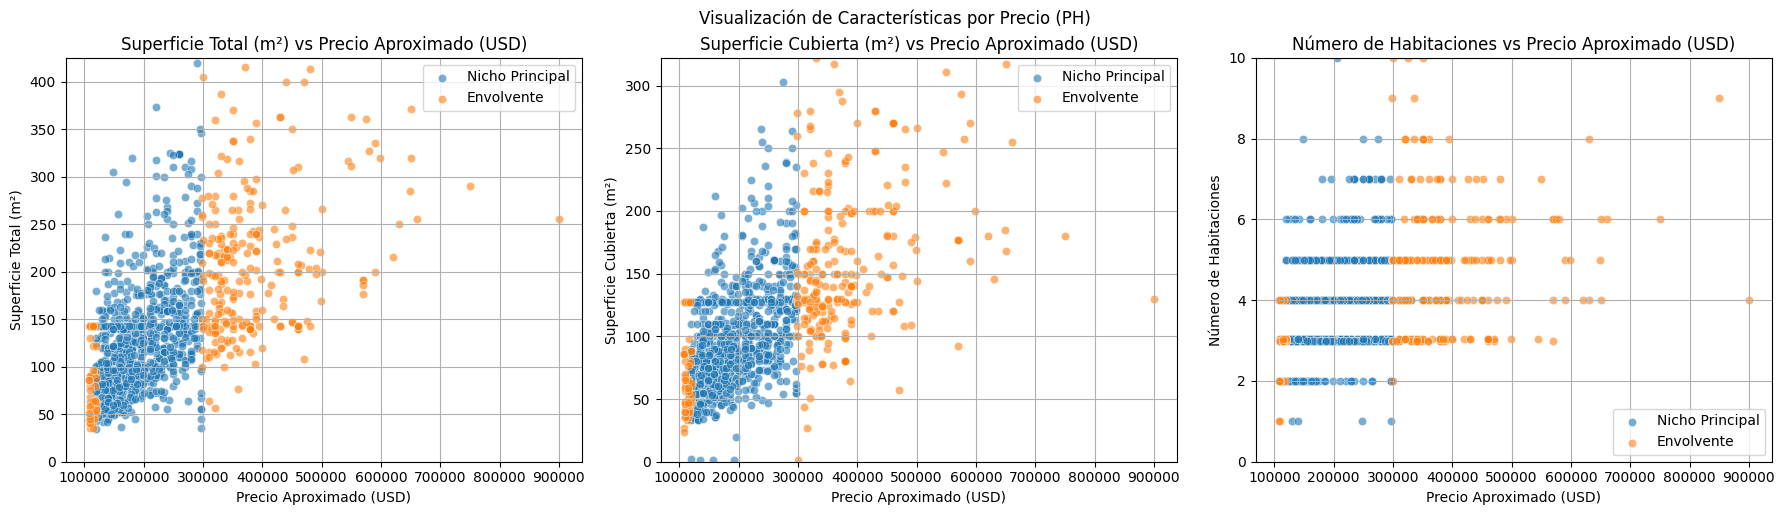

In [69]:
# Asegurarse de que las variables necesarias estén definidas
# df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
try:
    df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
except NameError:
    print("Error: Algunas variables necesarias no están definidas. Por favor, ejecuta las celdas anteriores.")
    # Define placeholder variables or raise an error if needed
    # For now, let's assume they are defined from previous execution

prop_type = 'PH'
print(f"\nAnálisis para Tipo de Propiedad: {prop_type}")

# Filtrar dataframes por tipo de propiedad
niche_prop_type_df = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == prop_type]
envolvente_prop_type_df = df_envolvente[df_envolvente['property_type'] == prop_type]

# Omitir si ambos dataframes están vacíos para este tipo de propiedad
if niche_prop_type_df.empty and envolvente_prop_type_df.empty:
    print(f"  No hay datos para el tipo de propiedad '{prop_type}' en el nicho ni la envolvente.")
else:
    # Crear subgráficas para las tres columnas numéricas en dos columnas
    fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 fila, 3 columnas

    for i, col in enumerate(numerical_cols_to_plot_y):
        ax = axes[i] # Seleccionar el eje del subgráfico actual

        # Graficar datos del Nicho Principal
        if not niche_prop_type_df.empty:
            sns.scatterplot(data=niche_prop_type_df, x='price_aprox_usd', y=col, label='Nicho Principal', alpha=0.6, ax=ax)

        # Datos de Envolvente de Gráfico
        if not envolvente_prop_type_df.empty:
            sns.scatterplot(data=envolvente_prop_type_df, x='price_aprox_usd', y=col, label='Envolvente', alpha=0.6, ax=ax)

        ax.set_title(f'{y_labels[i]} vs {x_label}')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_labels[i])

        # --- Mejora para la distribución del eje Y ---
        # Calcular un límite superior razonable para el eje Y para visualizar mejor la distribución
        # Usar el percentil 99 para las áreas de superficie y un límite fijo para las habitaciones
        if col in ['surface_total_in_m2', 'surface_covered_in_m2']:
            # Combinar datos tanto de nicho como de envolvente para el cálculo de percentiles
            combined_data = pd.concat([niche_prop_type_df[col], envolvente_prop_type_df[col]]).dropna()
            if not combined_data.empty:
                 y_upper_limit = combined_data.quantile(0.99) * 1.1 # Agregar un pequeño búfer
                 ax.set_ylim(0, y_upper_limit) # Establecer el límite del eje Y desde 0 hasta el límite calculado
            else:
                 ax.set_ylim(0, None) # Sin datos, establecer límite predeterminado

        elif col == 'rooms':
            # Establecer un límite superior fijo para las habitaciones, ya que los recuentos de habitaciones extremos son valores atípicos
            ax.set_ylim(0, 10) # Suponiendo que las propiedades en estos segmentos normalmente no excedan las 10 habitaciones

       # --- Fin de la mejora para la distribución del eje Y ---

        ax.legend()
        ax.grid(True)

    plt.tight_layout() # Ajustar el diseño para evitar que los títulos/etiquetas se superpongan
    plt.suptitle(f'Visualización de Características por Precio ({prop_type})', y=1.02) # Agregar un título principal para el conjunto de subgráficos
    plt.show()



### 9.10 Conclusión del Análisis del Nicho Principal:

**El análisis de correlación y las visualizaciones dentro del nicho principal (apartamentos entre ~120.000 y ~296.000 USD) muestran que las superficies (total y cubierta) tienen una correlación muy débil con el precio. La cantidad de habitaciones presenta una correlación débil a moderada. Esto sugiere que, si bien hay una ligera tendencia a que los apartamentos más grandes o con más habitaciones sean un poco más caros en este rango, otros factores no incluidos en este análisis (ubicación exacta, estado, antigüedad, etc.) probablemente tienen una influencia mucho mayor en la determinación del precio en este segmento.**

### 9.11 Análisis de Relación entre Precios y Superficies por Tipo de Propiedad

Se examina la relación entre precios por m2 y superficies (cubierta y total), tomando la media del precio promedio por m² por tipo de propiedad.

Precio promedio por m² (Cubierta vs Total) por Tipo de Propiedad:


,property_type,price_usd_per_m2_covered,price_usd_per_m2_total
0,PH,2840.114422,1793.464539
1,apartment,3426.915481,2820.243688
2,house,4752.102236,2013.512985
3,store,3476.687087,3006.147328


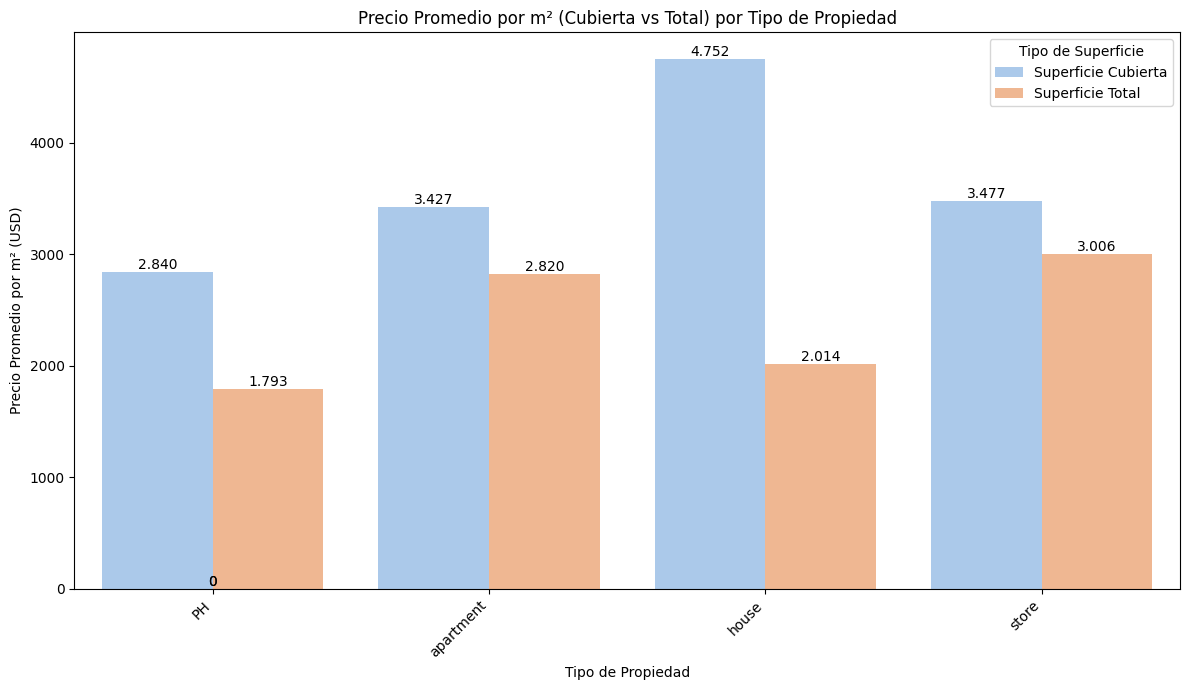

In [70]:
# Calcular el precio promedio por m2 para superficie cubierta y total por tipo de propiedad
# Manejar casos donde la superficie sea cero para evitar división por cero
df_cleaned_price_per_m2 = df.copy()
df_cleaned_price_per_m2['price_usd_per_m2_covered'] = df_cleaned_price_per_m2.apply(
    lambda row: row['price_aprox_usd'] / row['surface_covered_in_m2'] if row['surface_covered_in_m2'] > 0 else None, axis=1
)
df_cleaned_price_per_m2['price_usd_per_m2_total'] = df_cleaned_price_per_m2.apply(
    lambda row: row['price_aprox_usd'] / row['surface_total_in_m2'] if row['surface_total_in_m2'] > 0 else None, axis=1
)

# calcular la media del precio por m2 para superficie cubierta y total por tipo de propiedad
price_per_m2_summary = df_cleaned_price_per_m2.groupby('property_type')[['price_usd_per_m2_covered', 'price_usd_per_m2_total']].mean().reset_index()

# 'derretir' los datos para el gráfico de barras agrupadas
price_per_m2_melted = price_per_m2_summary.melt(
    id_vars='property_type',
    value_vars=['price_usd_per_m2_covered', 'price_usd_per_m2_total'],
    var_name='surface_type',
    value_name='mean_price_usd_per_m2'
)

# mapear nombres de superficie para mejor visualización
price_per_m2_melted['surface_type'] = price_per_m2_melted['surface_type'].replace({
    'price_usd_per_m2_covered': 'Superficie Cubierta',
    'price_usd_per_m2_total': 'Superficie Total'
})

print("Precio promedio por m² (Cubierta vs Total) por Tipo de Propiedad:")
display(price_per_m2_summary)

# crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='property_type', y='mean_price_usd_per_m2', hue='surface_type', data=price_per_m2_melted, palette='pastel')
plt.title('Precio Promedio por m² (Cubierta vs Total) por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio Promedio por m² (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Superficie')
plt.tight_layout()

# agregar etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}'.replace(',', '.'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

plt.show()



#### 9.11.1 Conclusión de Relaciones entre Precios y Superficies por Tipo de Propiedad:

**El análisis del precio promedio por m² por tipo de propiedad revela diferencias significativas. Generalmente, el precio por m² cubierto es mayor que el precio por m² total, lo cual es esperable. La comparación entre tipos de propiedad muestra variaciones en el valor por m², lo que puede indicar diferencias en la demanda, costos de construcción o características típicas de cada tipo en esta ubicación. Es importante notar que el cálculo del precio por m² original (`price_usd_per_m2`) en el dataset podría tener inconsistencias, por lo que calcularlo a partir del precio total y las superficies (cubierta y total) proporciona una métrica más confiable.**

### 9.12 Visualización Geoespacial

Utilizamos las coordenadas geográficas (latitud y longitud) para visualizar las propiedades en un mapa interactivo, destacando la ubicación del nicho principal de mercado y los valores atípicos de alto precio.

In [71]:
# @title
import folium
from folium.plugins import MarkerCluster

# Asegurarse de que los DataFrames necesarios estén definidos:
# df (DataFrame completo)
# price_outliers_df (Outliers de precio)
# properties_between_q1_q3_1M (Nicho principal)

# Verificar si los DataFrames existen, si no, intentar crearlos (requiere df, q1_1M, q3_1M, filtered_df_less_1M)
try:
    price_outliers_df
except NameError:
    print("DataFrame 'price_outliers_df' no encontrado. Creándolo...")
    # Recalcular si es necesario (requiere df)
    try:
        df
    except NameError:
        print("Error: DataFrame 'df' no encontrado.")
        raise # Detener ejecución si df no existe

    # Recalcular Q3 y IQR para price_aprox_usd si no están definidos
    try:
        Q3_price, IQR_price
    except NameError:
        print("Q3_price o IQR_price no definidos. Calculándolos...")
        Q1_price = df['price_aprox_usd'].quantile(0.25)
        Q3_price = df['price_aprox_usd'].quantile(0.75)
        IQR_price = Q3_price - Q1_price

    upper_bound_price = Q3_price + 1.5 * IQR_price
    price_outliers_df = df[df['price_aprox_usd'] > upper_bound_price].copy()
    print(f"Creado 'price_outliers_df' con {len(price_outliers_df)} propiedades.")

try:
    properties_between_q1_q3_1M
except NameError:
    print("DataFrame 'properties_between_q1_q3_1M' no encontrado. Creándolo...")
    # Recalcular si es necesario (requiere df, q1_1M, q3_1M, filtered_df_less_1M)
    try:
        df
    except NameError:
        print("Error: DataFrame 'df' no encontrado.")
        raise

    try:
        q1_1M, q3_1M
    except NameError:
         print("q1_1M o q3_1M no definidos. Calculándolos (requiere filtered_df_less_1M)...")
         try:
             filtered_df_less_1M
         except NameError:
             print("DataFrame 'filtered_df_less_1M' no encontrado. Creándolo (requiere df)...")
             filtered_df_less_1M = df[df['price_aprox_usd'] < 1000000].copy()

         q1_1M = filtered_df_less_1M['price_aprox_usd'].quantile(0.25)
         q3_1M = filtered_df_less_1M['price_aprox_usd'].quantile(0.75)

    properties_between_q1_q3_1M = filtered_df_less_1M[(filtered_df_less_1M['price_aprox_usd'] >= q1_1M) & (filtered_df_less_1M['price_aprox_usd'] <= q3_1M)].copy()
    print(f"Creado 'properties_between_q1_q3_1M' con {len(properties_between_q1_q3_1M)} propiedades.")

# Crear un mapa base centrado en la media de lat/lon del dataset
map_center = [df['lat'].mean(), df['lon'].mean()]
properati_map = folium.Map(location=map_center, zoom_start=12)

# Crear capas de marcadores
mc_all = MarkerCluster(name='Todas las Propiedades').add_to(properati_map)
mc_niche = MarkerCluster(name='Nicho Principal').add_to(properati_map)
mc_outliers = MarkerCluster(name='Outliers de Precio').add_to(properati_map)

# Añadir marcadores para todas las propiedades (capa base)
for idx, row in df.iterrows():
    if pd.notnull(row['lat']) and pd.notnull(row['lon']):
        popup_text = f"Tipo: {row['property_type']}<br>Precio: {row['price_aprox_usd']:,.0f} USD<br>Superficie Total: {row['surface_total_in_m2']:,.0f} m²"
        folium.Marker([row['lat'], row['lon']], popup=popup_text).add_to(mc_all)

# Añadir marcadores para propiedades del nicho principal (capa específica)
for idx, row in properties_between_q1_q3_1M.iterrows():
     if pd.notnull(row['lat']) and pd.notnull(row['lon']):
        popup_text = f"Tipo: {row['property_type']}<br>Precio: {row['price_aprox_usd']:,.0f} USD<br>Superficie Total: {row['surface_total_in_m2']:,.0f} m²"
        folium.Marker([row['lat'], row['lon']], popup=popup_text, icon=folium.Icon(color='green')).add_to(mc_niche)

# Añadir marcadores para outliers de precio (capa específica)
for idx, row in price_outliers_df.iterrows():
     if pd.notnull(row['lat']) and pd.notnull(row['lon']):
        popup_text = f"Tipo: {row['property_type']}<br>Precio: {row['price_aprox_usd']:,.0f} USD<br>Superficie Total: {row['surface_total_in_m2']:,.0f} m²"
        folium.Marker([row['lat'], row['lon']], popup=popup_text, icon=folium.Icon(color='red')).add_to(mc_outliers)

# Añadir control de capas al mapa
folium.LayerControl().add_to(properati_map)

# Mostrar el mapa
print("Mapa de Propiedades:")
display(properati_map)



Output hidden; open in https://colab.research.google.com to view.

### 9.13 Análisis de Precios por Ubicación Geográfica (análisis por comunas)

Investigamos cómo el precio de las propiedades y el precio por metro cuadrado varían en función de su ubicación geográfica, utilizando la información de la columna `place_with_parent_names`. Analizaremos diferentes niveles de granularidad de la ubicación para identificar patrones de precio a nivel de ciudad, barrio o sub-área.

In [72]:
# Función para extraer un nivel específico de la jerarquía de ubicación
def extract_location_level(place_string, level):
    if isinstance(place_string, str):
        parts = [part for part in place_string.split('|') if part]
        if len(parts) > level:
            return parts[level]
    return 'Desconocido'

# Extraer diferentes niveles de ubicación
# Nivel 0: País (Argentina)
# Nivel 1: Provincia/Estado (Capital Federal)
# Nivel 2: Ciudad/Barrio principal (Ej: Palermo, Belgrano)
# Nivel 3: Sub-área/Barrio más granular (Ej: Palermo Soho, Palermo Viejo) - si existe

# Asegurarse de que el DataFrame df esté disponible
try:
    df
except NameError:
    print("Error: DataFrame 'df' no encontrado. Por favor, carga los datos primero.")
    raise # Detener ejecución si df no existe

df_location_analysis = df.copy()

# Extraer niveles de interés (ajustar los niveles según la estructura real de los datos)
# Basándonos en la visualización de df.head(), parece que Capital Federal es el Nivel 1
# y el Barrio principal es el Nivel 2, y la sub-área el Nivel 3.

df_location_analysis['city'] = df_location_analysis['place_with_parent_names'].apply(lambda x: extract_location_level(x, 1)) # Capital Federal
df_location_analysis['main_neighborhood'] = df_location_analysis['place_with_parent_names'].apply(lambda x: extract_location_level(x, 2)) # Barrio principal
df_location_analysis['sub_neighborhood'] = df_location_analysis['place_with_parent_names'].apply(lambda x: extract_location_level(x, 3)) # Sub-área (si existe)

# Calcular el precio promedio y el precio promedio por m2 (cubierto y total) por nivel de ubicación
# Asegurarse de que las columnas de precio y superficie sean numéricas
numerical_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2']
for col in numerical_cols:
    if col not in df_location_analysis.select_dtypes(include=np.number).columns:
        print(f"Advertencia: La columna '{col}' no es numérica. Saltando cálculo de promedios.")
        # Opcional: intentar convertirla si fuera necesario
        # df_location_analysis[col] = pd.to_numeric(df_location_analysis[col], errors='coerce')

# Recalcular price_usd_per_m2_covered y price_usd_per_m2_total si no existen o para asegurar consistencia
# Manejar división por cero
df_location_analysis['price_usd_per_m2_covered'] = df_location_analysis.apply(
    lambda row: row['price_aprox_usd'] / row['surface_covered_in_m2'] if row['surface_covered_in_m2'] > 0 and pd.notnull(row['price_aprox_usd']) and pd.notnull(row['surface_covered_in_m2']) else None, axis=1
)
df_location_analysis['price_usd_per_m2_total'] = df_location_analysis.apply(
    lambda row: row['price_aprox_usd'] / row['surface_total_in_m2'] if row['surface_total_in_m2'] > 0 and pd.notnull(row['price_aprox_usd']) and pd.notnull(row['surface_total_in_m2']) else None, axis=1
)

# Analizar por el nivel de "Barrio principal"
print("\nAnálisis de Precio Promedio por Barrio Principal:")
price_by_main_neighborhood = df_location_analysis.groupby('main_neighborhood')[['price_aprox_usd', 'price_usd_per_m2_covered', 'price_usd_per_m2_total']].mean()
display(price_by_main_neighborhood.sort_values(by='price_aprox_usd', ascending=False).head(20)) # Mostrar top 20 por precio total

# Analizar por el nivel de "Sub-área" (si es diferente del barrio principal y tiene suficientes datos)
print("\nAnálisis de Precio Promedio por Sub-área (si aplica y hay suficientes datos):")
# Filtrar sub-áreas que no sean el mismo que el barrio principal y que tengan suficientes registros
sub_neighborhood_counts = df_location_analysis['sub_neighborhood'].value_counts()
min_properties_sub = 10 # Mínimo de propiedades para considerar la sub-área

relevant_sub_neighborhoods = sub_neighborhood_counts[sub_neighborhood_counts >= min_properties_sub].index
# Excluir casos donde sub_neighborhood es igual a main_neighborhood o 'Desconocido'
relevant_sub_neighborhoods = [sub for sub in relevant_sub_neighborhoods if sub != 'Desconocido' and sub not in df_location_analysis['main_neighborhood'].unique()]

if relevant_sub_neighborhoods:
     # Filtrar el DataFrame para incluir solo las sub-áreas relevantes
    df_relevant_sub = df_location_analysis[df_location_analysis['sub_neighborhood'].isin(relevant_sub_neighborhoods)].copy()

    price_by_sub_neighborhood = df_relevant_sub.groupby('sub_neighborhood')[['price_aprox_usd', 'price_usd_per_m2_covered', 'price_usd_per_m2_total']].mean()
    display(price_by_sub_neighborhood.sort_values(by='price_aprox_usd', ascending=False).head(20)) # Mostrar top 20 por precio total
else:
    print("No hay suficientes sub-áreas distintas del barrio principal con suficientes propiedades para analizar.")


Análisis de Precio Promedio por Barrio Principal:


,price_aprox_usd,price_usd_per_m2_covered,price_usd_per_m2_total
main_neighborhood,,,
Puerto Madero,829665.237147,6351.131855,5822.182990
Recoleta,466882.386605,3947.934780,3365.086640
Belgrano,426310.442839,3920.326766,3284.222854
Palermo,421419.601139,4175.706387,3565.182305
Vicente López,384500.000000,2007.170215,1356.890705
Retiro,380508.400990,3225.795320,3088.541529
San Isidro,380000.000000,1583.333333,2661.348485
Nuñez,360722.489229,4184.543549,3030.393021
Las Cañitas,352696.191908,6151.360661,3343.516372



Análisis de Precio Promedio por Sub-área (si aplica y hay suficientes datos):


,price_aprox_usd,price_usd_per_m2_covered,price_usd_per_m2_total
sub_neighborhood,,,
Palermo Chico,1.056987e+06,5332.846251,4803.151746
Palermo Viejo,3.876326e+05,4033.061885,2980.220534
Palermo Hollywood,2.728793e+05,4211.111366,3644.297644
Palermo Soho,2.710503e+05,3290.874199,2995.832660
San Martín,1.308972e+05,1518.338651,1129.518011


Al observar las tablas de precios promedio por **Barrio Principal**, podemos destacar lo siguiente:

* **Los barrios más caros: Puerto Madero** se destaca significativamente como el barrio con el precio promedio más alto, tanto en precio total como en precio por m² cubierto y total. Otros barrios con precios promedio altos incluyen Recoleta, Belgrano, Palermo y Nuñez. Esto confirma que las ubicaciones más céntricas o consideradas de mayor prestigio tienen precios más elevados.
* **Los barrios con precios más bajos:** En el otro extremo, barrios como Villa Soldati, Villa Riachuelo, Mataderos, Balvanera o Constitución parecen tener precios promedio significativamente más bajos.
* **Variación del precio por m²:** Es interesante notar cómo varía la relación entre el precio por m² cubierto y total entre barrios. Algunos barrios pueden tener precios por m² cubierto muy altos (como Villa Urquiza o Las Cañitas, aunque su precio total promedio no sea el más alto), lo que podría indicar diferencias en el tipo de propiedades (quizás apartamentos más pequeños pero muy bien ubicados) o en la proporción de superficie cubierta frente a la total.

Respecto al análisis por **Sub-área** (considerando solo las que tienen suficientes datos y son distintas del barrio principal):

Vemos que dentro de barrios grandes como Palermo, existen sub-áreas con precios promedio diferentes. Por ejemplo, **Palermo Chico** muestra un precio promedio significativamente más alto que Palermo Hollywood, Palermo Soho o Palermo Viejo. Esto subraya la importancia de la micro-ubicación incluso dentro de un mismo barrio principal.
Otras sub-áreas como San Martín (dentro de Bs.As. G.B.A. Zona Norte) muestran precios promedio más bajos, lo cual es esperable al compararlas con sub-áreas de Capital Federal.

### 9.14 Conclusiones general de los análisis de mercados y del nicho

Al observar las tablas de precios promedio por **Barrio Principal**, podemos destacar lo siguiente:

* **Los barrios más caros: Puerto Madero** se destaca significativamente como el barrio con el precio promedio más alto, tanto en precio total como en precio por m² cubierto y total. Otros barrios con precios promedio altos incluyen Recoleta, Belgrano, Palermo y Nuñez. Esto confirma que las ubicaciones más céntricas o consideradas de mayor prestigio tienen precios más elevados.
* **Los barrios con precios más bajos:** En el otro extremo, barrios como Villa Soldati, Villa Riachuelo, Mataderos, Balvanera o Constitución parecen tener precios promedio significativamente más bajos.
* **Variación del precio por m²:** Es interesante notar cómo varía la relación entre el precio por m² cubierto y total entre barrios. Algunos barrios pueden tener precios por m² cubierto muy altos (como Villa Urquiza o Las Cañitas, aunque su precio total promedio no sea el más alto), lo que podría indicar diferencias en el tipo de propiedades (quizás apartamentos más pequeños pero muy bien ubicados) o en la proporción de superficie cubierta frente a la total.

Respecto al análisis por **Sub-área** (considerando solo las que tienen suficientes datos y son distintas del barrio principal):

Vemos que dentro de barrios grandes como Palermo, existen sub-áreas con precios promedio diferentes. Por ejemplo, **Palermo Chico** muestra un precio promedio significativamente más alto que Palermo Hollywood, Palermo Soho o Palermo Viejo. Esto subraya la importancia de la micro-ubicación incluso dentro de un mismo barrio principal.
Otras sub-áreas como San Martín (dentro de Bs.As. G.B.A. Zona Norte) muestran precios promedio más bajos, lo cual es esperable al compararlas con sub-áreas de Capital Federal.

## 10 Plan de trabajo y decisiones de marketing - Refinamiento con el Análisis de la Envolvente

### **Conclusiones propias que se presentarían al cliente de ser un trabajo real**

El análisis de la 'envolvente' ha enriquecido nuestra comprensión del mercado alrededor del nicho principal (departamentos entre 120.000 y 296.355 USD). Si bien este nicho sigue siendo el foco principal (aproximadamente 51.75% del dataset), la 'envolvente' nos muestra qué hay justo fuera de estos límites de precio y cómo son esas propiedades.

**Implicaciones para las Estrategias de Marketing:**

1.  **Líneas de Créditos Hipotecarios y Financiamiento:**
    - La estrategia de consultar líneas de crédito hipotecario hasta 300.000 USD sigue siendo fundamental para el nicho principal.
    - Sin embargo, el análisis de la envolvente superior (propiedades entre 296.355 y 1.000.000 USD) sugiere que también deberíamos explorar opciones de financiamiento para rangos de precios ligeramente superiores. Propiedades en este segmento de la envolvente a menudo son más grandes o están en ubicaciones de mayor valor. Entender las opciones de crédito disponibles para compradores que pueden estirar un poco su presupuesto más allá del nicho principal es crucial para captar este segmento de transición.
    - Para la envolvente inferior (propiedades entre 108.000 y 120.000 USD), si bien representan un volumen menor, entender las opciones de financiamiento para compradores con presupuestos más ajustados podría abrir un segmento de mercado adicional.

2.  **Publicidad Intensiva y Diferenciación:**
    - La publicidad intensiva en el nicho principal de apartamentos (120.000 - 296.355 USD) debe continuar, destacando las características típicas de este segmento (tamaño, habitaciones, ubicación común).
    - La comprensión de la envolvente permite diferenciar la publicidad:
        - **Envolvente Superior:** La publicidad para propiedades en este rango (296.355 - 1.000.000 USD) debe enfocarse en destacar sus atributos diferenciadores: mayor tamaño, más habitaciones, ubicaciones premium (como Palermo Chico o sub-áreas de Belgrano con precios más altos), o tipos de propiedad menos comunes en el nicho (casas, locales). El mensaje debe atraer a compradores que buscan 'dar un paso más' o que tienen un presupuesto mayor.
        - **Envolvente Inferior:** La publicidad para propiedades en este rango (108.000 - 120.000 USD) podría enfocarse en la accesibilidad al mercado, destacando el precio como una ventaja y resaltando características clave para compradores con presupuesto limitado (ej. 'Ideal para primera vivienda', 'Excelente relación precio-m²').
    - La identificación de otros tipos de propiedad (casas, locales) más frecuentes en la envolvente superior resalta la necesidad de adaptar los canales y mensajes publicitarios para estos segmentos específicos, que pueden buscar características o ubicaciones diferentes a los compradores de apartamentos del nicho principal.

3.  **Modelos Predictivos y Ajuste de Precios:**
    - El análisis de la envolvente es vital para refinar modelos predictivos. Al entender las características de las propiedades justo fuera del nicho principal, los modelos pueden ser más precisos al predecir precios dentro del nicho, considerando cómo se valoran las características en segmentos de precio adyacentes.
    - La comparación de propiedades en el nicho principal con aquellas en la envolvente puede ayudar a identificar propiedades potencialmente subvaloradas o sobrevaloradas. Por ejemplo, un apartamento en el nicho principal con características (superficie, habitaciones) y ubicación similares a propiedades en la envolvente superior, pero con un precio más cercano al Q3 del nicho, podría estar bien posicionado. Inversamente, una propiedad en el nicho con características más alineadas a la envolvente inferior pero con un precio cercano al Q3 podría necesitar revisión.
    - La estrategia de ajustar precios con los propietarios debe considerar la posición de la propiedad dentro del nicho o la envolvente, utilizando las características típicas de cada segmento como referencia. Para propiedades atípicas o en los límites, la comparación directa con propiedades similares en la envolvente es clave para un ajuste realista.

**En resumen, el análisis de la 'envolvente' proporciona un contexto crucial para las decisiones de marketing. Permite pasar de una estrategia centrada únicamente en el segmento medio del nicho principal a una estrategia más matizada que reconoce y aborda las transiciones del mercado, diferenciando las tácticas de financiamiento, publicidad y ajuste de precios para propiedades en los límites del nicho y en los segmentos de mayor valor.**